# Exploratory Data Analysis (EDA) – CPS Census Income Dataset

This notebook performs an exploratory analysis of the weighted 1994–1995 CPS dataset used for income classification.


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 160)

# Toggle saving figures and tables
SAVE_FIGS = True
OUT_DIR = "outputs/eda"
os.makedirs(OUT_DIR, exist_ok=True)

RANDOM_STATE = 42


---
## Load Data

Load the column headers and the dataset.


In [4]:
# Data paths
COLUMNS_PATH = "../data/census-bureau.columns"
DATA_PATH    = "../data/census-bureau.data"

TARGET_COL = "label"
WEIGHT_COL = "weight"

In [5]:

with open(COLUMNS_PATH, "r") as f:
    COLS = [line.strip() for line in f if line.strip()]
    
df = pd.read_csv(DATA_PATH, header=None, names=COLS)

print("Shape:", df.shape)
display(df.head(5))
# display(df.tail(5))
# display(df.sample(5, random_state=RANDOM_STATE))



Shape: (199523, 42)


age                 class of worker  detailed industry recode  detailed occupation recode                   education  wage per hour  \
0   73                 Not in universe                         0                           0        High school graduate              0   
1   58  Self-employed-not incorporated                         4                          34  Some college but no degree              0   
2   18                 Not in universe                         0                           0                  10th grade              0   
3    9                 Not in universe                         0                           0                    Children              0   
4   10                 Not in universe                         0                           0                    Children              0   

  enroll in edu inst last wk   marital stat          major industry code                major occupation code                       race hispanic origin  \
0            Not in universe        Widowed  Not in universe or children                      Not in universe                      White       All other   
1            Not in universe       Divorced                 Construction  Precision production craft & repair                      White       All other   
2                High school  Never married  Not in universe or children                      Not in universe  Asian or Pacific Islander       All other   
3            Not in universe  Never married  Not in universe or children                      Not in universe                      White       All other   
4            Not in universe  Never married  Not in universe or children                      Not in universe                      White       All other   

      sex member of a labor union reason for unemployment full or part time employment stat  capital gains  capital losses  dividends from stocks  \
0  Female         Not in universe         Not in universe                Not in labor force              0               0                      0   
1    Male         Not in universe         Not in universe          Children or Armed Forces              0               0                      0   
2  Female         Not in universe         Not in universe                Not in labor force              0               0                      0   
3  Female         Not in universe         Not in universe          Children or Armed Forces              0               0                      0   
4  Female         Not in universe         Not in universe          Children or Armed Forces              0               0                      0   

      tax filer stat region of previous residence state of previous residence        detailed household and family stat  \
0           Nonfiler              Not in universe             Not in universe  Other Rel 18+ ever marr not in subfamily   
1  Head of household                        South                    Arkansas                               Householder   
2           Nonfiler              Not in universe             Not in universe   Child 18+ never marr Not in a subfamily   
3           Nonfiler              Not in universe             Not in universe     Child <18 never marr not in subfamily   
4           Nonfiler              Not in universe             Not in universe     Child <18 never marr not in subfamily   

  detailed household summary in household   weight migration code-change in msa migration code-change in reg migration code-move within reg  \
0           Other relative of householder  1700.09                            ?                            ?                              ?   
1                             Householder  1053.55                   MSA to MSA                  Same county                    Same county   
2                       Child 18 or older   991.95                            ?                            ?                              ?   
3            Child under 

In [20]:
print("Total columns:", len(df.columns))
# Dataset info
df.info()


Total columns: 42
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   age                                         199523 non-null  int64  
 1   class of worker                             199523 non-null  object 
 2   detailed industry recode                    199523 non-null  int64  
 3   detailed occupation recode                  199523 non-null  int64  
 4   education                                   199523 non-null  object 
 5   wage per hour                               199523 non-null  int64  
 6   enroll in edu inst last wk                  199523 non-null  object 
 7   marital stat                                199523 non-null  object 
 8   major industry code                         199523 non-null  object 
 9   major occupation code                       199523 n

In [33]:
## Feature Types
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object']).columns

print(f"Total columns: {df.shape[1]}")
print(f"Numeric features: {len(num_cols)}")
print(f"Categorical features: {len(cat_cols)}")

Total columns: 42
Numeric features: 13
Categorical features: 29


In [31]:
# Numeric summary
print("Numeric columns summary:\n")
display(df.describe(include=[np.number]))

# Categorical summary
print("\nCategorical columns summary:\n")
display(df.describe(include=['object']))


Numeric columns summary:



age  detailed industry recode  detailed occupation recode  wage per hour  capital gains  capital losses  dividends from stocks  \
count  199523.000000             199523.000000               199523.000000  199523.000000   199523.00000   199523.000000          199523.000000   
mean       34.494199                 15.352320                   11.306556      55.426908      434.71899       37.313788             197.529533   
std        22.310895                 18.067129                   14.454204     274.896454     4697.53128      271.896428            1984.163658   
min         0.000000                  0.000000                    0.000000       0.000000        0.00000        0.000000               0.000000   
25%        15.000000                  0.000000                    0.000000       0.000000        0.00000        0.000000               0.000000   
50%        33.000000                  0.000000                    0.000000       0.000000        0.00000        0.000000               0.000000   
75%        50.000000                 33.000000                   26.000000       0.000000        0.00000        0.000000               0.000000   
max        90.000000                 51.000000                   46.000000    9999.000000    99999.00000     4608.000000           99999.000000   

              weight  num persons worked for employer  own business or self employed  veterans benefits  weeks worked in year           year  
count  199523.000000                    199523.000000                  199523.000000      199523.000000         199523.000000  199523.000000  
mean     1740.380269                         1.956180                       0.175438           1.514833             23.174897      94.499672  
std       993.768156                         2.365126                       0.553694           0.851473             24.411488       0.500001  
min        37.870000                         0.000000                       0.000000           0.000000              0.000000      94.000000  
25%      1061.615000                         0.000000                       0.000000           2.000000              0.000000      94.000000  
50%      1618.310000                         1.000000                       0.000000           2.000000              8.000000      94.000000  
75%      2188.610000                         4.000000                       0.000000           2.000000             52.000000      95.000000  
max     18656.300000                         6.000000                       2.000000           2.000000             52.000000      95.000000


Categorical columns summary:



class of worker             education enroll in edu inst last wk   marital stat          major industry code major occupation code    race  \
count            199523                199523                     199523         199523                       199523                199523  199523   
unique                9                    17                          3              7                           24                    15       5   
top     Not in universe  High school graduate            Not in universe  Never married  Not in universe or children       Not in universe   White   
freq             100245                 48407                     186943          86485                       100684                100684  167365   

       hispanic origin     sex member of a labor union reason for unemployment full or part time employment stat tax filer stat region of previous residence  \
count           198649  199523                  199523                  199523                            199523         199523                       199523   
unique               9       2                       3                       6                                 8              6                            6   
top          All other  Female         Not in universe         Not in universe          Children or Armed Forces       Nonfiler              Not in universe   
freq            171907  103984                  180459                  193453                            123769          75094                       183750   

       state of previous residence detailed household and family stat detailed household summary in household migration code-change in msa  \
count                       199523                             199523                                  199523                       199523   
unique                          51                                 38                                       8                           10   
top                Not in universe                        Householder                             Householder                            ?   
freq                        183750                              53248                                   75475                        99696   

       migration code-change in reg migration code-move within reg     live in this house 1 year ago migration prev res in sunbelt family members under 18  \
count                        199523                         199523                            199523                        199523                  199523   
unique                            9                             10                                 3                             4                       5   
top                               ?                              ?  Not in universe under 1 year old                             ?         Not in universe   
freq                          99696                          99696                            101212                         99696                  144232   

       country of birth father country of birth mother country of birth self                        citizenship fill inc questionnaire for veteran's admin  \
count                   199523                  199523                199523                             199523                                     199523   
unique                      43                      43                    43                                  5                                          3   
top              United-States           United-States         United-States  Native- Born in the United States                            Not in universe   
freq                    159163                  160479                176989                             176992                                     197539   

           label  
count     199523  
unique         2  
top     - 50000.  
freq      187141

---

## Missing Values

Visualize the presence of missing values across columns.

In [28]:
missing_counts = df.isna().sum()
missing_cols = missing_counts[missing_counts > 0].sort_values(ascending=False)

print("Columns with missing values:\n")
print(pd.DataFrame({
    "missing_count": missing_cols,
    "missing_percent": (missing_cols / len(df) * 100).round(2)
}))


Columns with missing values:

                 missing_count  missing_percent
hispanic origin            874             0.44


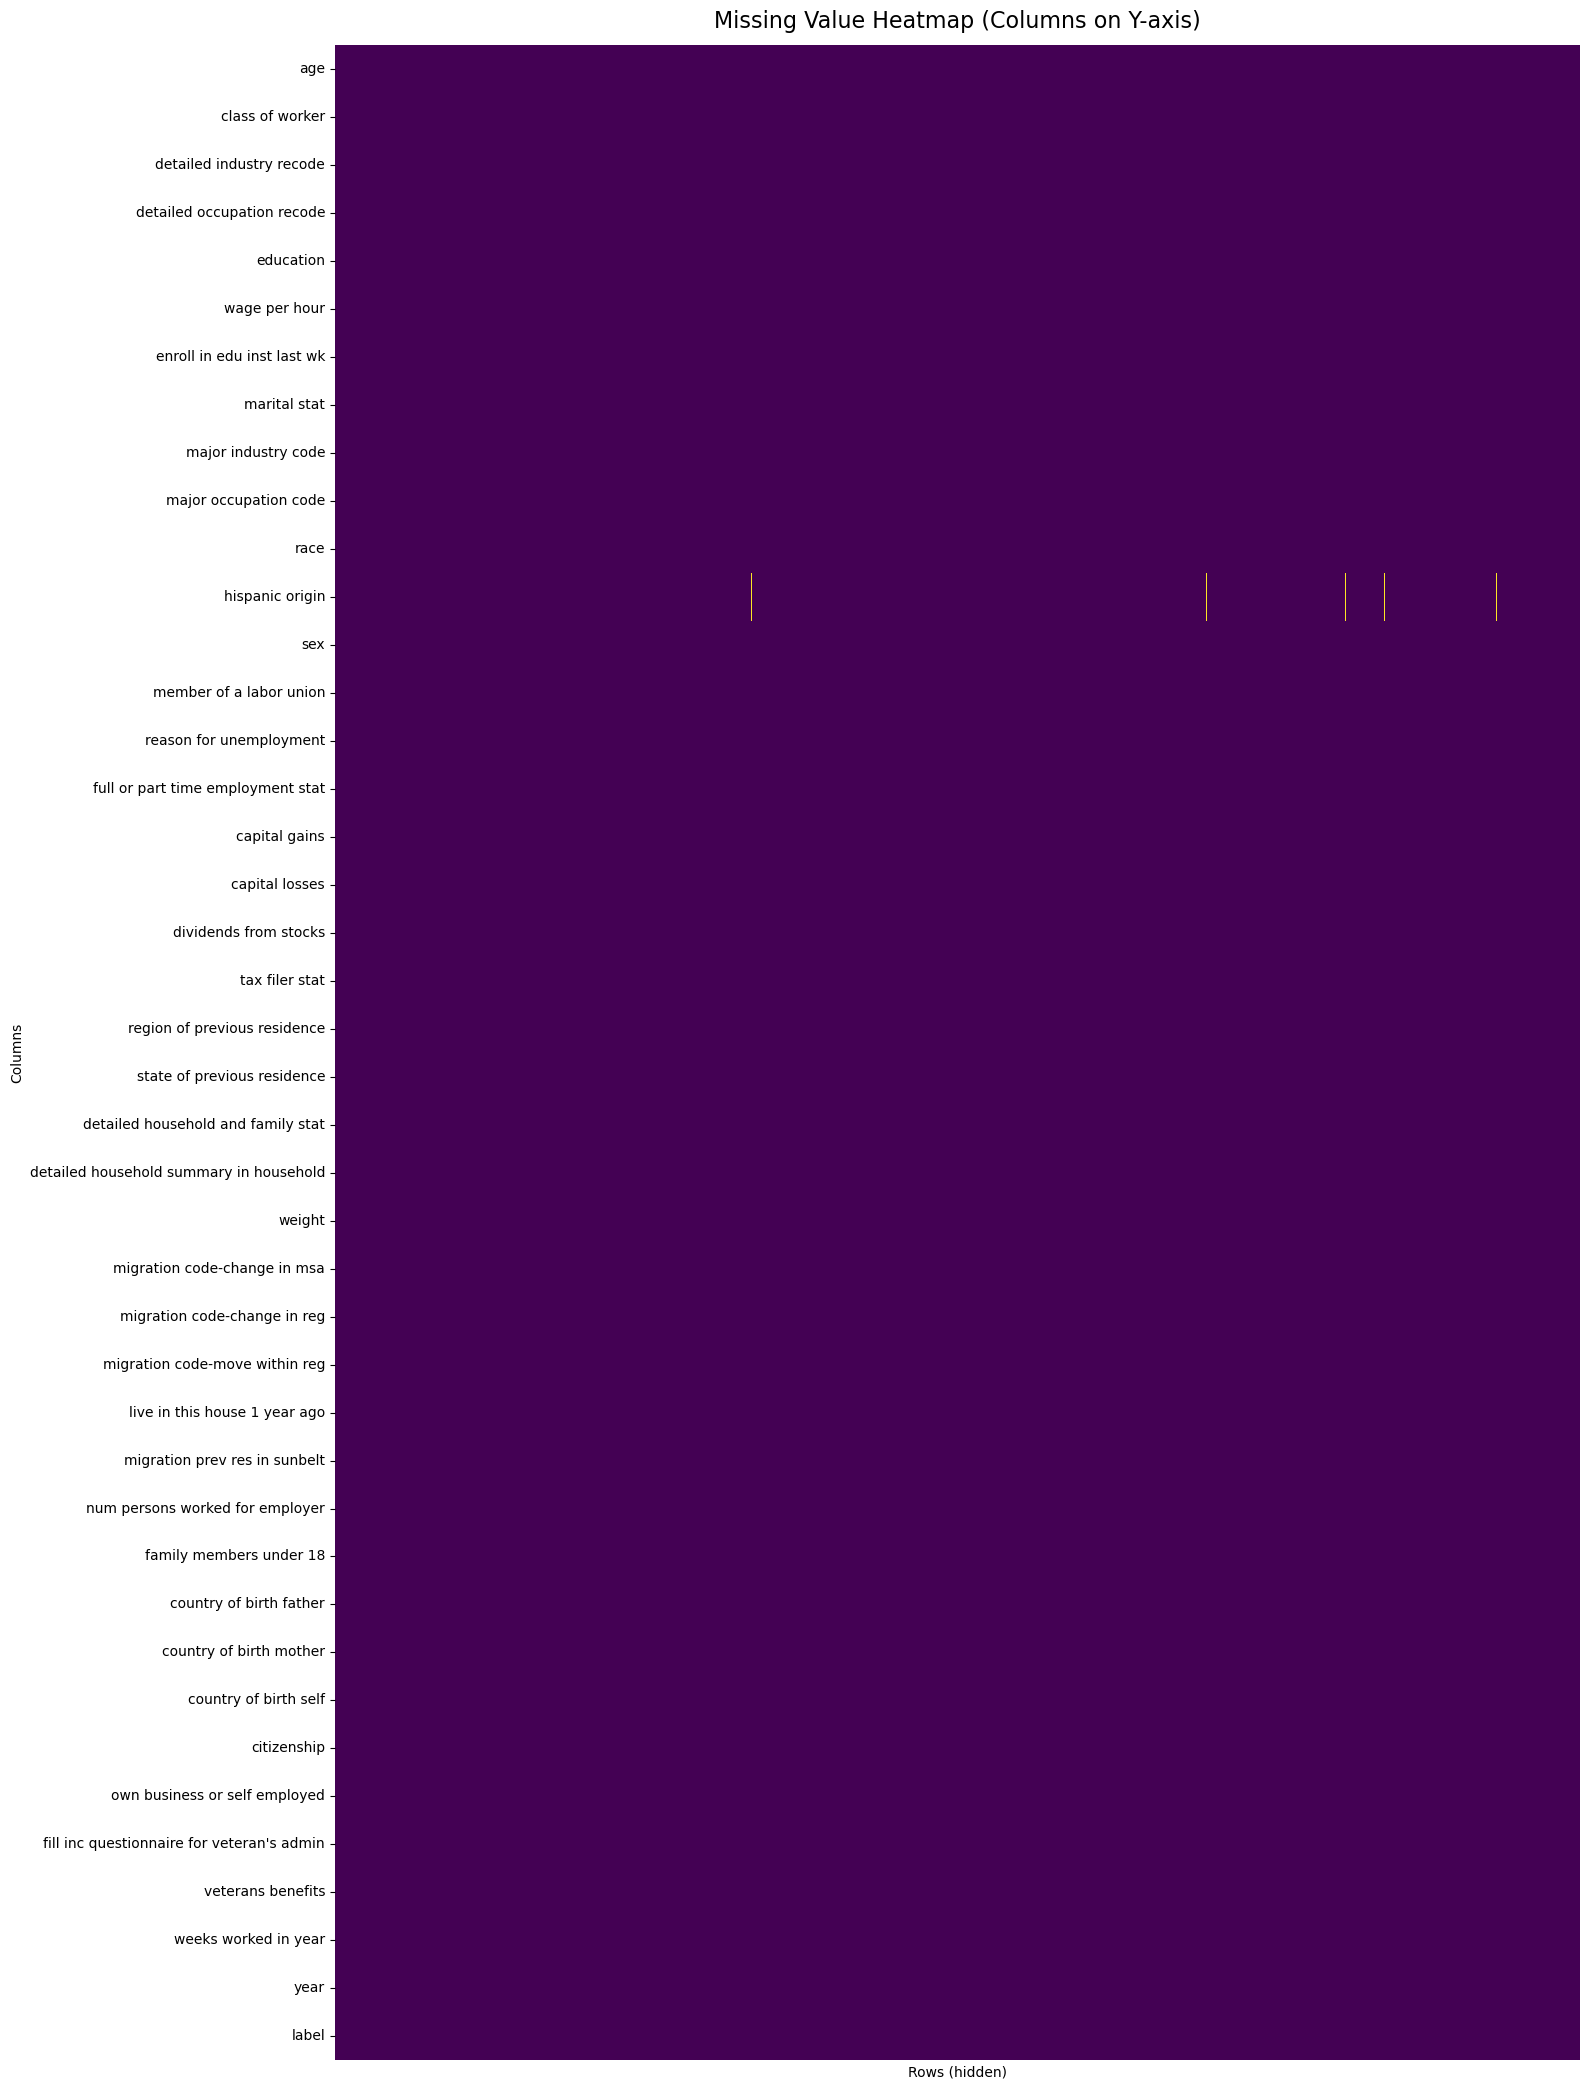

In [10]:
plt.figure(figsize=(16, 0.5 * len(df.columns)))
sns.heatmap(
    df.isna().T,
    cbar=False,
    xticklabels=False,
    cmap="viridis"
)
plt.title("Missing Value Heatmap (Columns on Y-axis)", fontsize=16, pad=12)
plt.ylabel("Columns")
plt.xlabel("Rows (hidden)")
plt.tight_layout()
plt.show()


## Missing Values Summary

- Only **`hispanic origin`** has true missing values (`NaN`), there doesnt seem to be any pattern to it.
- Some other columns use `"?"` to represent unknowns.  
- For now, `"?"` is left as-is and treated as a valid category.

In [39]:
print("\nUnique values in label:")
print(df[TARGET_COL].unique())

print("\nRaw value counts:")
print(df[TARGET_COL].value_counts(dropna=False))

print("\nWeighted value counts (population-level):")
print(df.groupby(TARGET_COL)[WEIGHT_COL].sum())



Unique values in label:
['- 50000.' '50000+.']

Raw value counts:
label
- 50000.    187141
50000+.      12382
Name: count, dtype: int64

Weighted value counts (population-level):
label
- 50000.    3.250046e+08
50000+.     2.224125e+07
Name: weight, dtype: float64


---
# Feature-wise Exploration


## Age


Missing values: 0
Min age: 0 Max age: 90
Mean age (raw): 34.49 Median age (raw): 33.0
Mean age (weighted): 34.47 Median age (weighted): 33.0


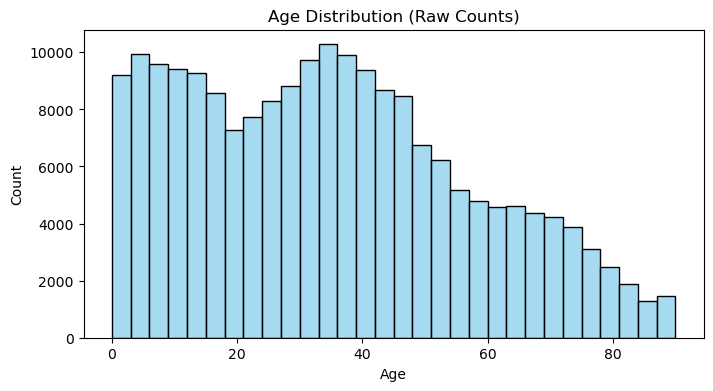

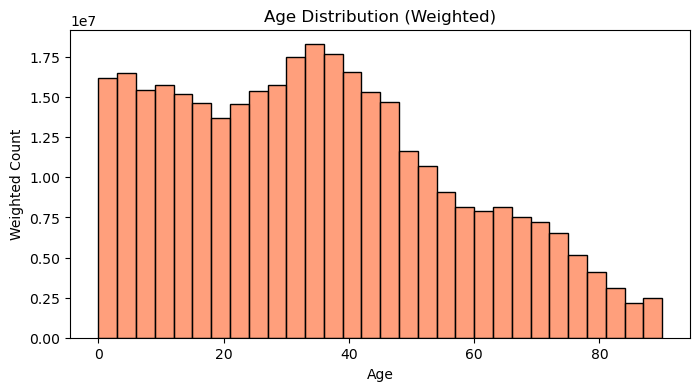

In [41]:
# Convert to numeric
df["age"] = pd.to_numeric(df["age"], errors="coerce")

print("Missing values:", df["age"].isna().sum())
print("Min age:", df["age"].min(), "Max age:", df["age"].max())
print("Mean age (raw):", df["age"].mean().round(2), 
      "Median age (raw):", df["age"].median())

# Weighted mean/median
w_mean = np.average(df["age"], weights=df[WEIGHT_COL])
w_median = df.loc[df["age"].notna()].sample(
    weights=df.loc[df["age"].notna(), WEIGHT_COL],
    n=len(df.loc[df["age"].notna()]), 
    random_state=RANDOM_STATE
)["age"].median()
print("Mean age (weighted):", round(w_mean,2), "Median age (weighted):", w_median)

# Plot raw distribution
plt.figure(figsize=(8,4))
sns.histplot(df["age"], bins=30, kde=False, color="skyblue")
plt.title("Age Distribution (Raw Counts)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Plot weighted distribution
plt.figure(figsize=(8,4))
sns.histplot(df, x="age", weights=df[WEIGHT_COL], bins=30, color="coral")
plt.title("Age Distribution (Weighted)")
plt.xlabel("Age")
plt.ylabel("Weighted Count")
plt.show()


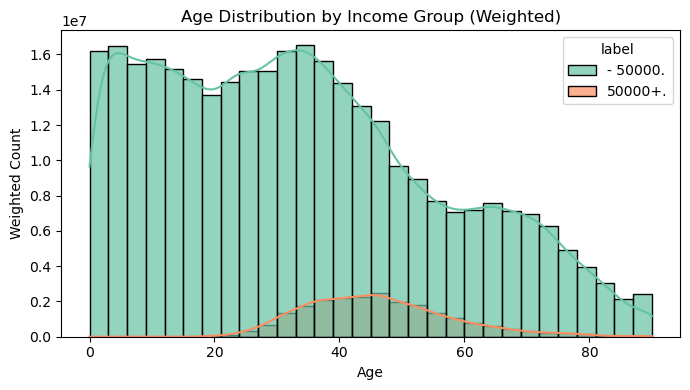

In [50]:
# Age by Income Group (Weighted)
col = "age"
plt.figure(figsize=(7,4))
sns.histplot(
    data=df,
    x=col,
    hue=TARGET_COL,
    weights=df[WEIGHT_COL],
    bins=30,
    kde=True,
    palette="Set2",
    alpha=0.7
)
plt.title("Age Distribution by Income Group (Weighted)")
plt.xlabel("Age")
plt.ylabel("Weighted Count")
plt.tight_layout()
plt.show()


**Obervation:** Younger people (≤25) are mostly ≤$50k as expected, higher income peaks at ages 30–50, then declines after ~60.

---

### Class of Worker


In [62]:
col = "class of worker"

print("Missing values:", df[col].isna().sum())
print("\nUnique values:")
print(df[col].unique())

print("\nRaw value counts:")
print(df[col].value_counts())

print("\nWeighted value counts (population-level):")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False))


Missing values: 0

Unique values:
['Not in universe' 'Self-employed-not incorporated' 'Private'
 'Local government' 'Federal government' 'Self-employed-incorporated'
 'State government' 'Never worked' 'Without pay']

Raw value counts:
class of worker
Not in universe                   100245
Private                            72028
Self-employed-not incorporated      8445
Local government                    7784
State government                    4227
Self-employed-incorporated          3265
Federal government                  2925
Never worked                         439
Without pay                          165
Name: count, dtype: int64

Weighted value counts (population-level):
class of worker
Not in universe                   1.708704e+08
Private                           1.291665e+08
Self-employed-not incorporated    1.451549e+07
Local government                  1.374835e+07
State government                  7.165721e+06
Self-employed-incorporated        5.652140e+06
Federal gover

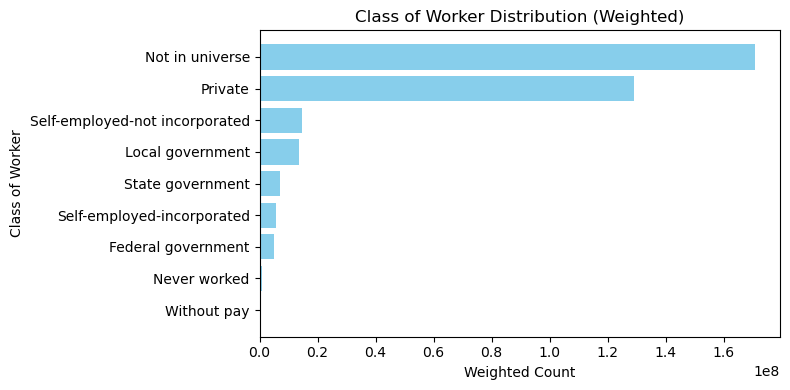

In [86]:
# Class of Worker Distribution (Weighted)

totals = df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
plt.barh(totals.index, totals.values, color="skyblue")
plt.title("Class of Worker Distribution (Weighted)")
plt.xlabel("Weighted Count")
plt.ylabel("Class of Worker")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


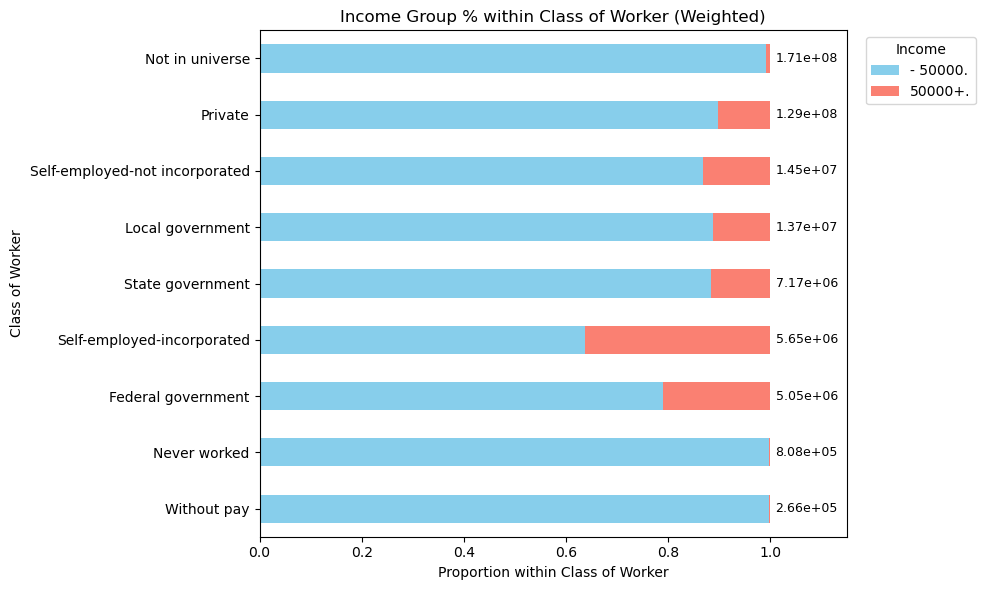

In [90]:
# Income Group % within Class of Worker (Weighted)

counts = df.groupby([col, TARGET_COL])[WEIGHT_COL].sum().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)
props = props.reindex(columns=["- 50000.", "50000+."], fill_value=0)
order = counts.sum(axis=1).sort_values(ascending=False).index[::-1]

colors = ["skyblue", "salmon"]

plt.figure(figsize=(10, 6))
ax = props.loc[order].plot(
    kind="barh", stacked=True, color=colors, figsize=(10,6), ax=plt.gca()
)

totals = counts.sum(axis=1).reindex(order)
for i, worker in enumerate(order):
    ax.text(1.01, i, f"{totals.loc[worker]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.15)
ax.set_xlabel("Proportion within Class of Worker")
ax.set_ylabel("Class of Worker")
ax.set_title("Income Group % within Class of Worker (Weighted)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


**Observation:** 
- Most workers are in the *Private* and *Not in universe* categories.
- Higher-income (>50k) shares are relatively larger among *Self-employed (incorporated)* and *Federal government* workers, while groups like *Never worked* and *Without pay* are almost entirely ≤50k.

---


### Detailed Industry Recode


In [96]:
col = "detailed industry recode"

print("Missing values:", df[col].isna().sum())
print("Unique values:", df[col].nunique())

print("\nTop 15 value counts (raw):")
print(df[col].value_counts().head(15))

print("\nTop 15 weighted counts:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False).head(15))




Missing values: 0
Unique values: 52

Top 15 value counts (raw):
detailed industry recode
0     100684
33     17070
43      8283
4       5984
42      4683
45      4482
29      4209
37      4022
41      3964
32      3596
35      3380
39      2937
34      2765
44      2549
2       2196
Name: count, dtype: int64

Top 15 weighted counts:
detailed industry recode
0     1.716781e+08
33    3.056142e+07
43    1.436299e+07
4     1.069942e+07
42    8.266903e+06
45    8.053509e+06
37    7.756533e+06
29    7.486664e+06
41    6.833430e+06
32    6.456143e+06
35    6.105827e+06
34    4.992545e+06
39    4.959266e+06
44    4.266264e+06
2     3.357887e+06
Name: weight, dtype: float64


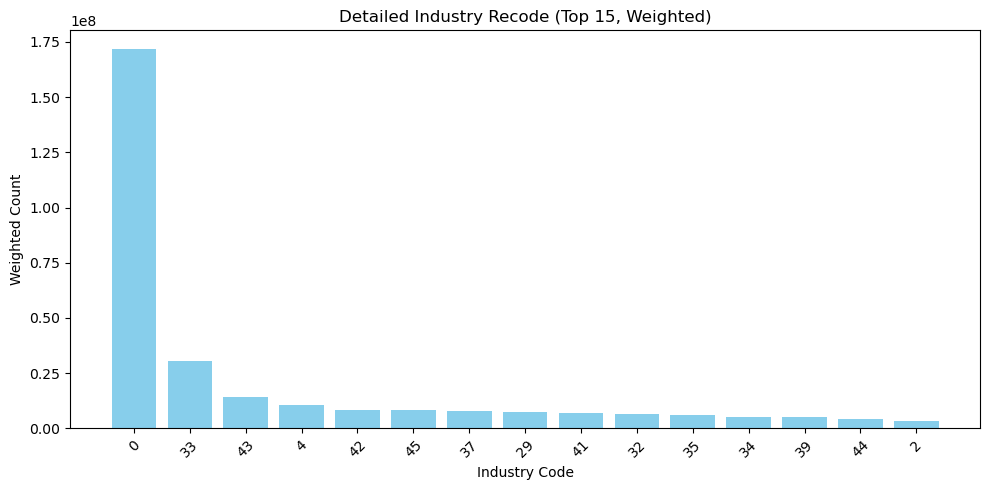

In [98]:
# Top 15 industries (weighted totals)
top15 = df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(10,5))
plt.bar(top15.index.astype(str), top15.values, color="skyblue")
plt.title("Detailed Industry Recode (Top 15, Weighted)")
plt.xlabel("Industry Code")
plt.ylabel("Weighted Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [100]:

recode = pd.to_numeric(df[col], errors="coerce")
subset = df[recode == 0]

print("Rows with", col, "== 0:", len(subset))
print("\nClass of worker counts for code 0 (weighted):")
print(subset.groupby("class of worker")[WEIGHT_COL].sum())


Rows with detailed industry recode == 0: 100684

Class of worker counts for code 0 (weighted):
class of worker
Never worked       8.076583e+05
Not in universe    1.708704e+08
Name: weight, dtype: float64


We are removing 0 to have a better visual understanding

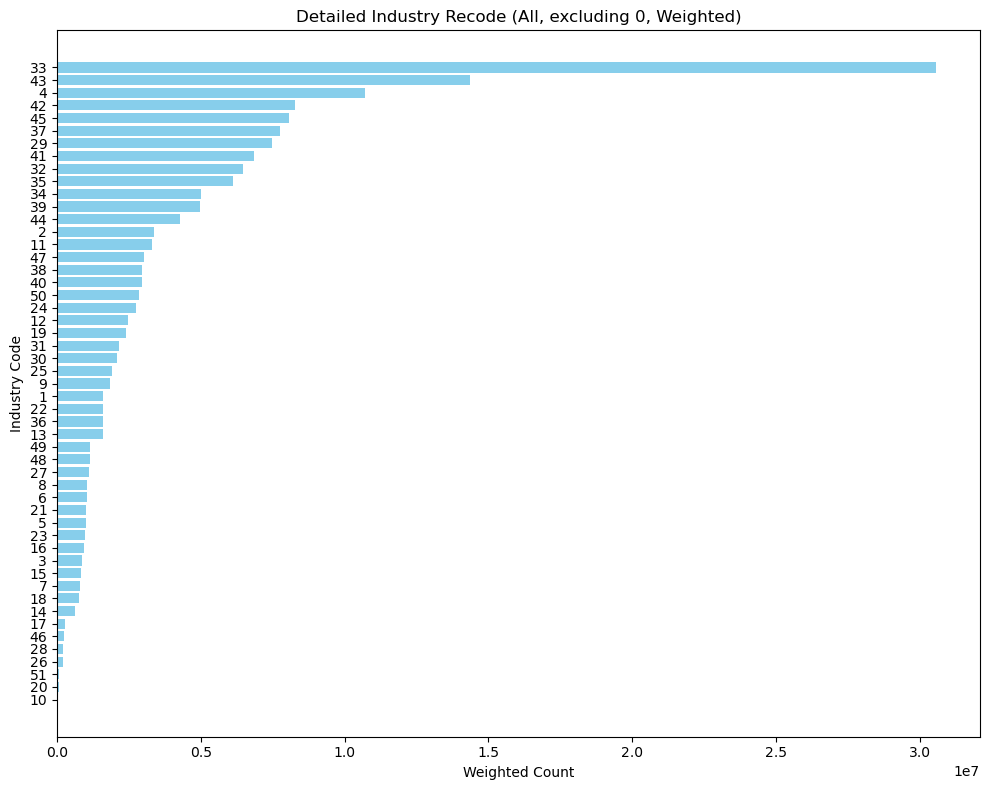

In [110]:
# Detailed Industry Recode (all codes, excluding 0)

col = "detailed industry recode"
df_nonzero = df[df[col] != 0]

totals = df_nonzero.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.barh(totals.index.astype(str), totals.values, color="skyblue")
plt.title("Detailed Industry Recode (All, excluding 0, Weighted)")
plt.xlabel("Weighted Count")
plt.ylabel("Industry Code")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


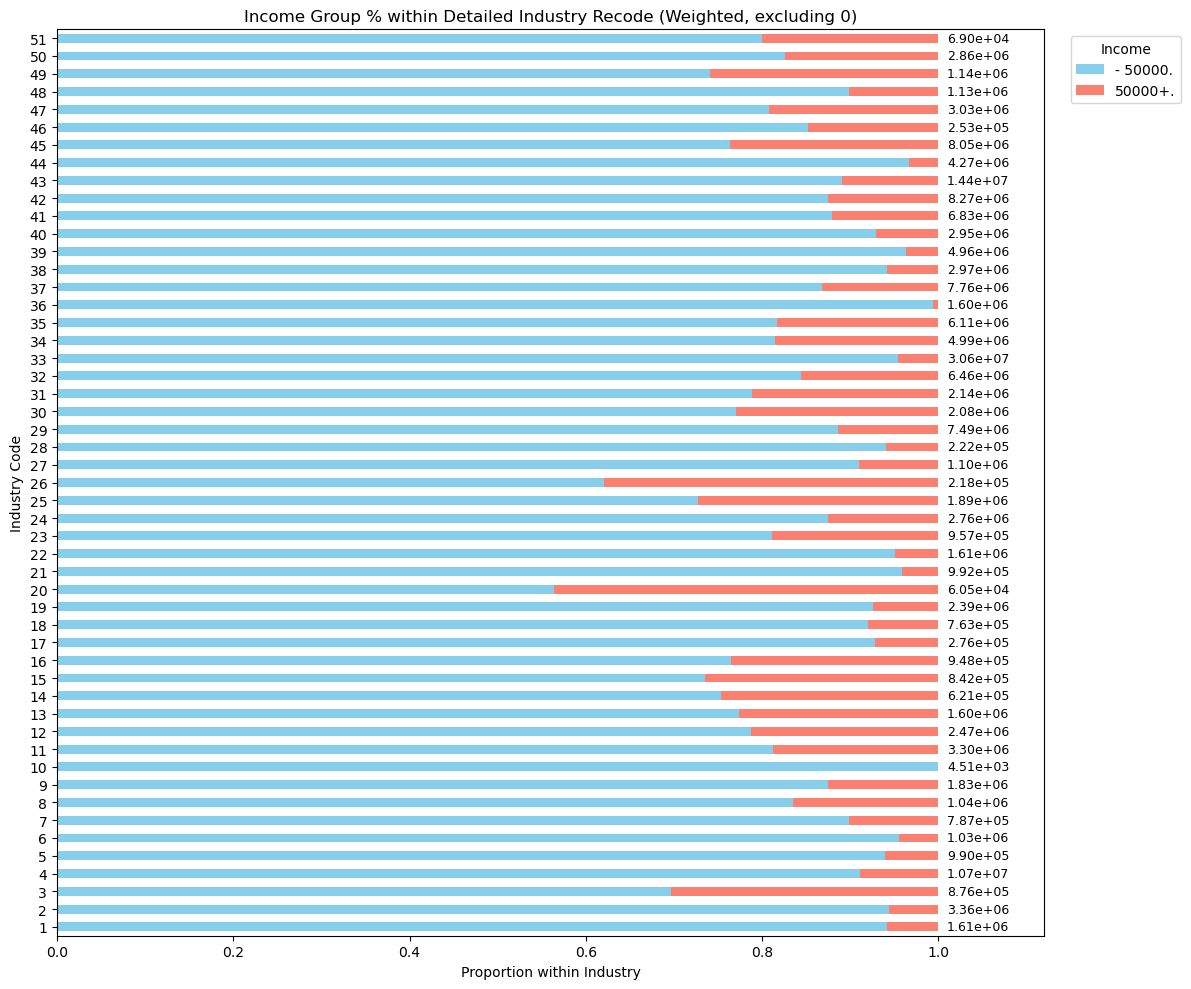

In [112]:
# Income Group % within Detailed Industry Recode (Weighted, excluding 0)

col = "detailed industry recode"
df_nonzero = df[df[col] != 0]

counts = df_nonzero.groupby([col, TARGET_COL])[WEIGHT_COL].sum().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)
props = props.reindex(columns=["- 50000.", "50000+."], fill_value=0)

order = sorted(props.index)
colors = ["skyblue", "salmon"]

plt.figure(figsize=(12, 10))
ax = props.loc[order].plot(kind="barh", stacked=True, color=colors, figsize=(12,10), ax=plt.gca())

totals = counts.sum(axis=1).reindex(order).astype(int)
for i, industry in enumerate(order):
    ax.text(1.01, i, f"{totals.loc[industry]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.12)
ax.set_xlabel("Proportion within Industry")
ax.set_ylabel("Industry Code")
ax.set_title("Income Group % within Detailed Industry Recode (Weighted, excluding 0)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


**Observation:** 
- Industry distribution is highly skewed a few codes (e.g., 33, 43, 42, 45) dominate the workforce. 
- Within industries, most remain majority ≤50k, but some sectors show higher proportions of >50k earners, highlighting pockets of higher-income concentration.
---


### Detailed Occupation Recode


In [121]:
col = "detailed occupation recode"

print("Missing values:", df[col].isna().sum())
print("Unique values:", df[col].nunique())
print("Top 15 weighted counts:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False).head(15))


Missing values: 0
Unique values: 47
Top 15 weighted counts:
detailed occupation recode
0     1.716781e+08
2     1.552914e+07
26    1.423649e+07
19    9.657683e+06
29    9.024991e+06
36    7.306074e+06
34    7.226938e+06
10    6.416374e+06
16    6.098924e+06
33    5.969314e+06
12    5.901692e+06
23    5.802841e+06
3     5.787300e+06
35    5.647002e+06
38    5.455106e+06
Name: weight, dtype: float64


In [125]:
# Check code 0
subset = df[df[col] == 0]
print("\nRows with", col, "== 0:", len(subset))
print("Class of worker counts for code 0:")
print(subset["class of worker"].value_counts())



Rows with detailed occupation recode == 0: 100684
Class of worker counts for code 0:
class of worker
Not in universe    100245
Never worked          439
Name: count, dtype: int64


We can see that again all 0 entries have never worked/ Not in Universe, we can ignore them

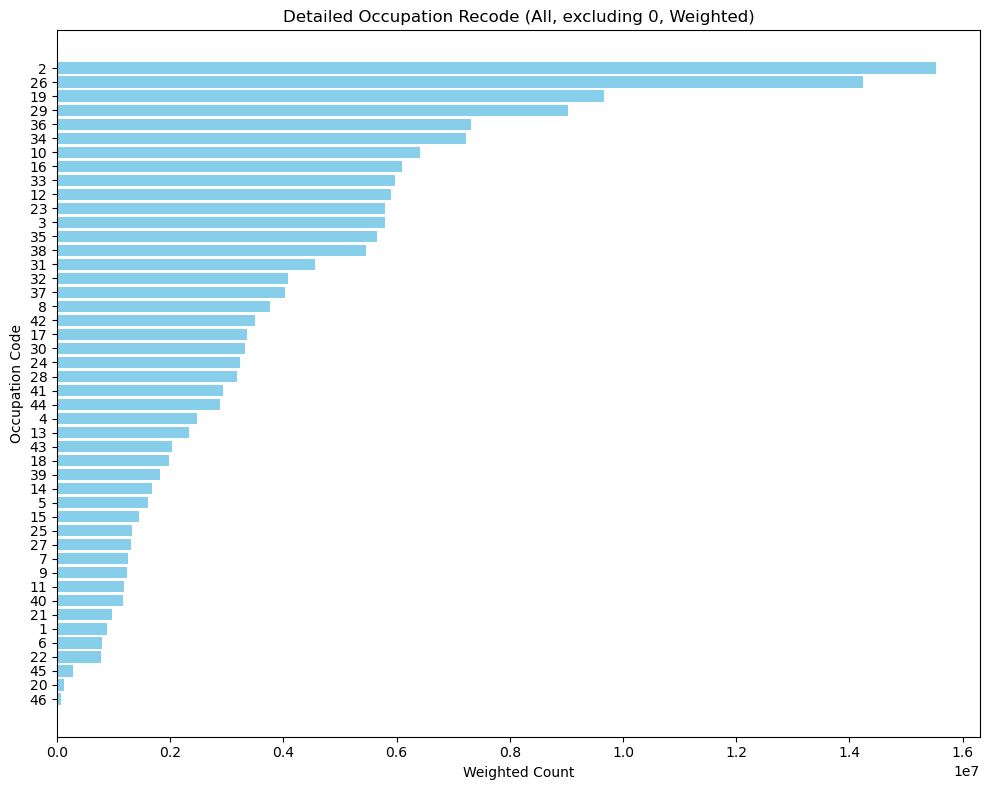

In [127]:
# All codes excluding 0, weighted totals
df_occ_nonzero = df[df[col] != 0]
totals = df_occ_nonzero.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.barh(totals.index.astype(str), totals.values, color="skyblue")
plt.title("Detailed Occupation Recode (All, excluding 0, Weighted)")
plt.xlabel("Weighted Count")
plt.ylabel("Occupation Code")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


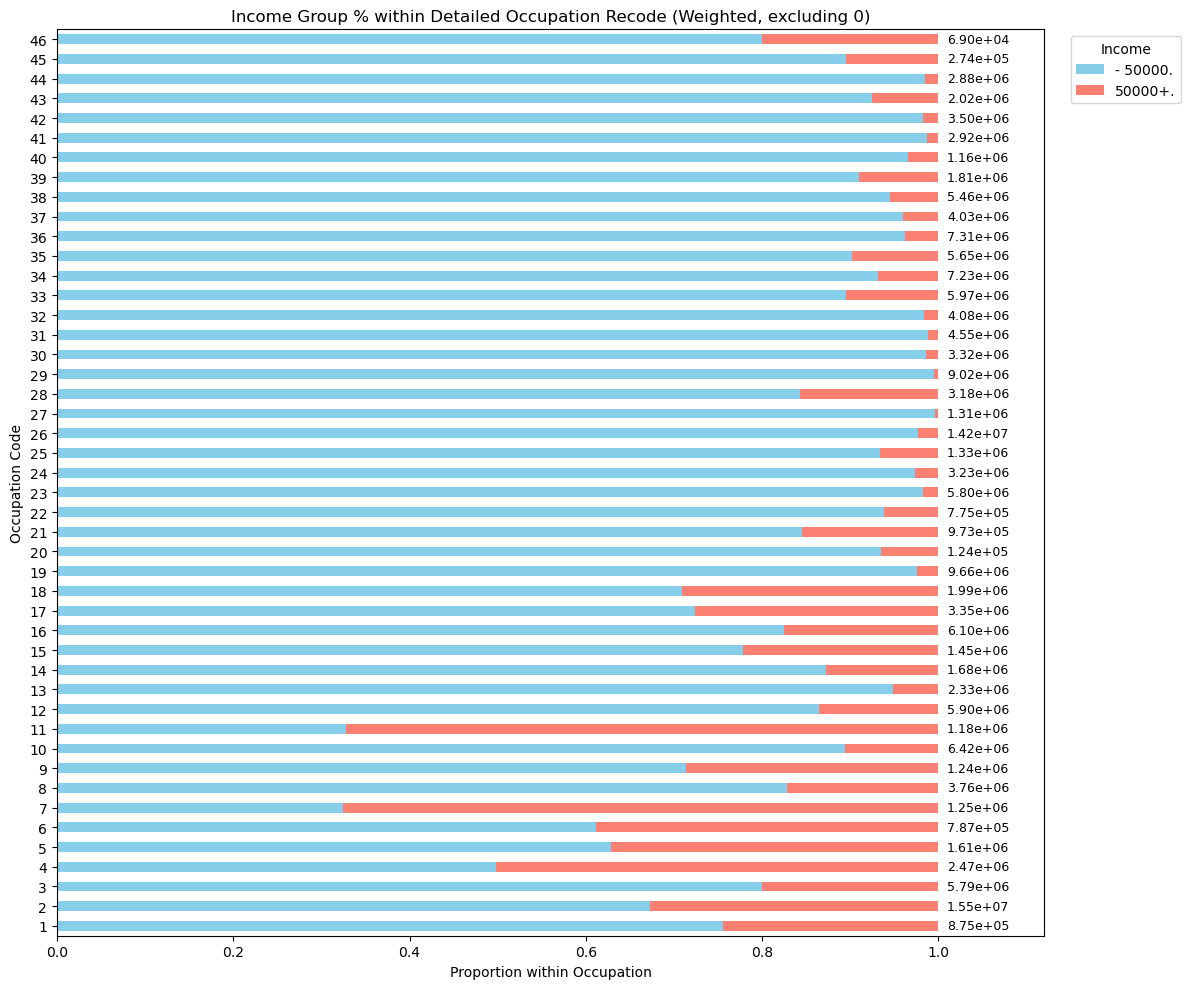

In [130]:
# Income group proportions (weighted)
counts = df_occ_nonzero.groupby([col, TARGET_COL])[WEIGHT_COL].sum().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)
props = props.reindex(columns=["- 50000.", "50000+."], fill_value=0)

order = sorted(props.index)
colors = ["skyblue", "salmon"]

plt.figure(figsize=(12,10))
ax = props.loc[order].plot(kind="barh", stacked=True, color=colors, figsize=(12,10), ax=plt.gca())

totals = counts.sum(axis=1).reindex(order).astype(int)
for i, occ in enumerate(order):
    ax.text(1.01, i, f"{totals.loc[occ]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.12)
ax.set_xlabel("Proportion within Occupation")
ax.set_ylabel("Occupation Code")
ax.set_title("Income Group % within Detailed Occupation Recode (Weighted, excluding 0)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


**Observation:** A few occupations (e.g., codes 2, 26, 19, 29) dominate the workforce distribution. While most occupations are skewed toward ≤50k incomes, certain codes (notably in the lower ranges such as 11, 7) show much higher shares of >50k earners, highlighting that occupation type is a strong predictor of income differences. Another thing to consider is the number of entries int hat category, if there are only few, it might be just through chance.

---

### Education


In [137]:
col = "education"

print("Missing values:", df[col].isna().sum())
print("Unique values:", df[col].nunique())
print("\nTop weighted counts:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False).head(10))


Missing values: 0
Unique values: 17

Top weighted counts:
education
High school graduate                      85589219.42
Children                                  79104048.39
Some college but no degree                50296154.39
Bachelors degree(BA AB BS)                35738476.21
10th grade                                13272987.31
7th and 8th grade                         13126143.41
11th grade                                12290046.29
Masters degree(MA MS MEng MEd MSW MBA)    11475673.95
9th grade                                 10520947.09
Associates degree-occup /vocational        9186755.06
Name: weight, dtype: float64


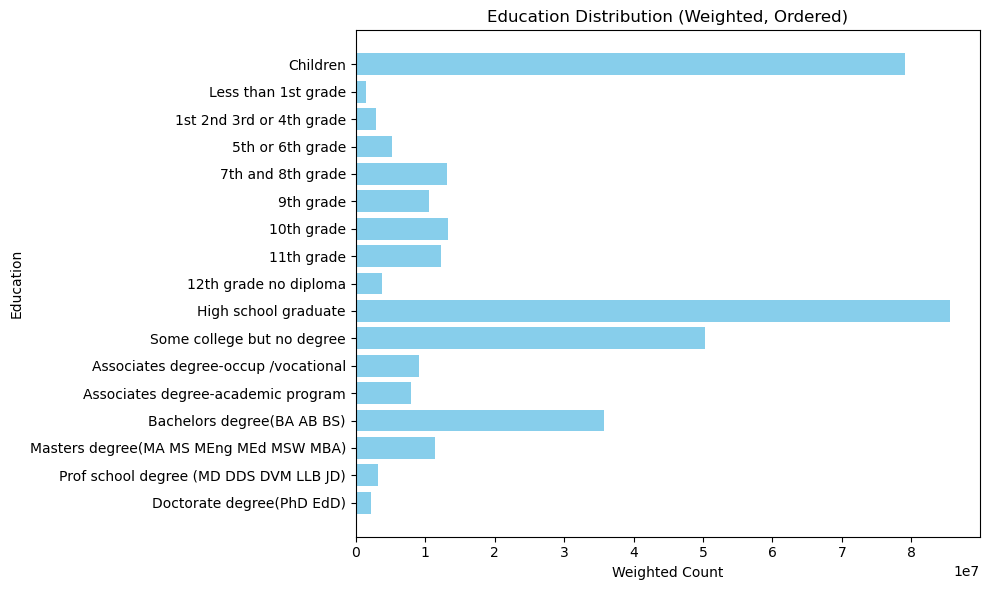

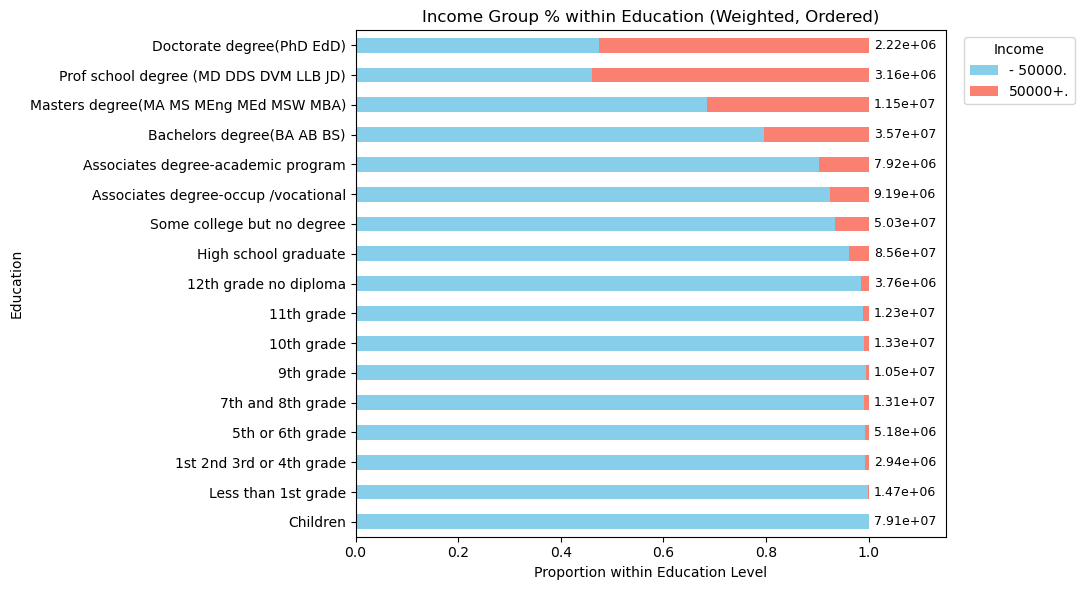

In [143]:
edu_order = [
    "Children",
    "Less than 1st grade",
    "1st 2nd 3rd or 4th grade",
    "5th or 6th grade",
    "7th and 8th grade",
    "9th grade",
    "10th grade",
    "11th grade",
    "12th grade no diploma",
    "High school graduate",
    "Some college but no degree",
    "Associates degree-occup /vocational",
    "Associates degree-academic program",
    "Bachelors degree(BA AB BS)",
    "Masters degree(MA MS MEng MEd MSW MBA)",
    "Prof school degree (MD DDS DVM LLB JD)",
    "Doctorate degree(PhD EdD)",
]

# Weighted distribution
totals = df.groupby("education")[WEIGHT_COL].sum().reindex(edu_order)

plt.figure(figsize=(10,6))
plt.barh(totals.index, totals.values, color="skyblue")
plt.title("Education Distribution (Weighted, Ordered)")
plt.xlabel("Weighted Count")
plt.ylabel("Education")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Weighted proportions by income group
counts = df.groupby(["education", TARGET_COL])[WEIGHT_COL].sum().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0).reindex(edu_order)

colors = ["skyblue", "salmon"]

plt.figure(figsize=(11,6))
ax = props.plot(kind="barh", stacked=True, color=colors, ax=plt.gca())

totals = counts.sum(axis=1).reindex(edu_order)
for i, edu in enumerate(edu_order):
    if pd.notna(totals.loc[edu]):
        ax.text(1.01, i, f"{totals.loc[edu]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.15)
ax.set_xlabel("Proportion within Education Level")
ax.set_ylabel("Education")
ax.set_title("Income Group % within Education (Weighted, Ordered)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


**Observations:**
- Most individuals are *High school graduates*, *Some college*, or *Children*.  
- Higher education strongly correlates with higher income *Bachelor’s+* degrees show a much larger share earning **50k+**.  
- Lower education levels remain concentrated in the **under 50k** group.  

**Key takeaway:** Advanced degrees are rare but heavily skew toward higher income.  

---

### Marital Status

Missing values: 0
Unique values: 7

Top weighted counts:
marital stat
Never married                      1.519181e+08
Married-civilian spouse present    1.444042e+08
Divorced                           2.317747e+07
Widowed                            1.754912e+07
Separated                          6.448192e+06
Married-spouse absent              2.648742e+06
Married-A F spouse present         1.100045e+06
Name: weight, dtype: float64


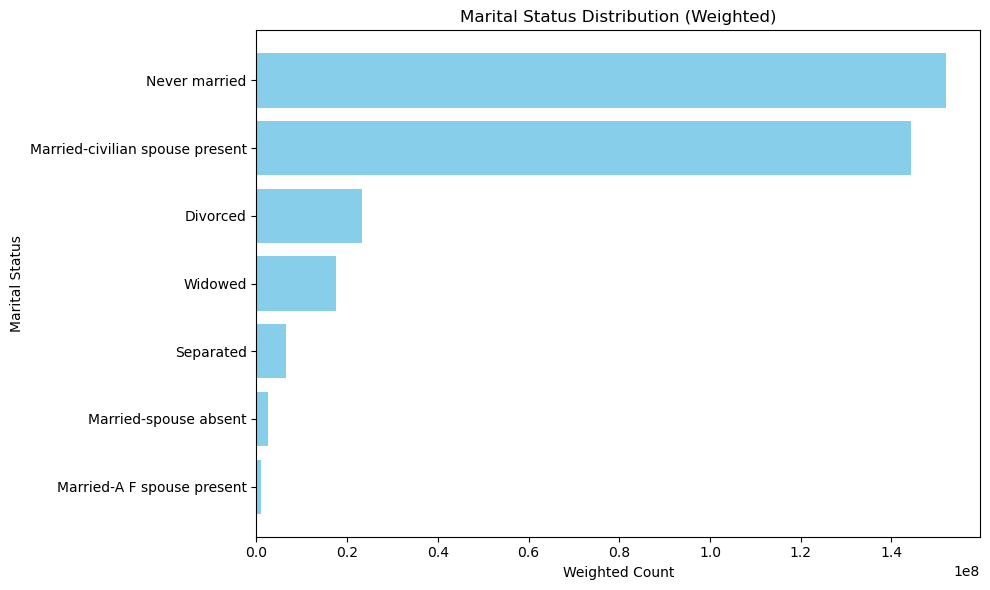

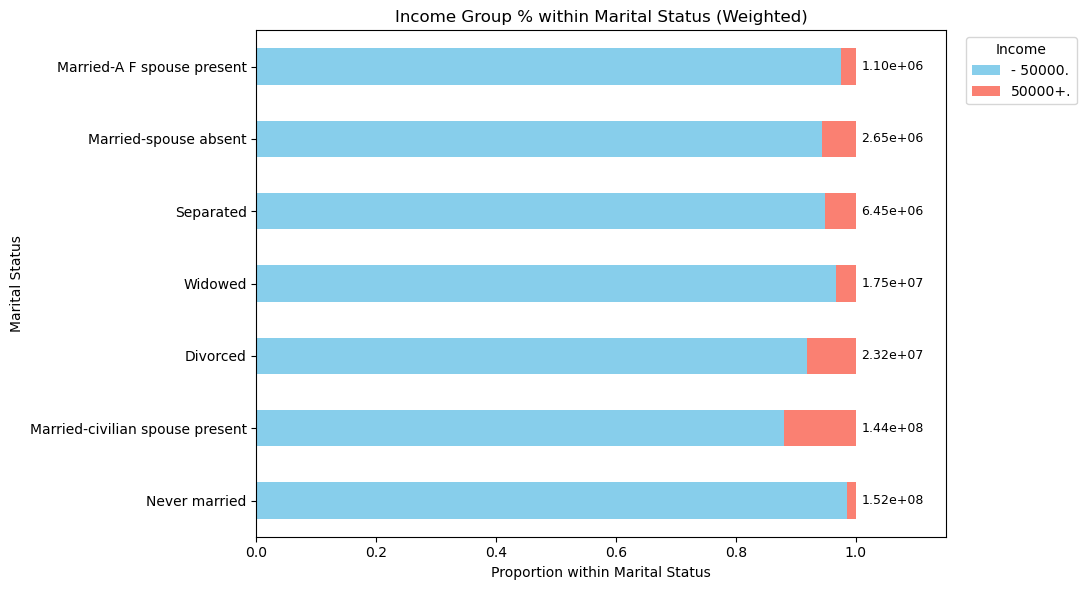

In [154]:

col = "marital stat"

print("Missing values:", df[col].isna().sum())
print("Unique values:", df[col].nunique())
print("\nTop weighted counts:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False).head(10))

# Weighted distribution
totals = df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.barh(totals.index, totals.values, color="skyblue")
plt.title("Marital Status Distribution (Weighted)")
plt.xlabel("Weighted Count")
plt.ylabel("Marital Status")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Weighted proportions by income group
counts = df.groupby([col, TARGET_COL])[WEIGHT_COL].sum().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)
props = props.reindex(columns=["- 50000.", "50000+."], fill_value=0)

order = counts.sum(axis=1).sort_values(ascending=False).index
colors = ["skyblue", "salmon"]

plt.figure(figsize=(11,6))
ax = props.loc[order].plot(kind="barh", stacked=True, color=colors, ax=plt.gca())

totals = counts.sum(axis=1).reindex(order)
for i, ms in enumerate(order):
    if pd.notna(totals.loc[ms]):
        ax.text(1.01, i, f"{totals.loc[ms]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.15)
ax.set_xlabel("Proportion within Marital Status")
ax.set_ylabel("Marital Status")
ax.set_title("Income Group % within Marital Status (Weighted)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


**Observations:**
- *Never married* and *Married–civilian spouse present* dominate the distribution.  
- Most groups are concentrated in the <50k income bracket.  
- *Married–civilian spouse present* shows the highest share of 50k+ incomes.  
- *Divorced*, *Widowed*, and *Never married* lean heavily toward lower income.

---


### Wage per Hour 

In [162]:
col = "wage per hour"

# Convert to numeric
df[col] = pd.to_numeric(df[col], errors="coerce")

print("Missing values:", df[col].isna().sum())
print("Unique values:", df[col].nunique())
print("Summary stats:")
print(df[col].describe())

Missing values: 0
Unique values: 1240
Summary stats:
count    199523.000000
mean         55.426908
std         274.896454
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        9999.000000
Name: wage per hour, dtype: float64


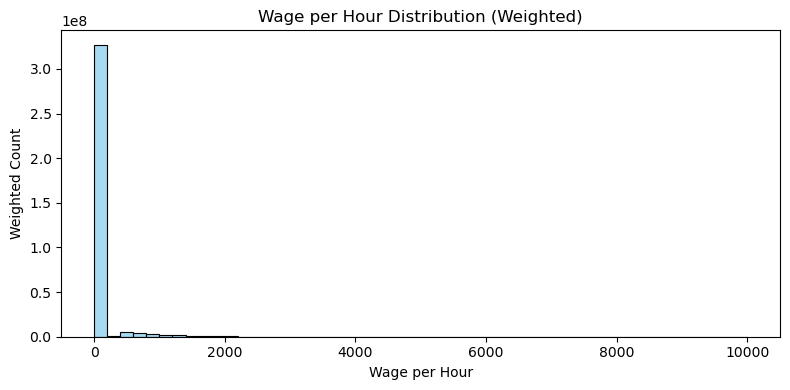

In [166]:
# Weighted distribution (all values)
plt.figure(figsize=(8,4))
sns.histplot(data=df, x=col, weights=df[WEIGHT_COL], bins=50, color="skyblue", kde=False)
plt.title("Wage per Hour Distribution (Weighted)")
plt.xlabel("Wage per Hour")
plt.ylabel("Weighted Count")

plt.tight_layout()
plt.show()

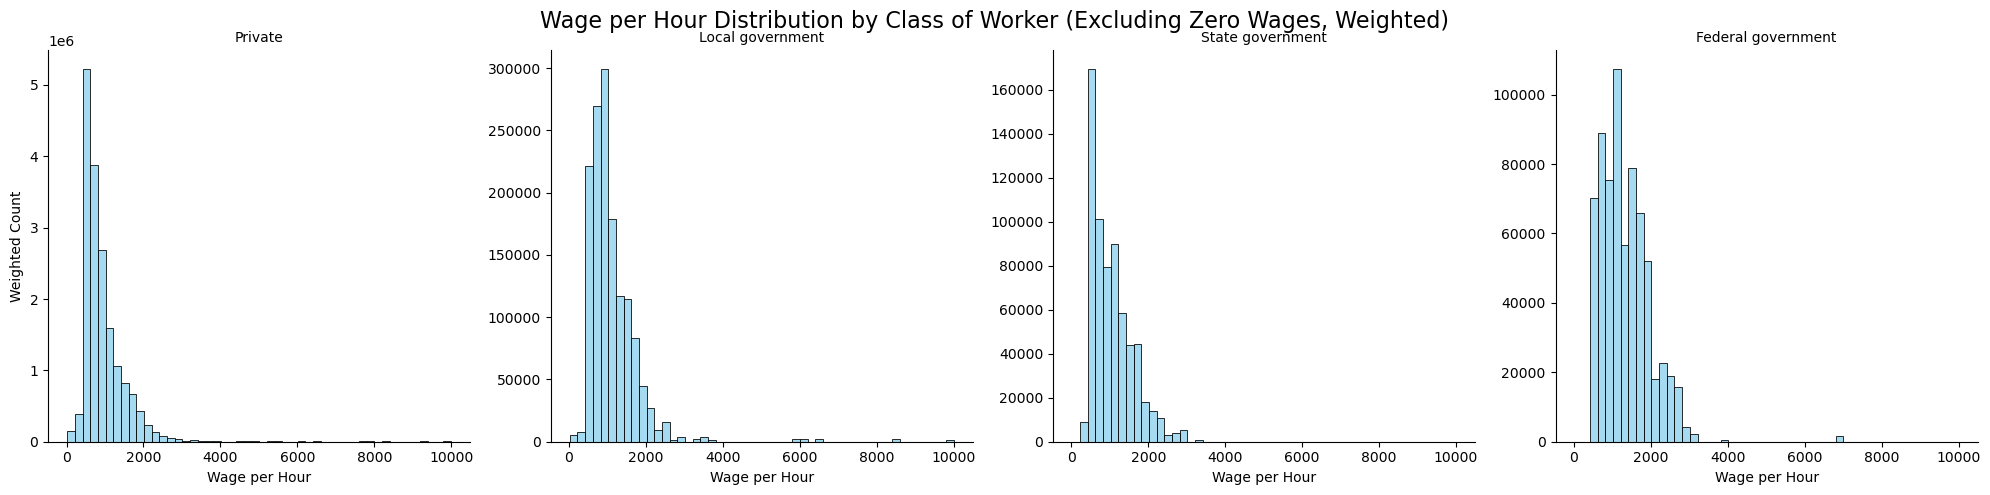

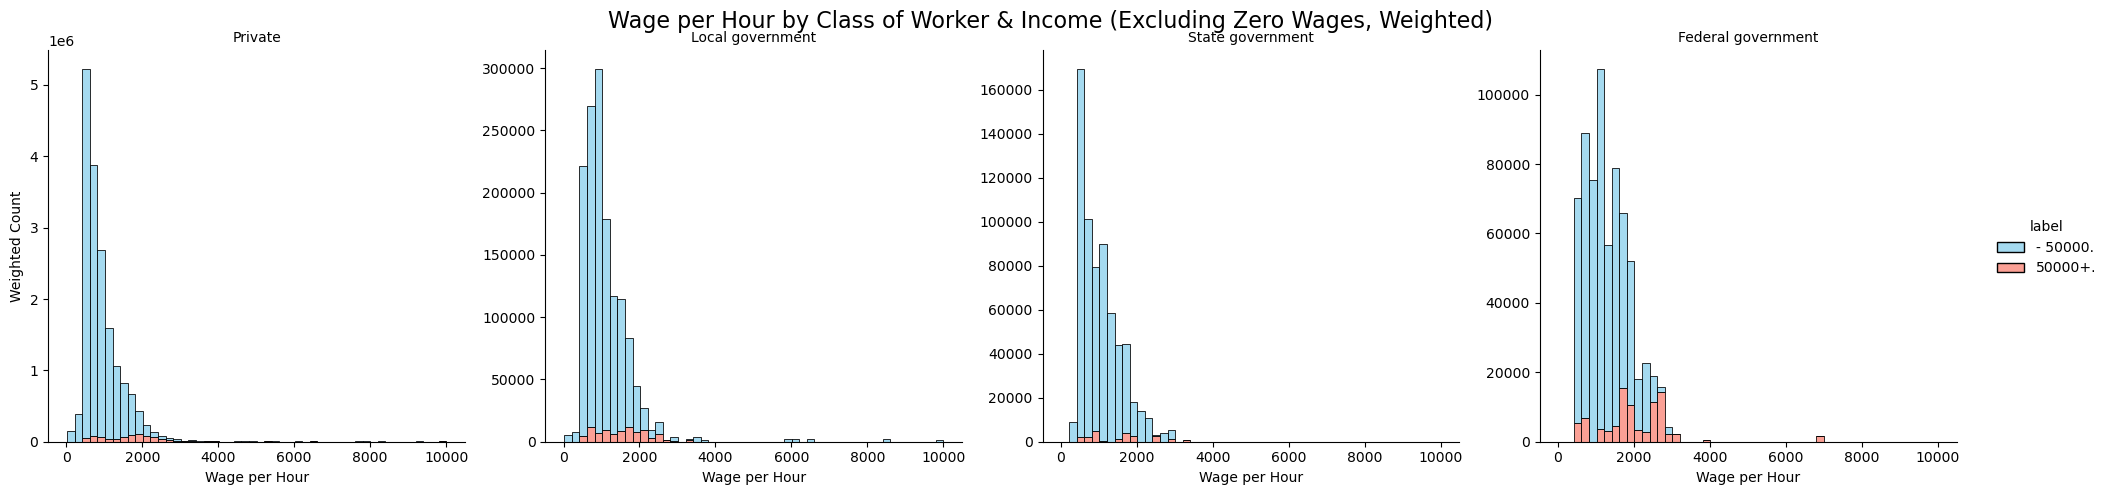

In [172]:
# Wage per Hour by Class of Worker (excluding zero wages)
df_nonzero_wage = df[df[col] > 0]

g = sns.displot(
    data=df_nonzero_wage,
    x=col,
    col="class of worker",
    col_wrap=4,
    bins=50,
    kde=False,
    weights=df_nonzero_wage[WEIGHT_COL],
    color="skyblue",
    facet_kws={'sharey': False, 'sharex': True}
)
g.set_titles("{col_name}")
g.set_axis_labels("Wage per Hour", "Weighted Count")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Wage per Hour Distribution by Class of Worker (Excluding Zero Wages, Weighted)", fontsize=16)
plt.show()

# Wage per Hour by Class of Worker & Income (excluding zero wages)
g = sns.displot(
    data=df_nonzero_wage,
    x=col,
    hue=TARGET_COL,
    col="class of worker",
    col_wrap=4,
    bins=50,
    kde=False,
    weights=df_nonzero_wage[WEIGHT_COL],
    palette={"- 50000.": "skyblue", "50000+.": "salmon"},
    multiple="stack",
    facet_kws={'sharey': False, 'sharex': True}
)
g.set_titles("{col_name}")
g.set_axis_labels("Wage per Hour", "Weighted Count")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Wage per Hour by Class of Worker & Income (Excluding Zero Wages, Weighted)", fontsize=16)
plt.show()

**Observations**
- Across all worker classes, the **wage per hour distribution is highly right-skewed**, with most workers clustered under 2000/hour and only a few extreme outliers earning much higher wages.  
- The presence of individuals earning **50k+** is more noticeable in **federal government roles**.  
- Non-relevant categories such as *Not in universe*, *Never worked*, and *Without pay* exist in the raw counts but do not factor meaningfully into wage analysis.  

---

### Enrollment in Educational Institution Last Week

Missing values: 0
Unique values: 3

Top weighted counts:
enroll in edu inst last wk
Not in universe          3.245040e+08
High school              1.207229e+07
College or university    1.066958e+07
Name: weight, dtype: float64


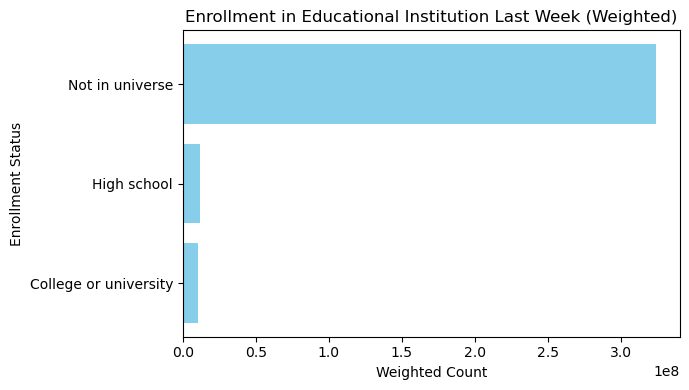

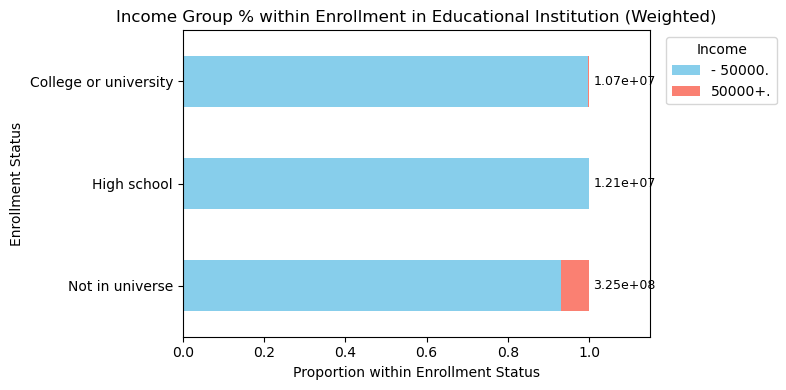

In [185]:
col = "enroll in edu inst last wk"

print("Missing values:", df[col].isna().sum())
print("Unique values:", df[col].nunique())
print("\nTop weighted counts:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False).head(10))

# Weighted distribution
totals = df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(7,4))
plt.barh(totals.index, totals.values, color="skyblue")
plt.title("Enrollment in Educational Institution Last Week (Weighted)")
plt.xlabel("Weighted Count")
plt.ylabel("Enrollment Status")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Weighted proportions by income group
counts = df.groupby([col, TARGET_COL])[WEIGHT_COL].sum().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)
props = props.reindex(columns=["- 50000.", "50000+."], fill_value=0)

order = counts.sum(axis=1).sort_values(ascending=False).index
colors = ["skyblue", "salmon"]

plt.figure(figsize=(8,4))
ax = props.loc[order].plot(kind="barh", stacked=True, color=colors, ax=plt.gca())

totals = counts.sum(axis=1).reindex(order)
for i, status in enumerate(order):
    if pd.notna(totals.loc[status]):
        ax.text(1.01, i, f"{totals.loc[status]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.15)
ax.set_xlabel("Proportion within Enrollment Status")
ax.set_ylabel("Enrollment Status")
ax.set_title("Income Group % within Enrollment in Educational Institution (Weighted)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

**Observations**
- The overwhelming majority fall under “Not in universe”, which includes those not currently in school, this group also covers working professionals.
- Among students (high school and college/university), incomes are almost entirely concentrated in the **<50k bracket**, as expected.

---


### Major Industry Code

Missing values: 0
Unique values: 24

Top weighted counts:
major industry code
Not in universe or children          1.716781e+08
Retail trade                         3.056142e+07
Manufacturing-durable goods          1.648992e+07
Education                            1.436299e+07
Manufacturing-nondurable goods       1.219977e+07
Finance insurance and real estate    1.109837e+07
Business and repair services         1.072809e+07
Construction                         1.069942e+07
Medical except hospital              8.266903e+06
Public administration                8.169593e+06
Name: weight, dtype: float64


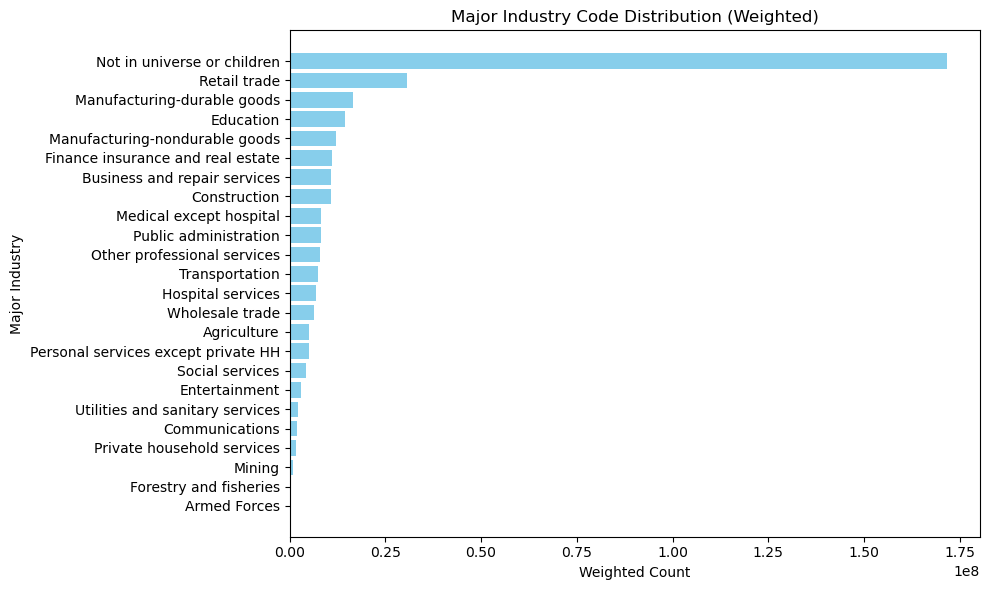

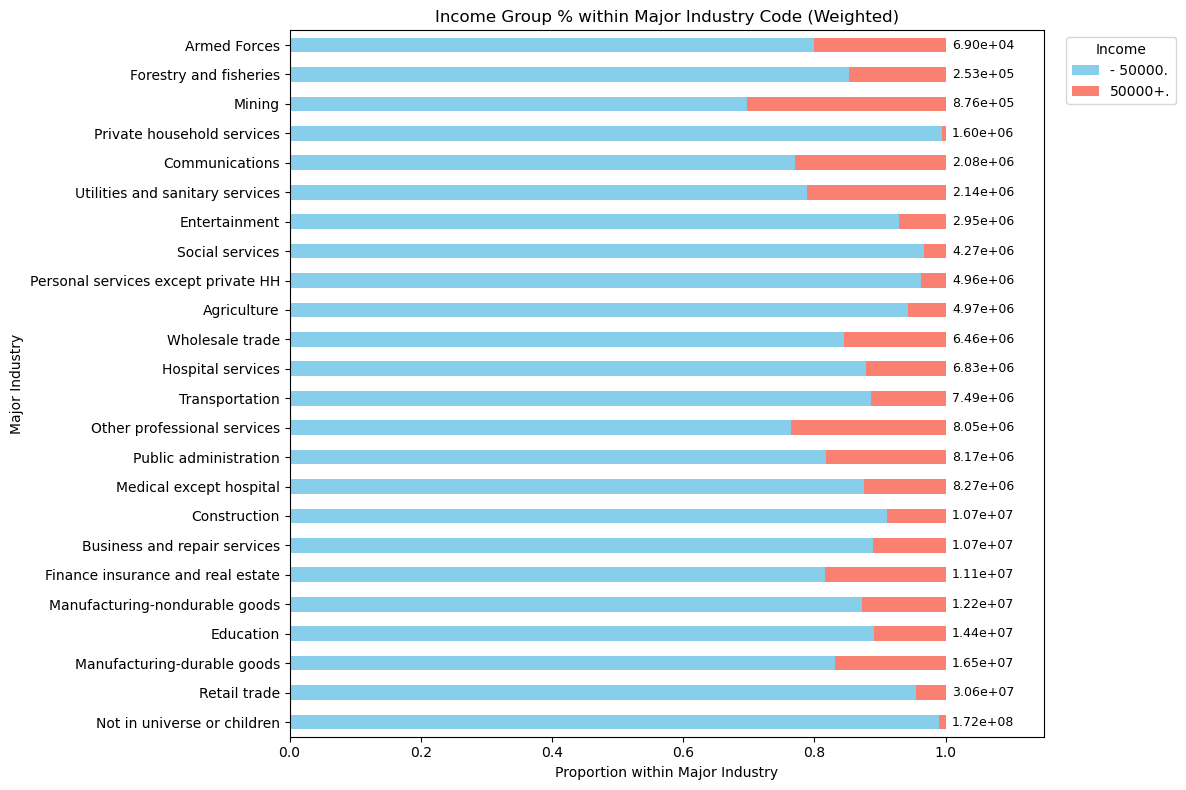

In [195]:
col = "major industry code"

print("Missing values:", df[col].isna().sum())
print("Unique values:", df[col].nunique())
print("\nTop weighted counts:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False).head(10))

# Weighted distribution
totals = df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.barh(totals.index, totals.values, color="skyblue")
plt.title("Major Industry Code Distribution (Weighted)")
plt.xlabel("Weighted Count")
plt.ylabel("Major Industry")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Weighted proportions by income group
counts = df.groupby([col, TARGET_COL])[WEIGHT_COL].sum().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)
props = props.reindex(columns=["- 50000.", "50000+."], fill_value=0)

order = counts.sum(axis=1).sort_values(ascending=False).index
colors = ["skyblue", "salmon"]

plt.figure(figsize=(12,8))
ax = props.loc[order].plot(kind="barh", stacked=True, color=colors, ax=plt.gca())

totals = counts.sum(axis=1).reindex(order)
for i, industry in enumerate(order):
    if pd.notna(totals.loc[industry]):
        ax.text(1.01, i, f"{totals.loc[industry]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.15)
ax.set_xlabel("Proportion within Major Industry")
ax.set_ylabel("Major Industry")
ax.set_title("Income Group % within Major Industry Code (Weighted)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()


**Observations**
- The largest category is **“Not in universe or children”**, followed by **Retail trade**, **Manufacturing (durable & nondurable)**, and **Education**. 
- Higher shares of **50k+ earners** are seen in sectors like **Mining, Public administration, and Professional services**.

---



### Major Occupation Code

Missing values: 0
Unique values: 15

Top weighted counts:
major occupation code
Not in universe                          1.716781e+08
Adm support including clerical           2.635368e+07
Professional specialty                   2.461443e+07
Executive admin and managerial           2.219117e+07
Sales                                    2.121534e+07
Other service                            2.096747e+07
Precision production craft & repair      1.884325e+07
Machine operators assmblrs & inspctrs    1.133860e+07
Handlers equip cleaners etc              7.580926e+06
Transportation and material moving       7.265852e+06
Name: weight, dtype: float64


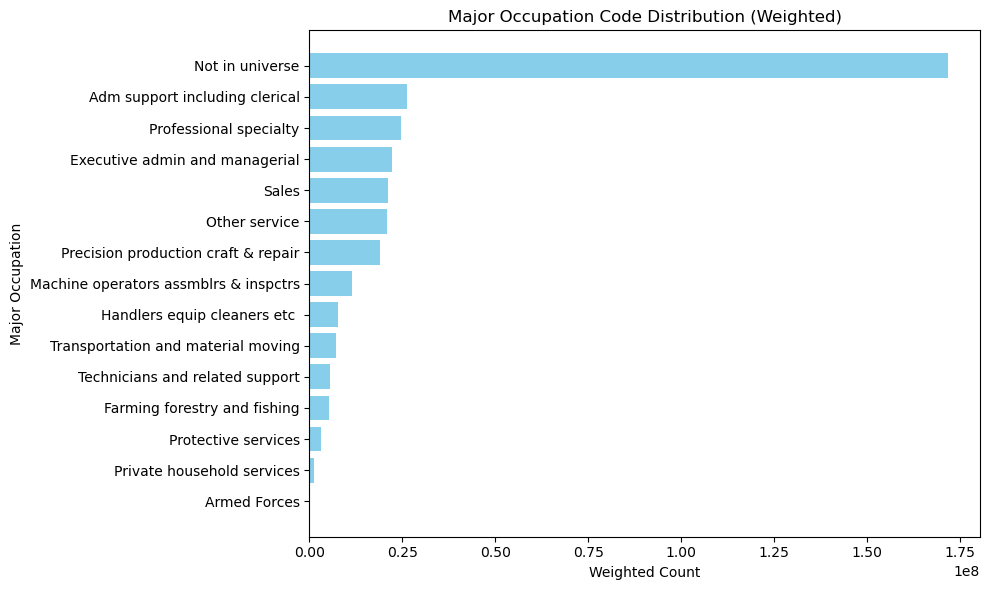

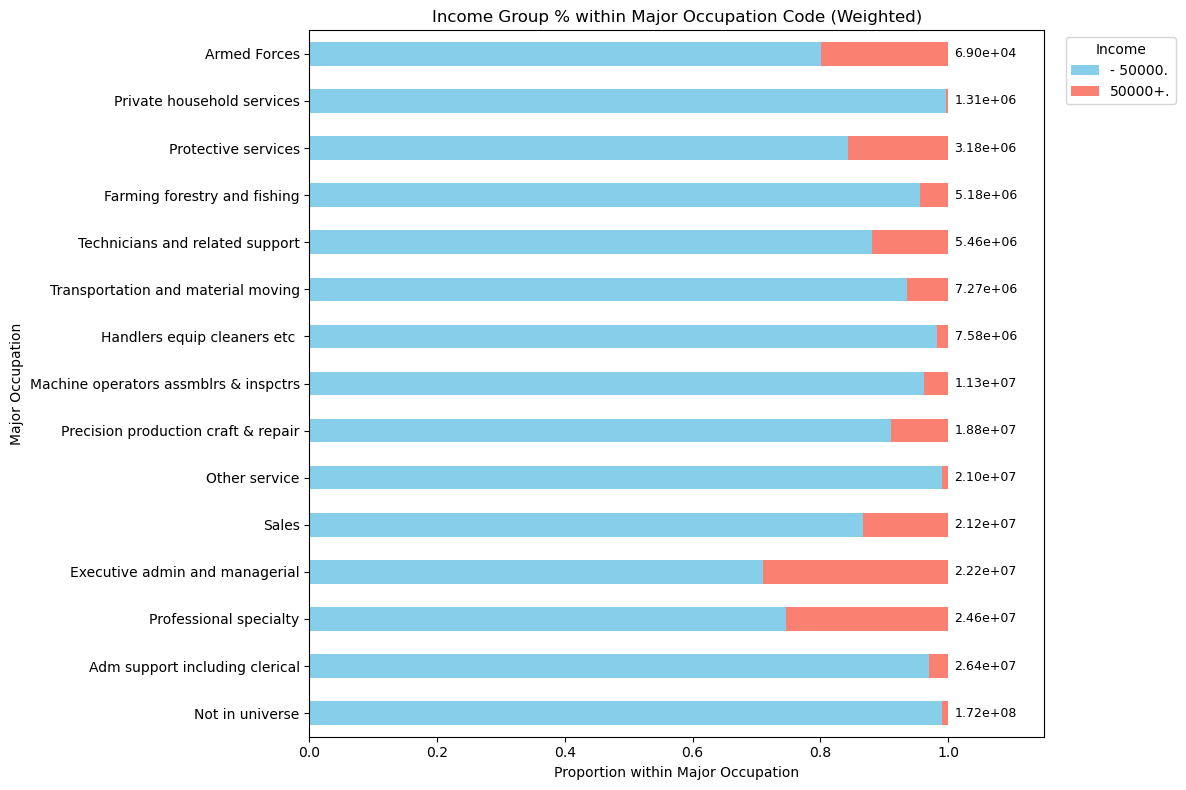

In [205]:
col = "major occupation code"

print("Missing values:", df[col].isna().sum())
print("Unique values:", df[col].nunique())
print("\nTop weighted counts:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False).head(10))

# Weighted distribution
totals = df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.barh(totals.index, totals.values, color="skyblue")
plt.title("Major Occupation Code Distribution (Weighted)")
plt.xlabel("Weighted Count")
plt.ylabel("Major Occupation")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Weighted proportions by income group
counts = df.groupby([col, TARGET_COL])[WEIGHT_COL].sum().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)
props = props.reindex(columns=["- 50000.", "50000+."], fill_value=0)

order = counts.sum(axis=1).sort_values(ascending=False).index
colors = ["skyblue", "salmon"]

plt.figure(figsize=(12,8))
ax = props.loc[order].plot(kind="barh", stacked=True, color=colors, ax=plt.gca())

totals = counts.sum(axis=1).reindex(order)
for i, occ in enumerate(order):
    if pd.notna(totals.loc[occ]):
        ax.text(1.01, i, f"{totals.loc[occ]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.15)
ax.set_xlabel("Proportion within Major Occupation")
ax.set_ylabel("Major Occupation")
ax.set_title("Income Group % within Major Occupation Code (Weighted)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()

**Observations**
- The largest category is **“Not in universe”**, followed by administrative support, professional specialty, executive/managerial, and sales occupations.  
- Higher proportions of **50k+ earners** are concentrated in **Executive/managerial** and **Professional specialty** roles.


---

### Race

Missing values: 0
Unique values: 5

Top weighted counts:
race
White                          2.878458e+08
Black                          4.448490e+07
Asian or Pacific Islander      8.920936e+06
Other                          3.940880e+06
Amer Indian Aleut or Eskimo    2.053395e+06
Name: weight, dtype: float64


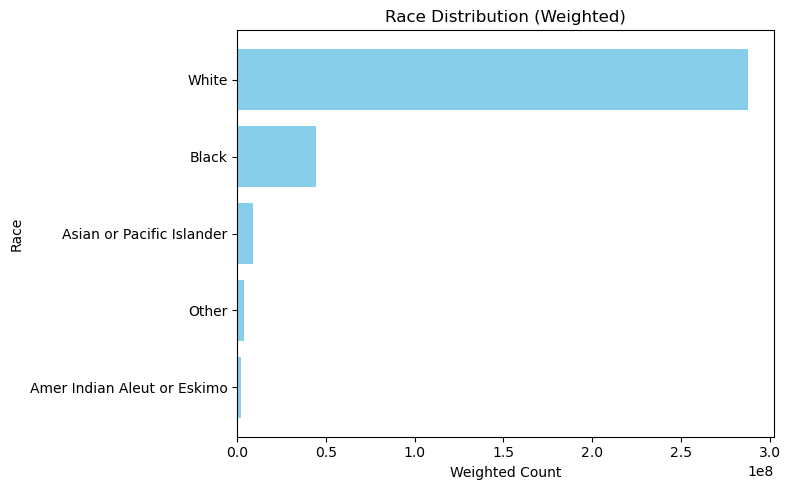

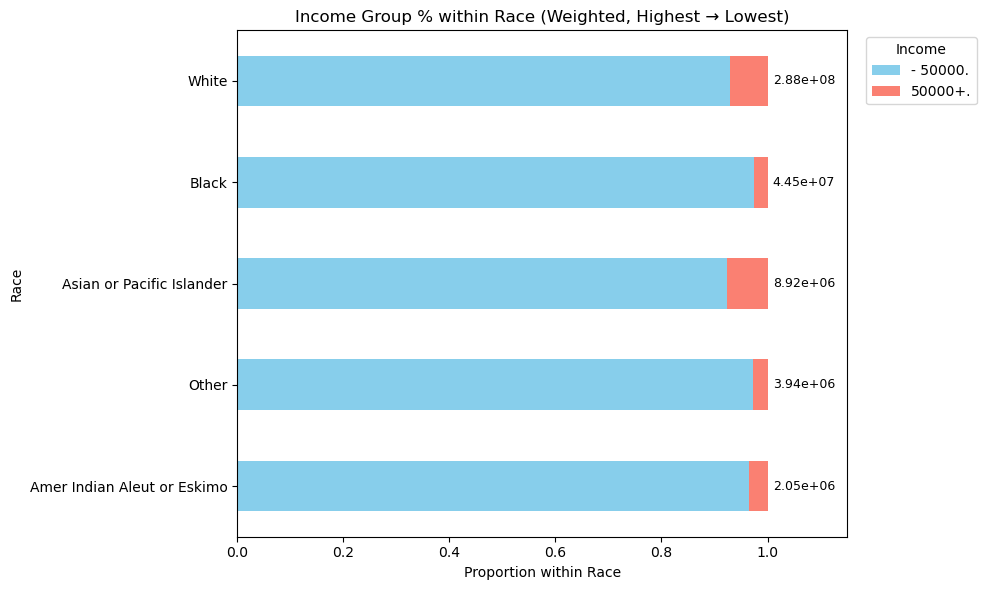

In [213]:
col = "race"

print("Missing values:", df[col].isna().sum())
print("Unique values:", df[col].nunique())
print("\nTop weighted counts:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False).head(10))

# Weighted distribution
totals = df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
plt.barh(totals.index, totals.values, color="skyblue")
plt.title("Race Distribution (Weighted)")
plt.xlabel("Weighted Count")
plt.ylabel("Race")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Weighted proportions by income group
counts = df.groupby([col, TARGET_COL])[WEIGHT_COL].sum().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)
props = props.reindex(columns=["- 50000.", "50000+."], fill_value=0)

order = counts.sum(axis=1).sort_values(ascending=False).index

colors = ["skyblue", "salmon"]

plt.figure(figsize=(10,6))
ax = props.loc[order].plot(kind="barh", stacked=True, color=colors, ax=plt.gca())

totals = counts.sum(axis=1).reindex(order)
for i, race in enumerate(order):
    if pd.notna(totals.loc[race]):
        ax.text(1.01, i, f"{totals.loc[race]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.15)
ax.set_xlabel("Proportion within Race")
ax.set_ylabel("Race")
ax.set_title("Income Group % within Race (Weighted, Highest → Lowest)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")
ax.invert_yaxis()

plt.tight_layout()
plt.show()

**Observations**
- The population is predominantly White, followed by Black, with Asian/Pacific Islander, American Indian/Eskimo, and Other making up much smaller shares.  
- **White** and **Asian/Pacific Islander** groups show a relatively larger proportion of **50k+ earners** compared to other races.  
- **Black, American Indian/Eskimo, and Other groups** remain more heavily concentrated in the **<50k bracket** with limited higher-income representation.
- These data should be handled with appropriate considerations to avoid introducing or reinforcing **racial bias** in analysis, and legal/ethical implications should be carefully acknowledged. 
---


### Hispanic Origin

Missing values: 874
Unique values: 9

Top weighted counts:
hispanic origin
All other                    3.090763e+08
Mexican-American             1.194980e+07
Mexican (Mexicano)           1.098667e+07
Central or South American    4.890342e+06
Puerto Rican                 3.689784e+06
Other Spanish                2.582694e+06
Cuban                        1.470804e+06
Do not know                  5.795131e+05
Chicano                      3.769149e+05
Name: weight, dtype: float64


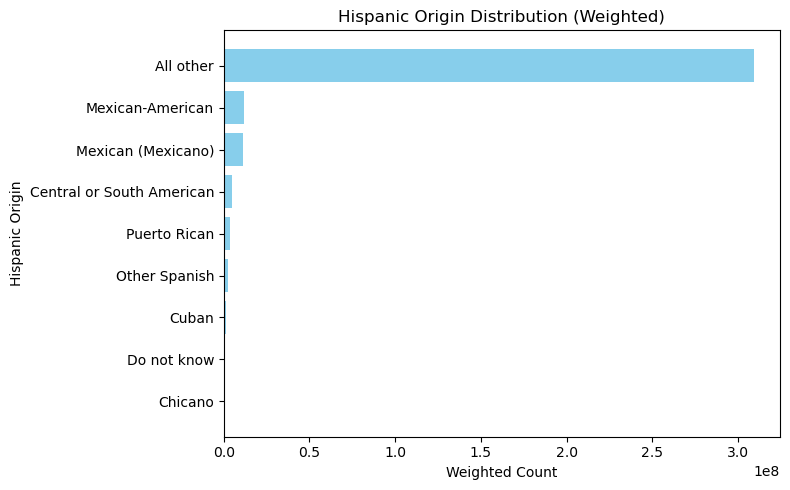

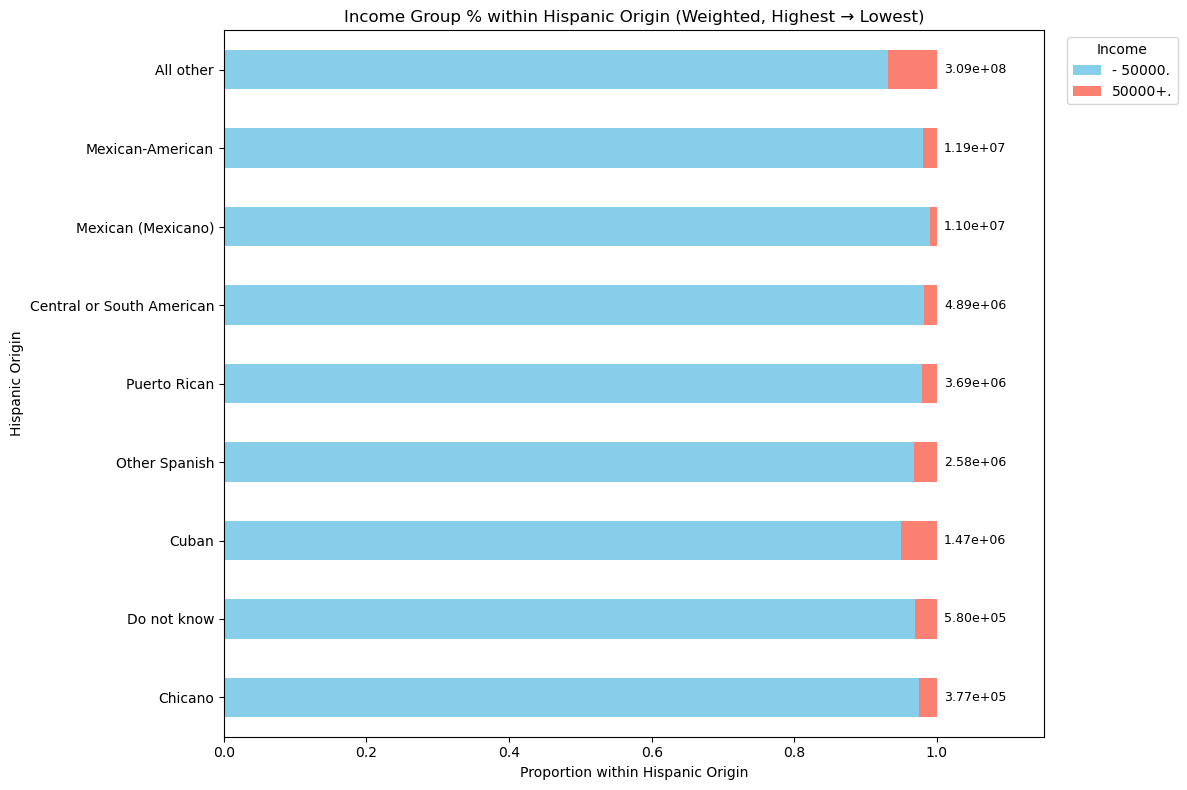

In [219]:
col = "hispanic origin"

print("Missing values:", df[col].isna().sum())
print("Unique values:", df[col].nunique())
print("\nTop weighted counts:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False).head(10))

# Weighted distribution
totals = df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
plt.barh(totals.index, totals.values, color="skyblue")
plt.title("Hispanic Origin Distribution (Weighted)")
plt.xlabel("Weighted Count")
plt.ylabel("Hispanic Origin")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Weighted proportions by income group
counts = df.groupby([col, TARGET_COL])[WEIGHT_COL].sum().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)
props = props.reindex(columns=["- 50000.", "50000+."], fill_value=0)

order = counts.sum(axis=1).sort_values(ascending=False).index

colors = ["skyblue", "salmon"]

plt.figure(figsize=(12,8))
ax = props.loc[order].plot(kind="barh", stacked=True, color=colors, ax=plt.gca())

totals = counts.sum(axis=1).reindex(order)
for i, origin in enumerate(order):
    if pd.notna(totals.loc[origin]):
        ax.text(1.01, i, f"{totals.loc[origin]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.15)
ax.set_xlabel("Proportion within Hispanic Origin")
ax.set_ylabel("Hispanic Origin")
ax.set_title("Income Group % within Hispanic Origin (Weighted, Highest → Lowest)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")
ax.invert_yaxis()

plt.tight_layout()
plt.show()


**Observations**
- The majority fall under **“All other”**, while subgroups like Mexican-American, Mexicano, and Puerto Rican represent smaller shares.
- Higher-income proportions appear slightly stronger in some subgroups (e.g., Cuban), but overall differences remain modest.

---


### Sex

Missing values: 0
Unique values: 2

Top weighted counts:
sex
Female    1.778032e+08
Male      1.694427e+08
Name: weight, dtype: float64


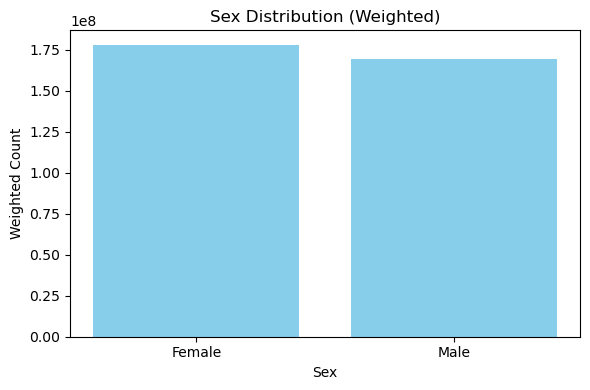

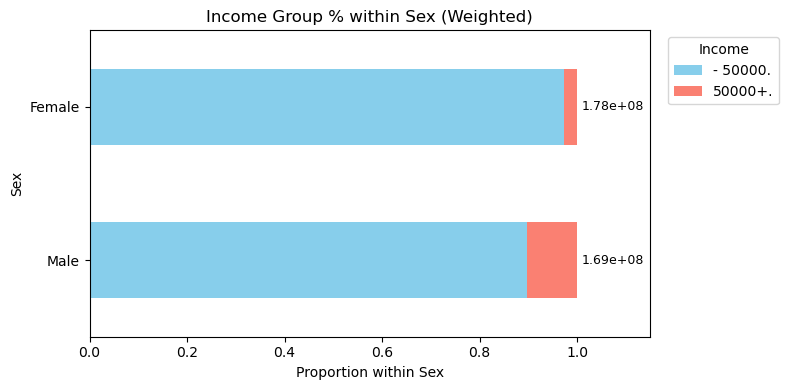

In [224]:
# === Step: Sex ===
col = "sex"

print("Missing values:", df[col].isna().sum())
print("Unique values:", df[col].nunique())
print("\nTop weighted counts:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False))

# Weighted distribution
totals = df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
plt.bar(totals.index, totals.values, color="skyblue")
plt.title("Sex Distribution (Weighted)")
plt.xlabel("Sex")
plt.ylabel("Weighted Count")
plt.tight_layout()
plt.show()

# Weighted proportions by income group
counts = df.groupby([col, TARGET_COL])[WEIGHT_COL].sum().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)
props = props.reindex(columns=["- 50000.", "50000+."], fill_value=0)

order = counts.sum(axis=1).sort_values(ascending=False).index
colors = ["skyblue", "salmon"]

plt.figure(figsize=(8,4))
ax = props.loc[order].plot(kind="barh", stacked=True, color=colors, ax=plt.gca())

totals = counts.sum(axis=1).reindex(order)
for i, cat in enumerate(order):
    if pd.notna(totals.loc[cat]):
        ax.text(1.01, i, f"{totals.loc[cat]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.15)
ax.set_xlabel("Proportion within Sex")
ax.set_ylabel("Sex")
ax.set_title("Income Group % within Sex (Weighted)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")

ax.invert_yaxis()

plt.tight_layout()
plt.show()


**Observations**
- Both **male and female populations are similar in size**, with slightly more females represented. 
- Males have a noticeably higher share of 50k+ earners compared to females, highlighting a clear gender income gap. This gap may partly reflect a higher share of females not participating in the workforce, alongside structural and occupational differences.  


---

### Member of a Labor Union

Missing values: 0
Unique values: 3

Top weighted counts:
member of a labor union
Not in universe    3.128520e+08
No                 2.909889e+07
Yes                5.294994e+06
Name: weight, dtype: float64


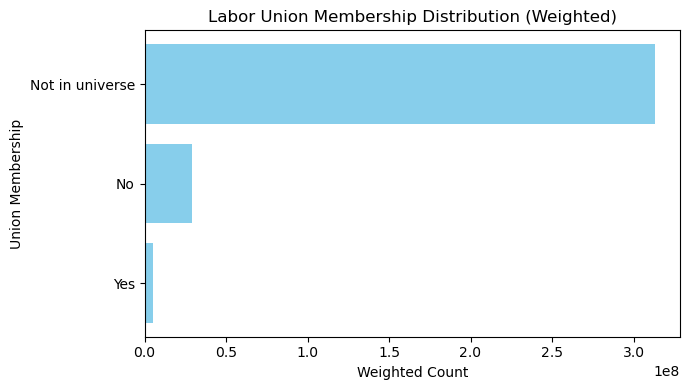

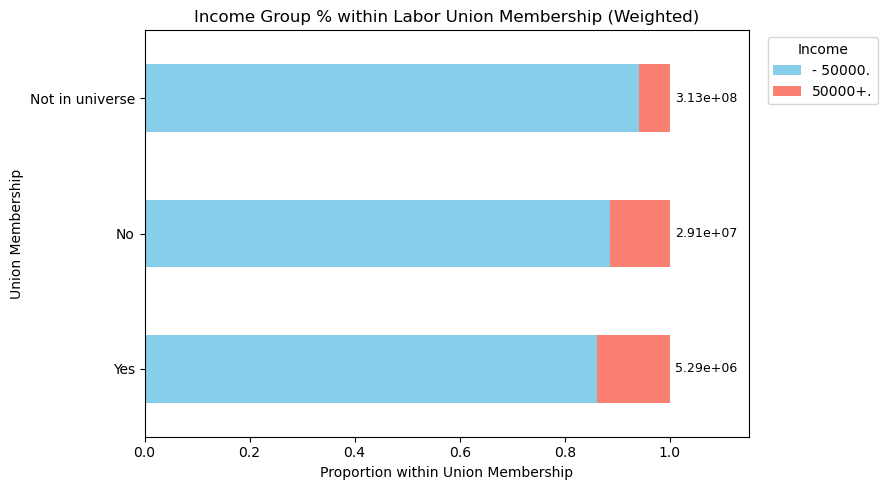

In [228]:
col = "member of a labor union"

print("Missing values:", df[col].isna().sum())
print("Unique values:", df[col].nunique())
print("\nTop weighted counts:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False))

# Weighted distribution
totals = df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(7,4))
plt.barh(totals.index, totals.values, color="skyblue")
plt.title("Labor Union Membership Distribution (Weighted)")
plt.xlabel("Weighted Count")
plt.ylabel("Union Membership")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Weighted proportions by income group
counts = df.groupby([col, TARGET_COL])[WEIGHT_COL].sum().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)
props = props.reindex(columns=["- 50000.", "50000+."], fill_value=0)

order = counts.sum(axis=1).sort_values(ascending=False).index
colors = ["skyblue", "salmon"]

plt.figure(figsize=(9,5))
ax = props.loc[order].plot(kind="barh", stacked=True, color=colors, ax=plt.gca())

totals = counts.sum(axis=1).reindex(order)
for i, cat in enumerate(order):
    if pd.notna(totals.loc[cat]):
        ax.text(1.01, i, f"{totals.loc[cat]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.15)
ax.set_xlabel("Proportion within Union Membership")
ax.set_ylabel("Union Membership")
ax.set_title("Income Group % within Labor Union Membership (Weighted)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")

ax.invert_yaxis()
plt.tight_layout()
plt.show()

**Observations**
- Among those in the workforce, **non-union workers dominate in count** compared to union members.  
- Both groups show a majority in the **<50k bracket**, but **union members have a relatively higher share of 50k+ earners**, suggesting some income benefit from unionization.

---


### Reason for Unemployment

Missing values: 0
Unique values: 6

Top weighted counts:
reason for unemployment
Not in universe          3.361116e+08
Other job loser          3.785951e+06
Re-entrant               3.779794e+06
Job loser - on layoff    1.624527e+06
Job leaver               1.136366e+06
New entrant              8.076583e+05
Name: weight, dtype: float64


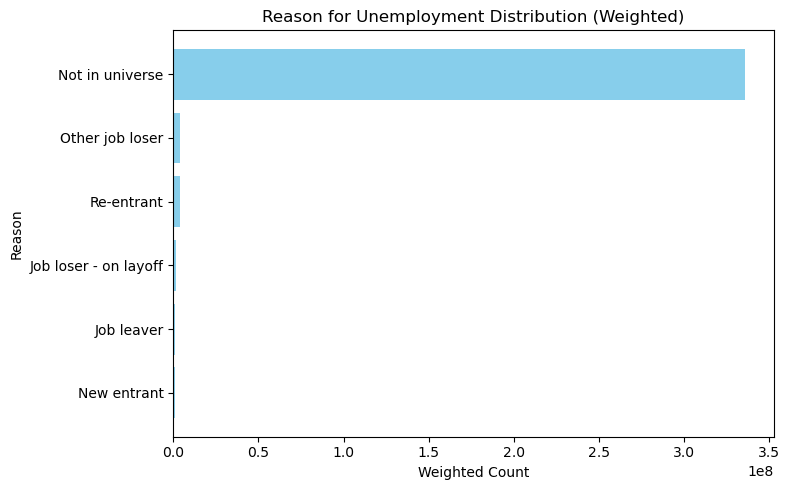

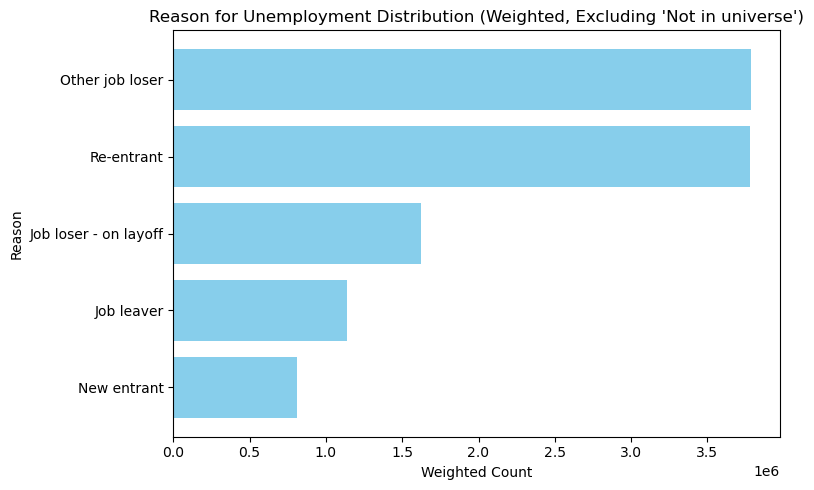

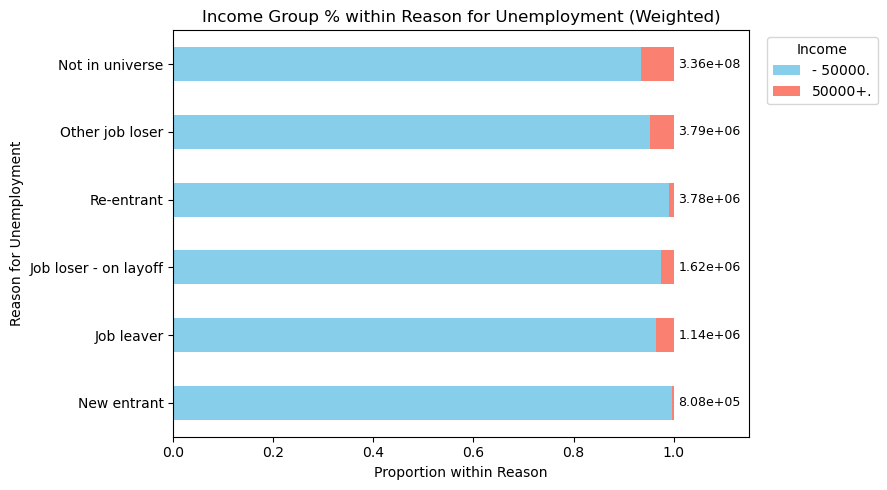

In [234]:
col = "reason for unemployment"

print("Missing values:", df[col].isna().sum())
print("Unique values:", df[col].nunique())
print("\nTop weighted counts:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False).head(10))

# Weighted distribution
totals = df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
plt.barh(totals.index, totals.values, color="skyblue")
plt.title("Reason for Unemployment Distribution (Weighted)")
plt.xlabel("Weighted Count")
plt.ylabel("Reason")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Weighted distribution (excluding 'Not in universe')
df_filtered = df[df[col] != "Not in universe"]
totals_filtered = df_filtered.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
plt.barh(totals_filtered.index, totals_filtered.values, color="skyblue")
plt.title("Reason for Unemployment Distribution (Weighted, Excluding 'Not in universe')")
plt.xlabel("Weighted Count")
plt.ylabel("Reason")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Weighted proportions by income group
counts = df.groupby([col, TARGET_COL])[WEIGHT_COL].sum().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)
props = props.reindex(columns=["- 50000.", "50000+."], fill_value=0)

order = counts.sum(axis=1).sort_values(ascending=False).index
colors = ["skyblue", "salmon"]

plt.figure(figsize=(9,5))
ax = props.loc[order].plot(kind="barh", stacked=True, color=colors, ax=plt.gca())

totals = counts.sum(axis=1).reindex(order)
for i, cat in enumerate(order):
    if pd.notna(totals.loc[cat]):
        ax.text(1.01, i, f"{totals.loc[cat]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.15)
ax.set_xlabel("Proportion within Reason")
ax.set_ylabel("Reason for Unemployment")
ax.set_title("Income Group % within Reason for Unemployment (Weighted)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")

ax.invert_yaxis()
plt.tight_layout()
plt.show()


**Observations**
- The majority fall into the **“Not in universe”** category, with relatively small counts across specific unemployment reasons.  
- Among the unemployed, **Other job losers and job leavers** show a marginally higher share of 50k+ earners compared to other categories.  

---


### full or part time employment stat

Missing values: 0
Unique values: 8

Top weighted counts:
full or part time employment stat
Children or Armed Forces              2.129070e+08
Full-time schedules                   7.263862e+07
Not in labor force                    4.684131e+07
PT for non-econ reasons usually FT    5.997410e+06
Unemployed full-time                  4.214827e+06
PT for econ reasons usually PT        2.160595e+06
Unemployed part- time                 1.535414e+06
PT for econ reasons usually FT        9.507238e+05
Name: weight, dtype: float64


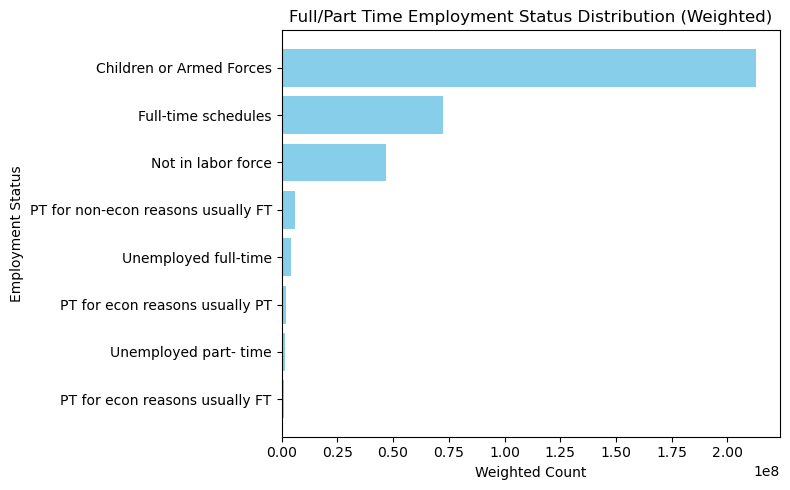

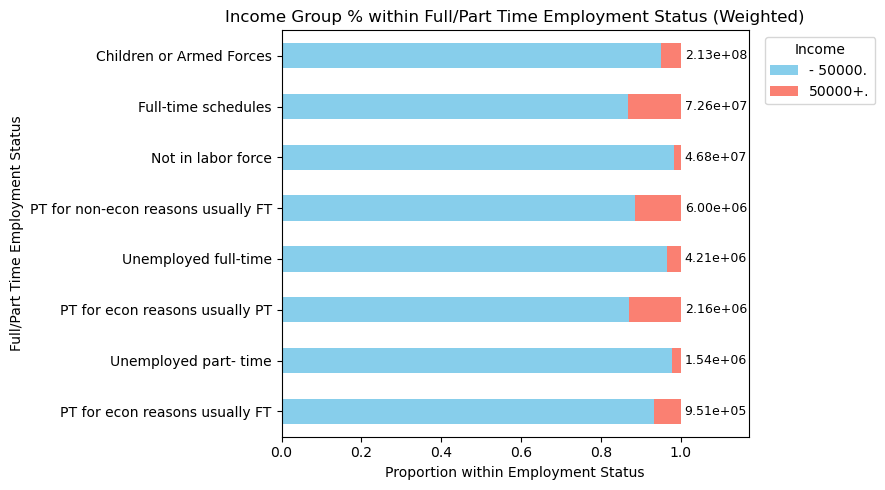

In [245]:

col = "full or part time employment stat"

print("Missing values:", df[col].isna().sum())
print("Unique values:", df[col].nunique())
print("\nTop weighted counts:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False))

# Weighted distribution
totals = df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
plt.barh(totals.index, totals.values, color="skyblue")
plt.title("Full/Part Time Employment Status Distribution (Weighted)")
plt.xlabel("Weighted Count")
plt.ylabel("Employment Status")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Weighted proportions by income group
counts = df.groupby([col, TARGET_COL])[WEIGHT_COL].sum().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)
props = props.reindex(columns=["- 50000.", "50000+."], fill_value=0)

order = counts.sum(axis=1).sort_values(ascending=False).index
colors = ["skyblue", "salmon"]

plt.figure(figsize=(9,5))
ax = props.loc[order].plot(kind="barh", stacked=True, color=colors, ax=plt.gca())

totals = counts.sum(axis=1).reindex(order)
for i, status in enumerate(order):
    if pd.notna(totals.loc[status]):
        ax.text(1.01, i, f"{totals.loc[status]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.17)
ax.set_xlabel("Proportion within Employment Status")
ax.set_ylabel("Full/Part Time Employment Status")
ax.set_title("Income Group % within Full/Part Time Employment Status (Weighted)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")

# biggest group on top
ax.invert_yaxis()

plt.tight_layout()
plt.show()


**Observations**
- The largest groups are **Children/Armed Forces** and those with **full-time schedules**, with “Not in labor force” also making up a substantial share.  
- **Full-time workers and part-timers usually FT** have a noticeably higher proportion of 50k+ earners.

---

### Capital Gains

Missing values: 0
Unique values: 132


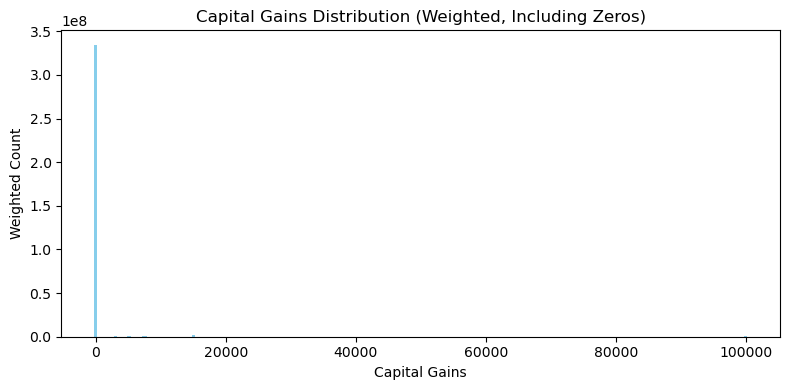

Summary stats (Excluding 0):
count     7379.000000
mean     11754.497493
std      21533.053259
min        114.000000
25%       2964.000000
50%       5178.000000
75%      10520.000000
max      99999.000000
Name: capital gains, dtype: float64


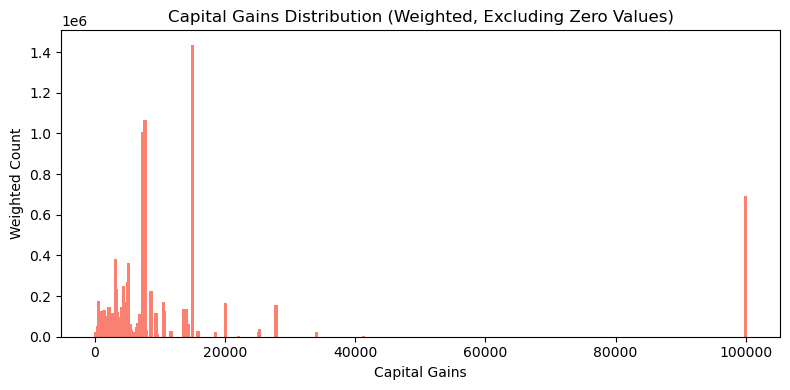

In [255]:
col = "capital gains"

# convert to numeric
df[col] = pd.to_numeric(df[col], errors="coerce")

print("Missing values:", df[col].isna().sum())
print("Unique values:", df[col].nunique())

# Weighted distribution
totals = df.groupby(col)[WEIGHT_COL].sum().sort_index()

plt.figure(figsize=(8,4))
plt.bar(totals.index, totals.values, color="skyblue", width=500)
plt.title("Capital Gains Distribution (Weighted, Including Zeros)")
plt.xlabel("Capital Gains")
plt.ylabel("Weighted Count")
plt.tight_layout()
plt.show()

# Excluding zeros
df_nonzero_capgains = df[df[col] > 0]
print("Summary stats (Excluding 0):")
print(df_nonzero_capgains[col].describe())

totals_nonzero = df_nonzero_capgains.groupby(col)[WEIGHT_COL].sum().sort_index()

plt.figure(figsize=(8,4))
plt.bar(totals_nonzero.index, totals_nonzero.values, color="salmon", width=500)
plt.title("Capital Gains Distribution (Weighted, Excluding Zero Values)")
plt.xlabel("Capital Gains")
plt.ylabel("Weighted Count")
plt.tight_layout()
plt.show()



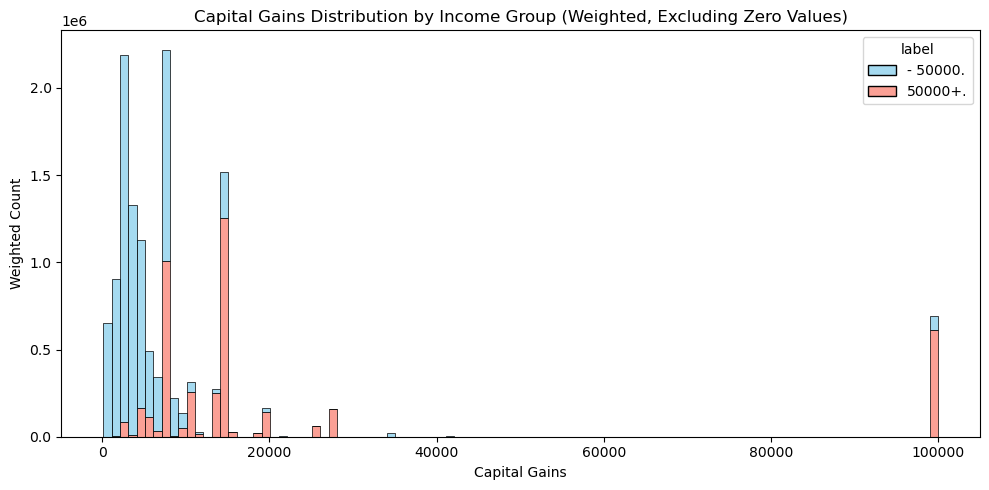

In [256]:
# === Weighted distribution by income group (excluding zeros) ===
col = "capital gains"
df_nonzero_capgains = df[df[col] > 0]

plt.figure(figsize=(10,5))
sns.histplot(
    data=df_nonzero_capgains,
    x=col,
    hue="label",
    weights=WEIGHT_COL,   # <-- add weights here
    bins=100,
    kde=False,
    multiple="stack",
    palette={"- 50000.": "skyblue", "50000+.": "salmon"}
)
plt.title("Capital Gains Distribution by Income Group (Weighted, Excluding Zero Values)")
plt.xlabel("Capital Gains")
plt.ylabel("Weighted Count")
plt.tight_layout()
plt.show()


**Observations**
- The vast majority of individuals report **zero capital gains**, with only a small fraction showing non-zero values.  
- Among those with capital gains, **higher-income groups (50k+) are far more represented at larger gain amounts**, while lower-income individuals are clustered at modest levels.
---


### Capital Losses

Missing values: 0
Unique values: 113


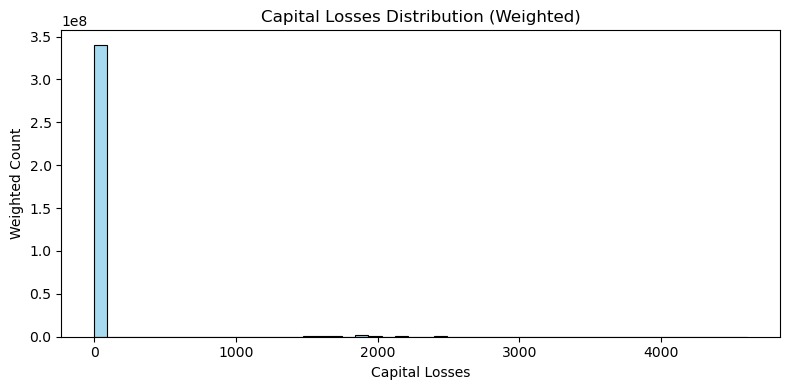


Summary stats for Capital Losses (Excluding 0):
count    3906.000000
mean     1906.031490
std       463.154428
min       155.000000
25%      1669.000000
50%      1887.000000
75%      2001.000000
max      4608.000000
Name: capital losses, dtype: float64


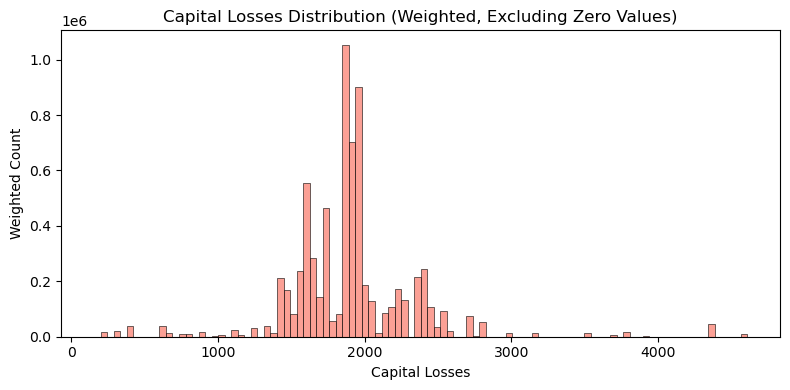

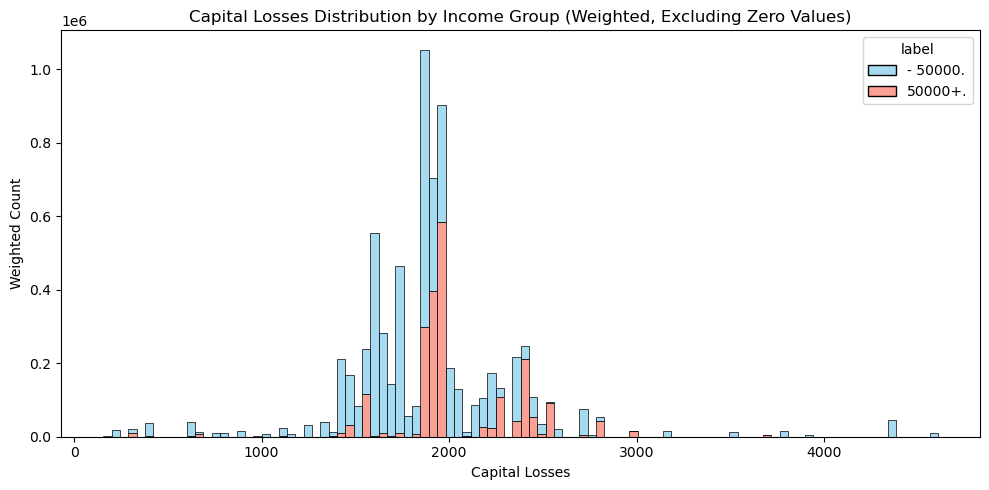

In [264]:
col = "capital losses"
df[col] = pd.to_numeric(df[col], errors="coerce")

print("Missing values:", df[col].isna().sum())
print("Unique values:", df[col].nunique())

# Weighted overall distribution
plt.figure(figsize=(8,4))
sns.histplot(df, x=col, weights=WEIGHT_COL, bins=50, color="skyblue")
plt.title("Capital Losses Distribution (Weighted)")
plt.xlabel("Capital Losses")
plt.ylabel("Weighted Count")
plt.tight_layout()
plt.show()


# Excluding zeros
df_nonzero = df[df[col] > 0]

print("\nSummary stats for Capital Losses (Excluding 0):")
print(df_nonzero[col].describe())

plt.figure(figsize=(8,4))
sns.histplot(df_nonzero, x=col, weights=WEIGHT_COL, bins=100, color="salmon")
plt.title("Capital Losses Distribution (Weighted, Excluding Zero Values)")
plt.xlabel("Capital Losses")
plt.ylabel("Weighted Count")
plt.tight_layout()
plt.show()


# Distribution by income group (weighted, excluding zeros)
plt.figure(figsize=(10,5))
sns.histplot(
    data=df_nonzero,
    x=col,
    hue="label",
    weights=WEIGHT_COL,
    bins=100,
    multiple="stack",
    kde=False,
    palette={"- 50000.": "skyblue", "50000+.": "salmon"}
)
plt.title("Capital Losses Distribution by Income Group (Weighted, Excluding Zero Values)")
plt.xlabel("Capital Losses")
plt.ylabel("Weighted Count")
plt.tight_layout()
plt.show()


**Observations**  
- Majority report **no capital losses**, with only a small share having non-zero values.  
- Non-zero losses cluster around **1,500–2,000**, with relatively more representation from higher-income earners.
---


### Dividends from Stocks

Missing values: 0
Unique values: 1478

Summary stats (including 0):
count    199523.000000
mean        197.529533
std        1984.163658
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       99999.000000
Name: dividends from stocks, dtype: float64


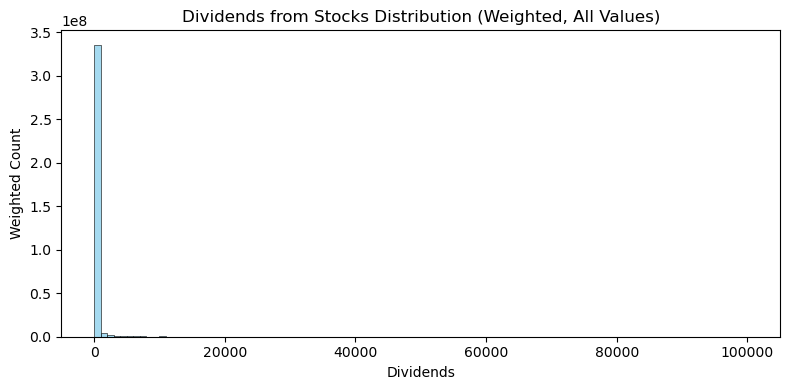


Summary stats (Excluding 0):
count    21141.000000
mean      1864.229932
std       5835.216597
min          1.000000
25%         82.000000
50%        301.000000
75%       1362.000000
max      99999.000000
Name: dividends from stocks, dtype: float64


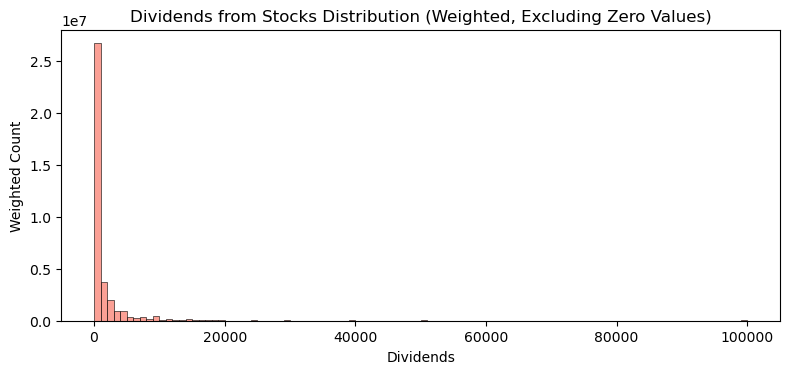

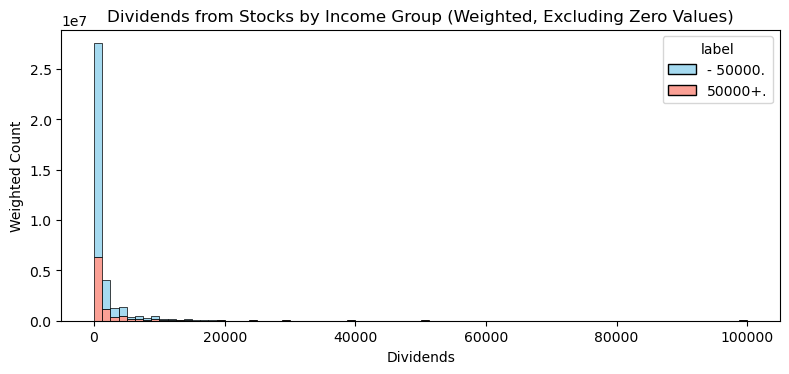

In [269]:
col = "dividends from stocks"
df[col] = pd.to_numeric(df[col], errors="coerce")

print("Missing values:", df[col].isna().sum())
print("Unique values:", df[col].nunique())
print("\nSummary stats (including 0):")
print(df[col].describe())


# Overall weighted distribution (all values)
plt.figure(figsize=(8,4))
sns.histplot(df, x=col, weights=WEIGHT_COL, bins=100, color="skyblue")
plt.title("Dividends from Stocks Distribution (Weighted, All Values)")
plt.xlabel("Dividends")
plt.ylabel("Weighted Count")
plt.tight_layout()
plt.show()


# Excluding zero values
df_nonzero_div = df[df[col] > 0]

print("\nSummary stats (Excluding 0):")
print(df_nonzero_div[col].describe())

plt.figure(figsize=(8,4))
sns.histplot(df_nonzero_div, x=col, weights=WEIGHT_COL, bins=100, color="salmon")
plt.title("Dividends from Stocks Distribution (Weighted, Excluding Zero Values)")
plt.xlabel("Dividends")
plt.ylabel("Weighted Count")
plt.tight_layout()
plt.show()


# Distribution by income group (weighted, excluding zeros)
plt.figure(figsize=(8,4))
sns.histplot(
    data=df_nonzero_div,
    x=col,
    hue="label",
    weights=WEIGHT_COL,
    bins=80,
    multiple="stack",
    kde=False,
    palette={"- 50000.": "skyblue", "50000+.": "salmon"}
)
plt.title("Dividends from Stocks by Income Group (Weighted, Excluding Zero Values)")
plt.xlabel("Dividends")
plt.ylabel("Weighted Count")
plt.tight_layout()
plt.show()



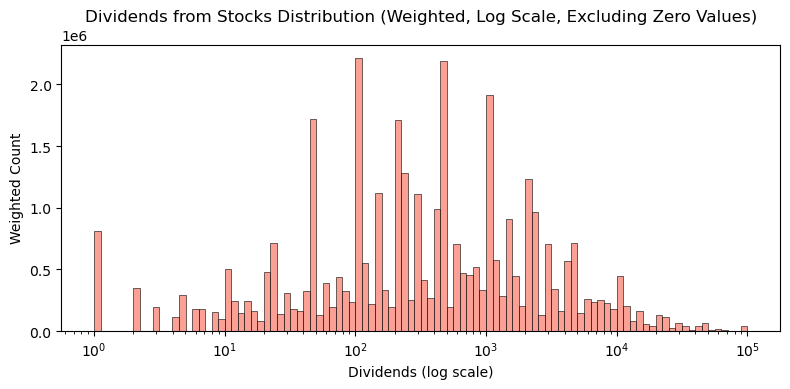

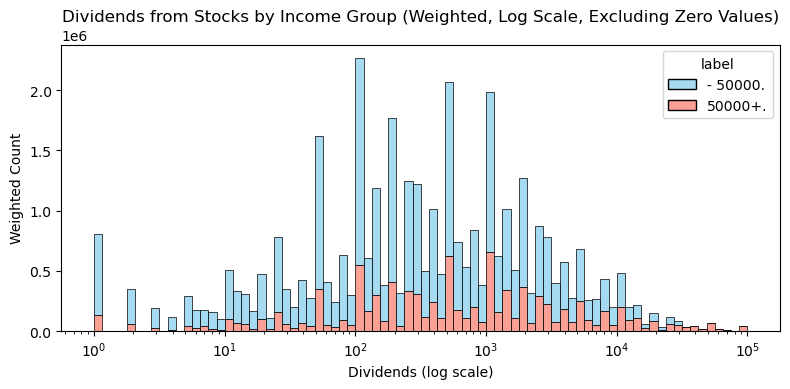

In [271]:

# Log-scaled weighted distribution (excluding zeros)
plt.figure(figsize=(8,4))
sns.histplot(
    df_nonzero_div,
    x=col,
    weights=WEIGHT_COL,
    bins=100,
    color="salmon",
    log_scale=(True, False)  # log scale on x-axis
)
plt.title("Dividends from Stocks Distribution (Weighted, Log Scale, Excluding Zero Values)")
plt.xlabel("Dividends (log scale)")
plt.ylabel("Weighted Count")
plt.tight_layout()
plt.show()


# Log-scaled by income group (weighted, excluding zeros)
plt.figure(figsize=(8,4))
sns.histplot(
    data=df_nonzero_div,
    x=col,
    hue="label",
    weights=WEIGHT_COL,
    bins=80,
    multiple="stack",
    palette={"- 50000.": "skyblue", "50000+.": "salmon"},
    log_scale=(True, False)
)
plt.title("Dividends from Stocks by Income Group (Weighted, Log Scale, Excluding Zero Values)")
plt.xlabel("Dividends (log scale)")
plt.ylabel("Weighted Count")
plt.tight_layout()
plt.show()


**Observations**
- The distribution of **dividends is extremely right-skewed**, with most individuals reporting very low or zero dividends.  
- Among those with dividends, **higher-income earners (50k+) are more likely to report larger dividend amounts**, indicating stronger participation in stock-related investments.
---


### Tax Filer Status Summary

Missing values: 0
Unique values: 6

Value counts (weighted):
tax filer stat
Nonfiler                        1.278918e+08
Joint both under 65             1.156458e+08
Single                          6.951902e+07
Joint both 65+                  1.435770e+07
Head of household               1.317818e+07
Joint one under 65 & one 65+    6.653446e+06
Name: weight, dtype: float64


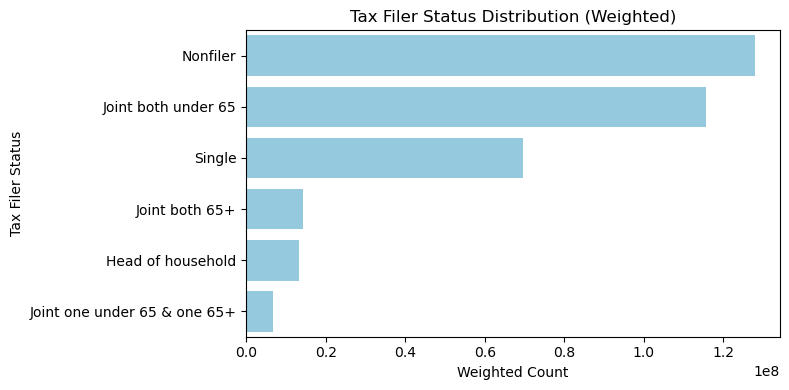

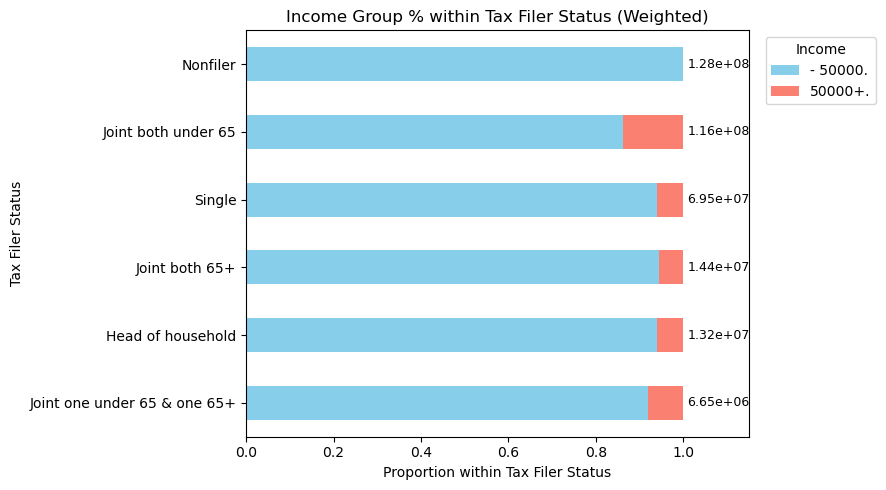

In [336]:
col = "tax filer stat"

print("Missing values:", df[col].isna().sum())
print("Unique values:", df[col].nunique())
print("\nValue counts (weighted):")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False))


# Overall weighted distribution
totals = df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(
    y=totals.index,
    x=totals.values,
    color="skyblue"
)
plt.title("Tax Filer Status Distribution (Weighted)")
plt.xlabel("Weighted Count")
plt.ylabel("Tax Filer Status")
plt.tight_layout()
plt.show()

# Normalized stacked % distribution with weighted counts
props = counts.div(counts.sum(axis=1), axis=0)
cols_order = ["- 50000.", "50000+."]
props = props.reindex(columns=cols_order, fill_value=0)

plt.figure(figsize=(9,5))
ax = props.plot(
    kind="barh", stacked=True, color=["skyblue", "salmon"], figsize=(9,5), ax=plt.gca()
)

# annotate weighted totals
totals = counts.sum(axis=1)
for i, cat in enumerate(counts.index):
    ax.text(1.01, i, f"{totals.loc[cat]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.15)
ax.set_xlabel("Proportion within Tax Filer Status")
ax.set_ylabel("Tax Filer Status")
ax.set_title("Income Group % within Tax Filer Status (Weighted)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")
ax.invert_yaxis()

plt.tight_layout()
plt.show()


**Observations**  
- **Non-filers** form the largest group, followed by joint filers under 65 and singles.  
- **Joint filers under 65** show the **highest share of 50k+ earners**, while non-filers are mostly in the <50k group.  

---

### Region of Previous Residence Summary

Missing values: 0
Unique values: 6

Weighted value counts:
region of previous residence
Not in universe    3.186239e+08
South              1.009418e+07
West               7.169214e+06
Midwest            6.458946e+06
Northeast          3.998805e+06
Abroad             9.008612e+05
Name: weight, dtype: float64


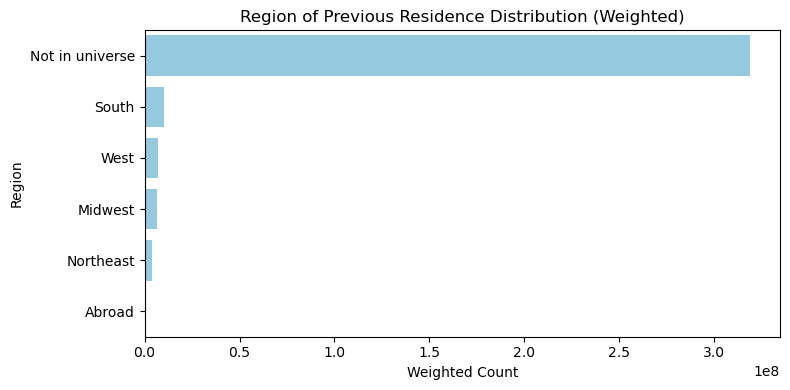

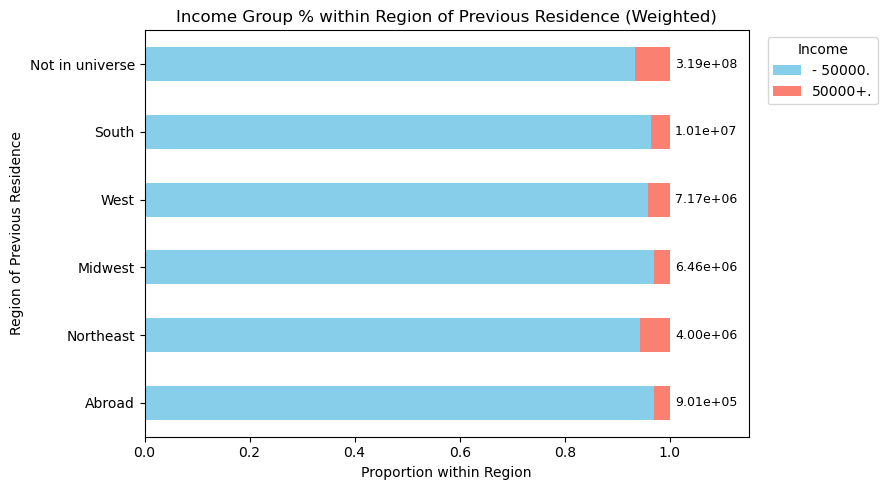

In [338]:
col = "region of previous residence"

print("Missing values:", df[col].isna().sum())
print("Unique values:", df[col].nunique())
print("\nWeighted value counts:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False))


# Overall weighted distribution
totals = df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(
    y=totals.index,
    x=totals.values,
    color="skyblue"
)
plt.title("Region of Previous Residence Distribution (Weighted)")
plt.xlabel("Weighted Count")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


# Normalized stacked % distribution with weighted counts
counts = df.groupby([col, "label"])[WEIGHT_COL].sum().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)

cols_order = ["- 50000.", "50000+."]
props = props.reindex(columns=cols_order, fill_value=0)

order = df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False).index
colors = ["skyblue", "salmon"]

plt.figure(figsize=(9,5))
ax = props.loc[order].plot(
    kind="barh", stacked=True, color=colors, figsize=(9,5), ax=plt.gca()
)

# annotate weighted totals
totals = counts.sum(axis=1).reindex(order)
for i, cat in enumerate(order):
    ax.text(1.01, i, f"{totals.loc[cat]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.15)
ax.set_xlabel("Proportion within Region")
ax.set_ylabel("Region of Previous Residence")
ax.set_title("Income Group % within Region of Previous Residence (Weighted)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")
ax.invert_yaxis()

plt.tight_layout()
plt.show()


**Observations**  
- The vast majority fall under the **“Not in universe”** group, indicating most are **non-movers**, and they show a **marginally higher income** share.
- Among movers, the **South** has the largest share, while the **Northeast** shows relatively better income distribution compared to other regions.  


---

### State of Previous Residence Summary

In [346]:
col = "state of previous residence"

print("Missing values:", df[col].isna().sum())
print("Unique values:", df[col].nunique())
print("\nWeighted value counts (top 10):")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False).head(10))


Missing values: 0
Unique values: 51

Weighted value counts (top 10):
state of previous residence
Not in universe    3.186239e+08
California         4.069633e+06
Utah               2.383518e+06
Florida            1.726156e+06
?                  1.573471e+06
North Carolina     1.430457e+06
Oklahoma           1.111655e+06
Indiana            9.921964e+05
Abroad             9.881577e+05
Minnesota          9.725754e+05
Name: weight, dtype: float64


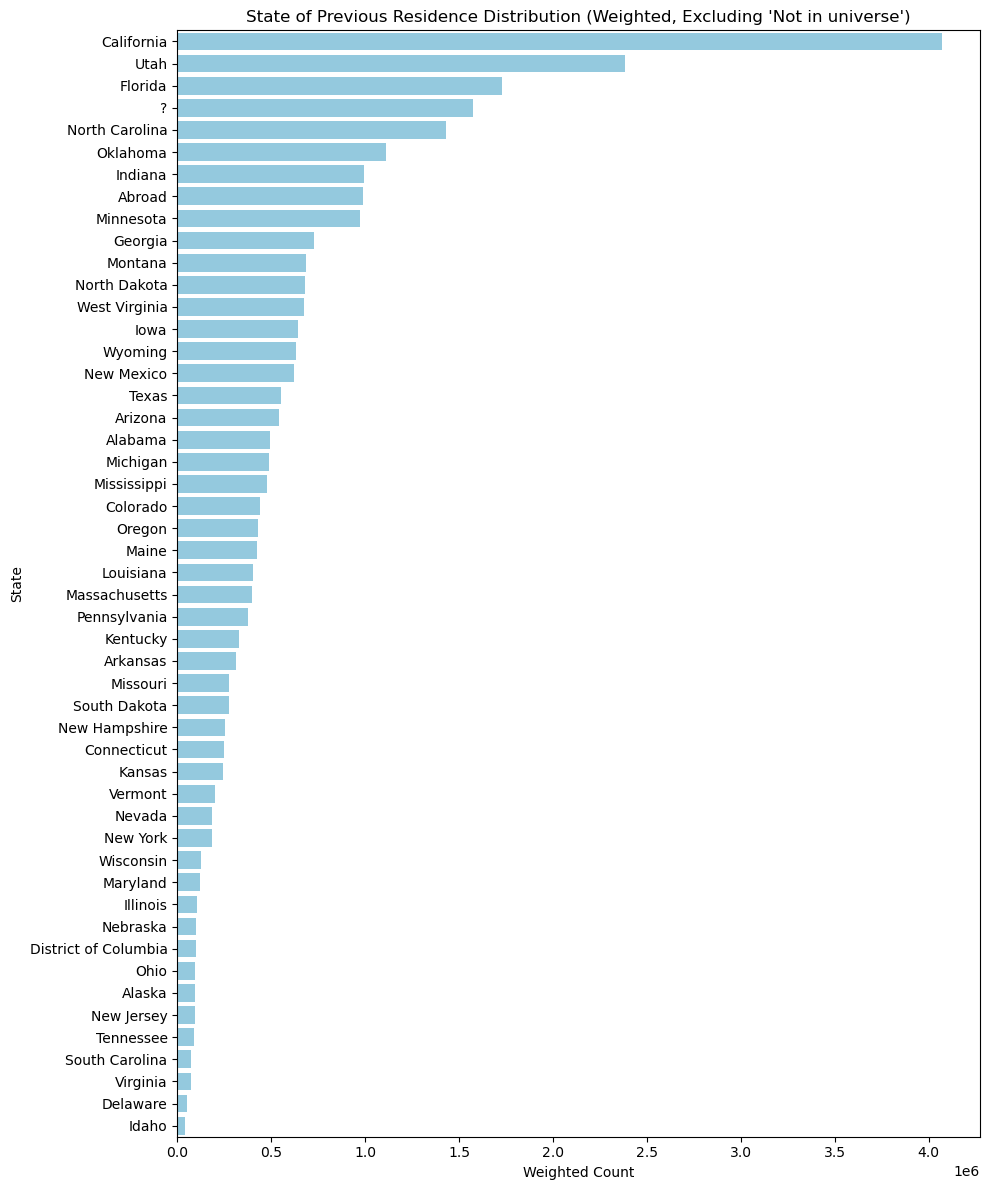

In [348]:
# Overall weighted distribution (excluding "Not in universe")
df_states = df[df[col] != "Not in universe"]

totals = df_states.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(10,12))
sns.barplot(
    y=totals.index,
    x=totals.values,
    color="skyblue"
)
plt.title("State of Previous Residence Distribution (Weighted, Excluding 'Not in universe')")
plt.xlabel("Weighted Count")
plt.ylabel("State")
plt.tight_layout()
plt.show()

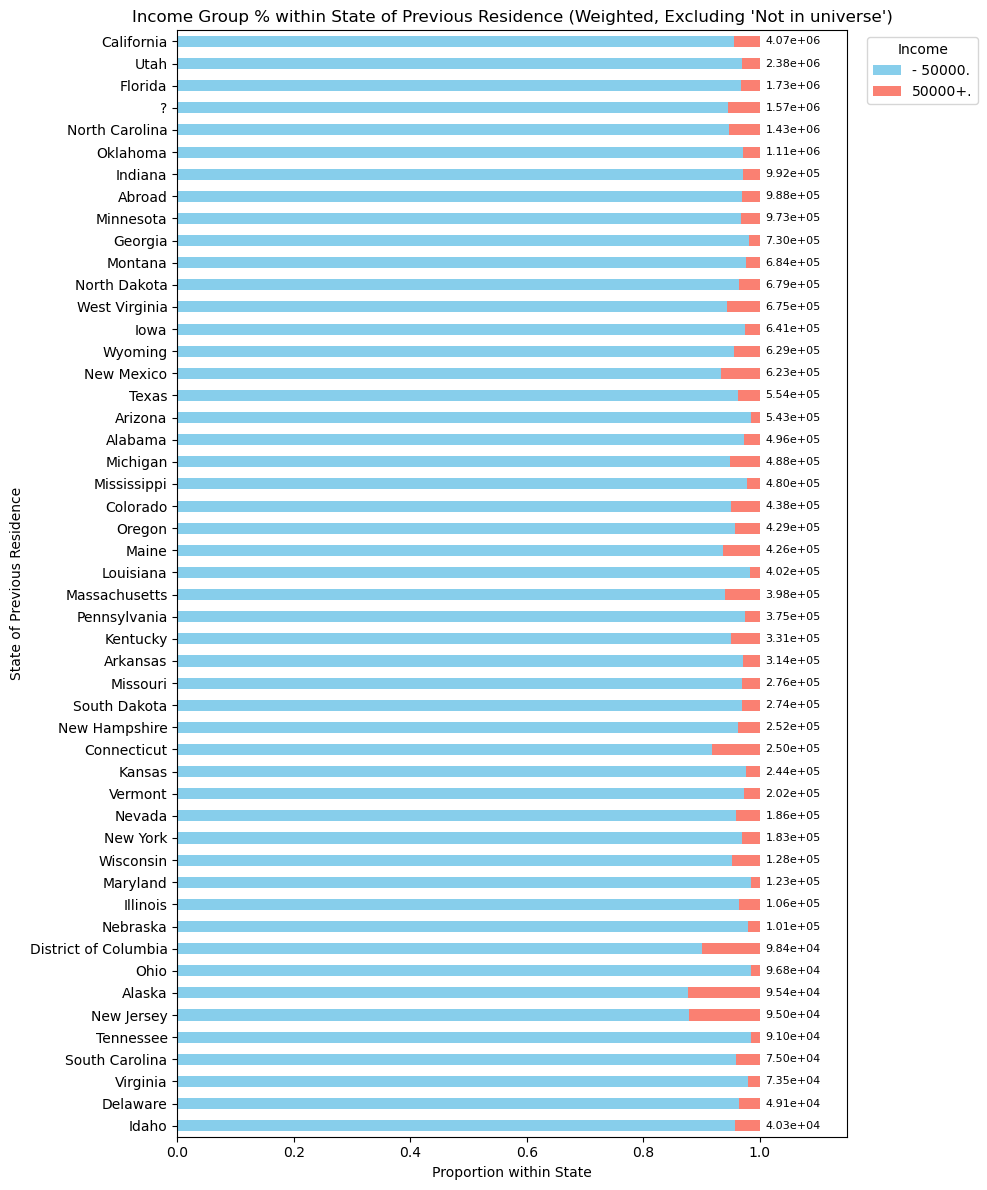

In [350]:
# Normalized stacked % distribution with weighted counts
counts = df_states.groupby([col, "label"])[WEIGHT_COL].sum().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)

cols_order = ["- 50000.", "50000+."]
props = props.reindex(columns=cols_order, fill_value=0)
order = df_states.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False).index
colors = ["skyblue", "salmon"]

plt.figure(figsize=(10,12))
ax = props.loc[order].plot(
    kind="barh", stacked=True, color=colors, figsize=(10,12), ax=plt.gca()
)

# annotate weighted totals
totals = counts.sum(axis=1).reindex(order)
for i, state in enumerate(order):
    ax.text(1.01, i, f"{totals.loc[state]:.2e}", va="center", ha="left", fontsize=8)

ax.set_xlim(0, 1.15)
ax.set_xlabel("Proportion within State")
ax.set_ylabel("State of Previous Residence")
ax.set_title("Income Group % within State of Previous Residence (Weighted, Excluding 'Not in universe')")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")
ax.invert_yaxis()

plt.tight_layout()
plt.show()


**Observations**  
- **California, Utah, Florida, and North Carolina** are the top states of previous residence among movers, with California leading by a large margin.  
- Most other states contribute relatively **small shares**, highlighting a strong concentration of movers from only a few key states.  

---

### Detailed Household and Family Stat

Missing values: 0

Weighted value counts (top 10):
detailed household and family stat
Householder                                        91596449.50
Child <18 never marr not in subfamily              83782077.81
Spouse of householder                              71551130.90
Nonfamily householder                              38663476.27
Child 18+ never marr Not in a subfamily            24052052.80
Secondary individual                               12055761.99
Other Rel 18+ ever marr not in subfamily            3524633.65
Other Rel 18+ never marr not in subfamily           3353780.84
Grandchild <18 never marr child of subfamily RP     3267454.13
Child 18+ ever marr Not in a subfamily              2387277.63
Name: weight, dtype: float64


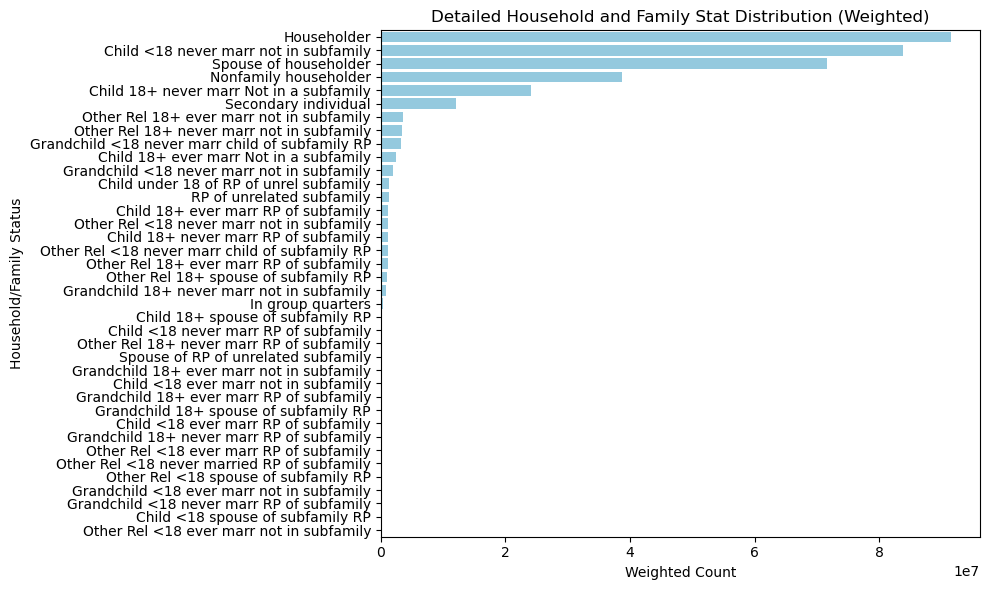

In [352]:
col = "detailed household and family stat"

print("Missing values:", df[col].isna().sum())
print("\nWeighted value counts (top 10):")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False).head(10))

# Overall weighted distribution
totals = df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    y=totals.index,
    x=totals.values,
    color="skyblue"
)
plt.title("Detailed Household and Family Stat Distribution (Weighted)")
plt.xlabel("Weighted Count")
plt.ylabel("Household/Family Status")
plt.tight_layout()
plt.show()


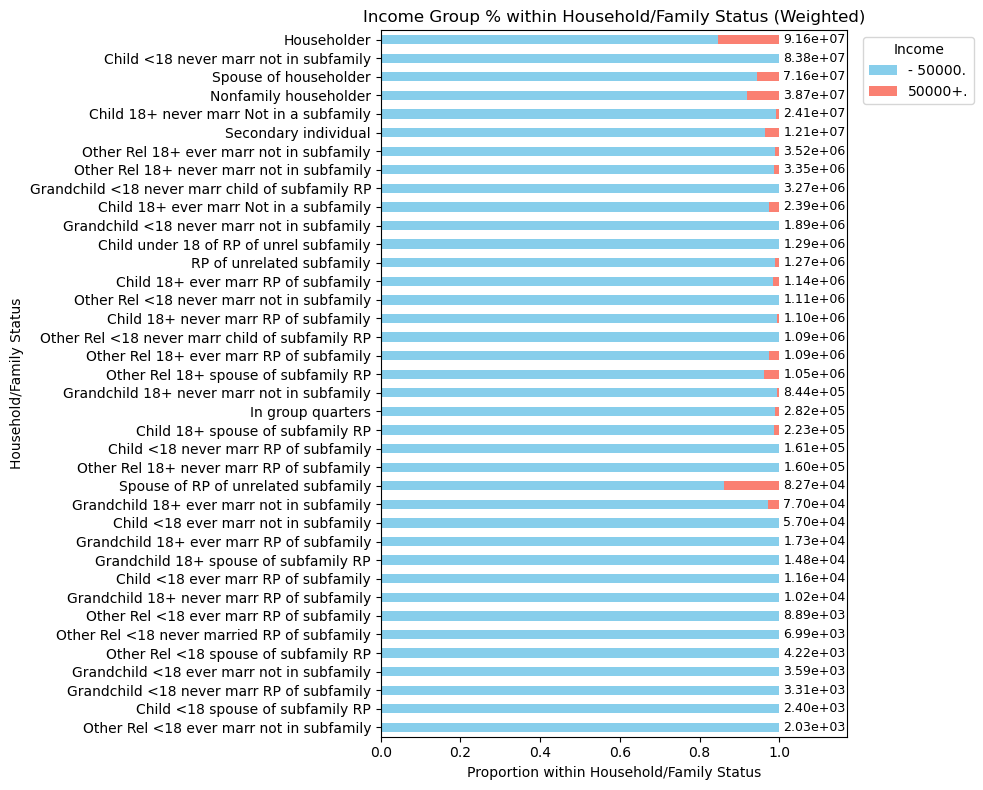

In [354]:

# Weighted normalized % distribution with counts
counts = df.groupby([col, "label"])[WEIGHT_COL].sum().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)

cols_order = ["- 50000.", "50000+."]
props = props.reindex(columns=cols_order, fill_value=0)

order = totals.index
colors = ["skyblue", "salmon"]

plt.figure(figsize=(10,8))
ax = props.loc[order].plot(
    kind="barh", stacked=True, color=colors, figsize=(10,8), ax=plt.gca()
)

for i, cat in enumerate(order):
    ax.text(1.01, i, f"{totals.loc[cat]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.17)
ax.set_xlabel("Proportion within Household/Family Status")
ax.set_ylabel("Household/Family Status")
ax.set_title("Income Group % within Household/Family Status (Weighted)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")

ax.invert_yaxis()
plt.tight_layout()
plt.show()


**Observations**  
- The **largest groups** are **householders**, **children under 18 never married**, and **spouses of householders**.  
- Higher incomes are somewhat more common among **householders and their spouses**, while most other household/family roles are predominantly lower income.

---

### Detailed Household Summary in Household

Missing values: 0

Unique values: 8

Top weighted counts:
detailed household summary in household
Householder                             1.302764e+08
Child under 18 never married            8.396315e+07
Spouse of householder                   7.156694e+07
Child 18 or older                       2.890851e+07
Other relative of householder           1.754472e+07
Nonrelative of householder              1.472089e+07
Group Quarters- Secondary individual    1.943183e+05
Child under 18 ever married             7.096567e+04
Name: weight, dtype: float64


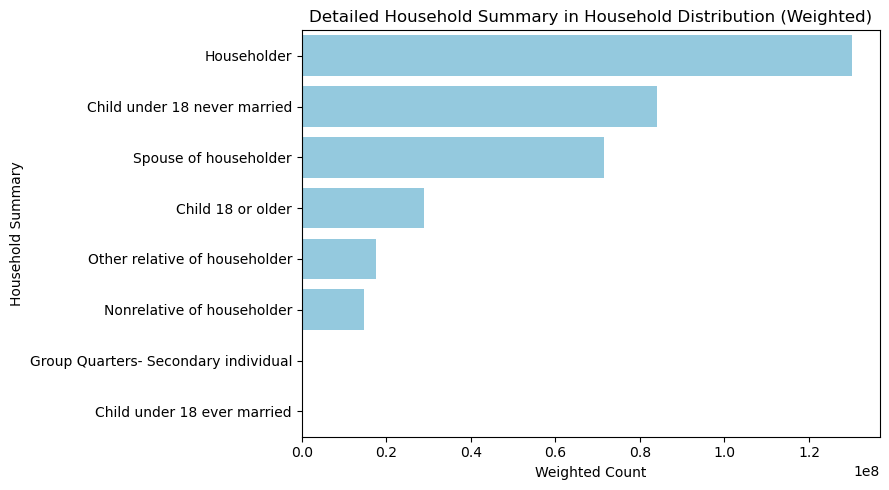

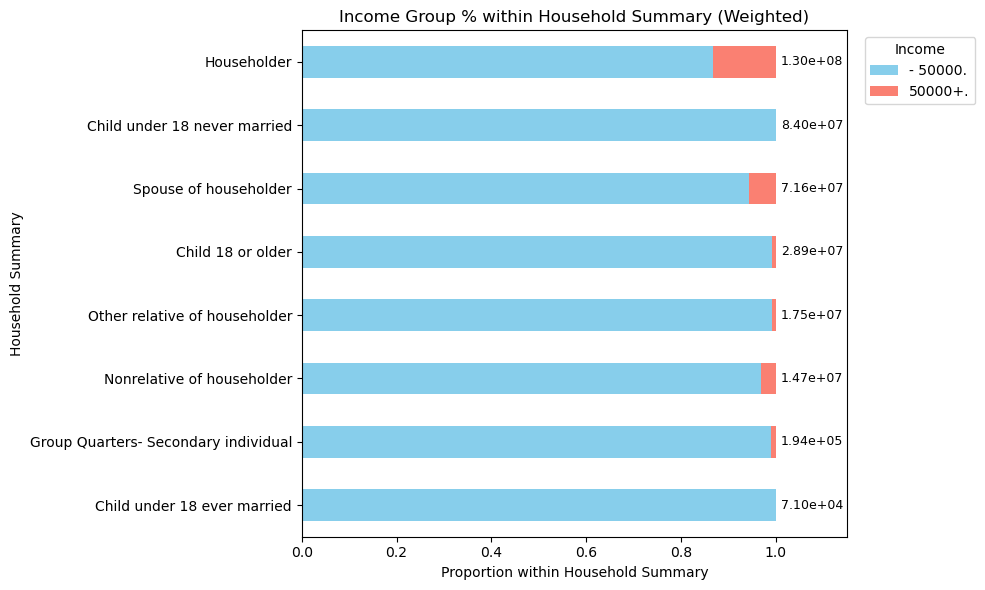

In [356]:
col = "detailed household summary in household"

print("Missing values:", df[col].isna().sum())
print("\nUnique values:", df[col].nunique())
print("\nTop weighted counts:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False).head(10))

# Overall weighted distribution
totals = df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(9,5))
sns.barplot(
    y=totals.index,
    x=totals.values,
    color="skyblue"
)
plt.title("Detailed Household Summary in Household Distribution (Weighted)")
plt.xlabel("Weighted Count")
plt.ylabel("Household Summary")
plt.tight_layout()
plt.show()

# Weighted normalized % distribution with counts
counts = df.groupby([col, "label"])[WEIGHT_COL].sum().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)

cols_order = ["- 50000.", "50000+."]
props = props.reindex(columns=cols_order, fill_value=0)

order = totals.index
colors = ["skyblue", "salmon"]

plt.figure(figsize=(10,6))
ax = props.loc[order].plot(
    kind="barh", stacked=True, color=colors, figsize=(10,6), ax=plt.gca()
)

for i, cat in enumerate(order):
    ax.text(1.01, i, f"{totals.loc[cat]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.15)
ax.set_xlabel("Proportion within Household Summary")
ax.set_ylabel("Household Summary")
ax.set_title("Income Group % within Household Summary (Weighted)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")
ax.invert_yaxis()

plt.tight_layout()
plt.show()


**Observations**  
- **Householders** make up the largest group, followed by **children under 18** and **spouses of householders**.  
- Higher incomes are mainly concentrated among **householders and their spouses**, while other groups are overwhelmingly in the lower income bracket.

---

### Weight

Missing values: 0
Unique values: 99800

Summary stats:
count    199523.000000
mean       1740.380269
std         993.768156
min          37.870000
25%        1061.615000
50%        1618.310000
75%        2188.610000
max       18656.300000
Name: weight, dtype: float64


<Figure size 800x400 with 0 Axes>

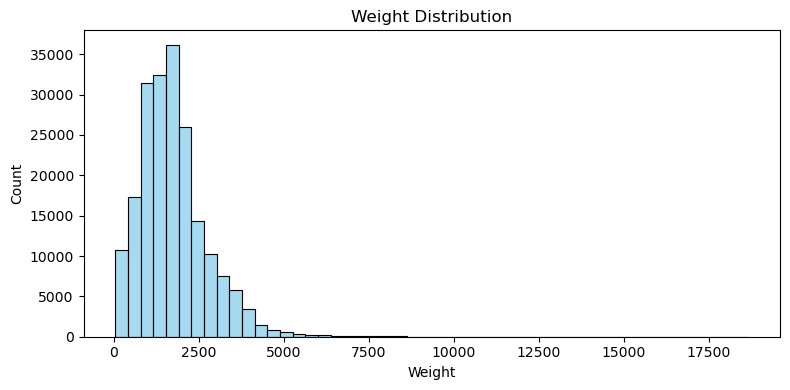

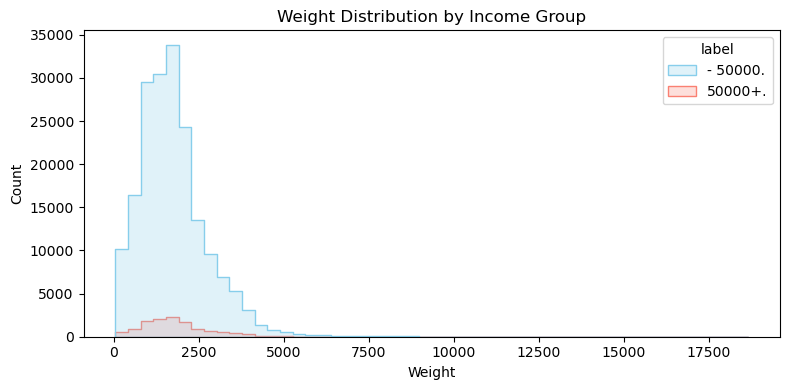

In [327]:
col = "weight"

df[col] = pd.to_numeric(df[col], errors="coerce")

print("Missing values:", df[col].isna().sum())
print("Unique values:", df[col].nunique())
print("\nSummary stats:")
print(df[col].describe())

# Overall distribution
plt.figure(figsize=(8,4))
sns.histplot(df[col], bins=50, kde=False, color="skyblue")
plt.title("Weight Distribution")
plt.xlabel("Weight")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Distribution by income group
plt.figure(figsize=(8,4))
sns.histplot(
    data=df,
    x=col,
    hue="label",
    bins=50,
    kde=False,
    palette={"- 50000.": "skyblue", "50000+.": "salmon"},
    element="step"
)
plt.title("Weight Distribution by Income Group")
plt.xlabel("Weight")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


**Observations**  
- The distribution is **right-skewed**, with most observations between **500–3000**.

---

### Migration Code - Change in MSA

Missing values: 0
Unique values: 10

Top weighted counts:
migration code-change in msa
?                   1.746753e+08
Nonmover            1.412779e+08
MSA to MSA          2.073675e+07
NonMSA to nonMSA    4.189388e+06
Not in universe     2.670705e+06
MSA to nonMSA       1.219002e+06
NonMSA to MSA       1.158451e+06
Abroad to MSA       7.967320e+05
Not identifiable    4.210820e+05
Abroad to nonMSA    1.006009e+05
Name: weight, dtype: float64


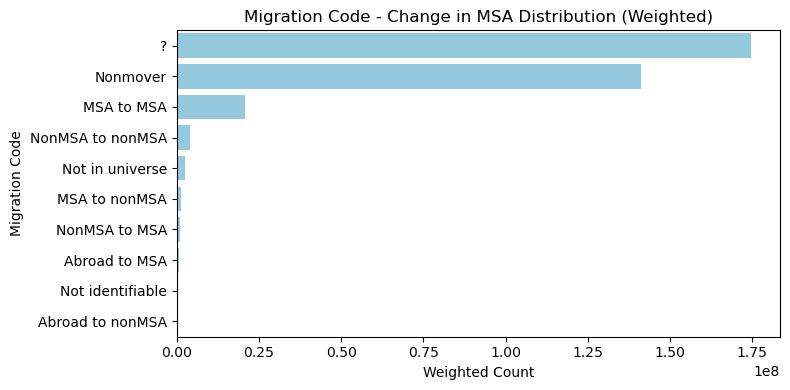

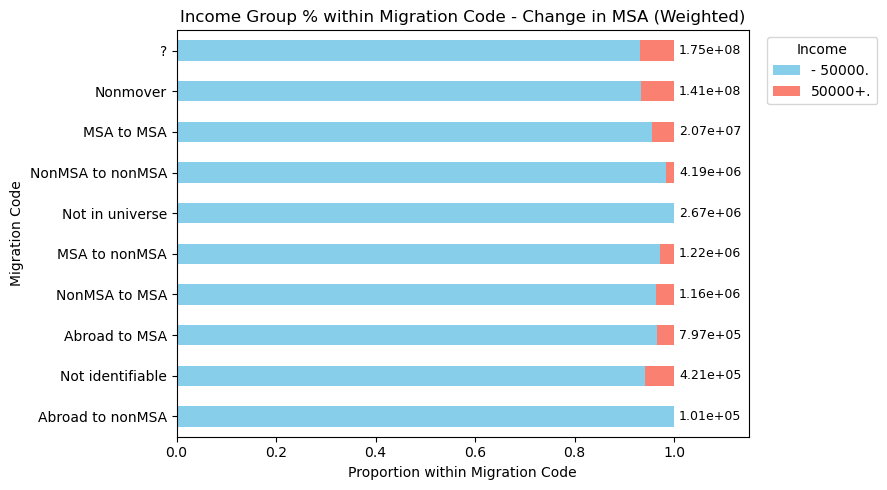

In [358]:
col = "migration code-change in msa"

print("Missing values:", df[col].isna().sum())
print("Unique values:", df[col].nunique())
print("\nTop weighted counts:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False).head(10))

# Overall weighted distribution
totals = df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(
    y=totals.index,
    x=totals.values,
    color="skyblue"
)
plt.title("Migration Code - Change in MSA Distribution (Weighted)")
plt.xlabel("Weighted Count")
plt.ylabel("Migration Code")
plt.tight_layout()
plt.show()

# Weighted normalized % distribution with counts
counts = df.groupby([col, "label"])[WEIGHT_COL].sum().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)

cols_order = ["- 50000.", "50000+."]
props = props.reindex(columns=cols_order, fill_value=0)

order = totals.index
colors = ["skyblue", "salmon"]

plt.figure(figsize=(9,5))
ax = props.loc[order].plot(
    kind="barh", stacked=True, color=colors, figsize=(9,5), ax=plt.gca()
)

for i, cat in enumerate(order):
    ax.text(1.01, i, f"{totals.loc[cat]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.15)
ax.set_xlabel("Proportion within Migration Code")
ax.set_ylabel("Migration Code")
ax.set_title("Income Group % within Migration Code - Change in MSA (Weighted)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")
ax.invert_yaxis()

plt.tight_layout()
plt.show()


**Observations**  
- The largest groups are **nonmovers** and those with **unknown migration status (labeled "?")**, both making up a dominant share.

---

### Migration Code - Change in Region

Missing values: 0
Unique values: 9

Top weighted counts:
migration code-change in reg
?                                 1.746753e+08
Nonmover                          1.412779e+08
Same county                       1.765602e+07
Different county same state       5.539193e+06
Not in universe                   2.670705e+06
Different region                  2.088194e+06
Different state same division     1.688479e+06
Abroad                            9.008612e+05
Different division same region    7.492626e+05
Name: weight, dtype: float64


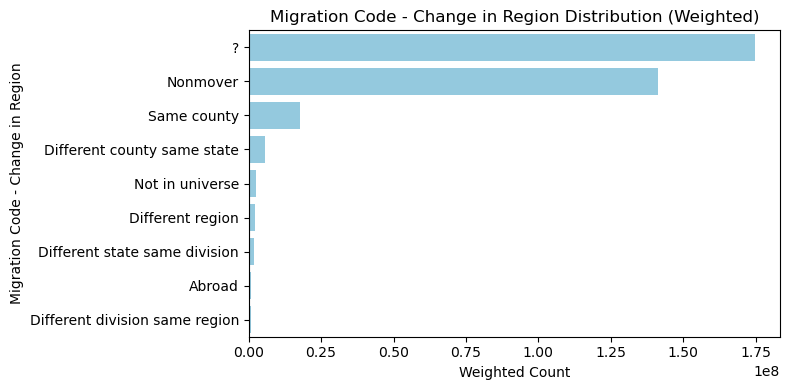

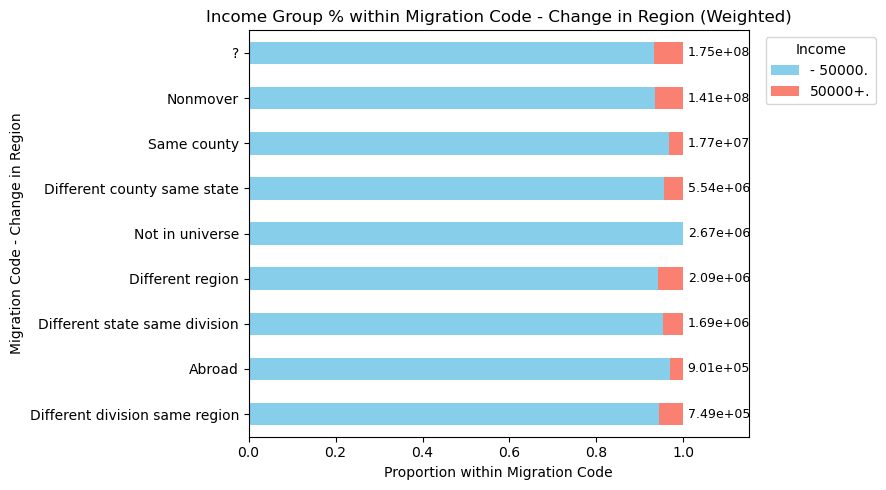

In [364]:
col = "migration code-change in reg"

print("Missing values:", df[col].isna().sum())
print("Unique values:", df[col].nunique())
print("\nTop weighted counts:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False).head(10))

# Overall weighted distribution
totals = df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(
    y=totals.index,
    x=totals.values,
    color="skyblue"
)
plt.title("Migration Code - Change in Region Distribution (Weighted)")
plt.xlabel("Weighted Count")
plt.ylabel("Migration Code - Change in Region")
plt.tight_layout()
plt.show()

# Weighted normalized % distribution with counts
counts = df.groupby([col, "label"])[WEIGHT_COL].sum().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)

cols_order = ["- 50000.", "50000+."]
props = props.reindex(columns=cols_order, fill_value=0)

order = totals.index
colors = ["skyblue", "salmon"]

plt.figure(figsize=(9,5))
ax = props.loc[order].plot(
    kind="barh", stacked=True, color=colors, figsize=(9,5), ax=plt.gca()
)

for i, cat in enumerate(order):
    ax.text(1.01, i, f"{totals.loc[cat]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.15)
ax.set_xlabel("Proportion within Migration Code")
ax.set_ylabel("Migration Code - Change in Region")
ax.set_title("Income Group % within Migration Code - Change in Region (Weighted)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")
ax.invert_yaxis()

plt.tight_layout()
plt.show()


**Observations**  

- Most are **nonmovers** or unknown in the same county. Moves across counties, states, or regions are less common.   

### Migration Code - Move within Region

Missing values: 0
Unique values: 10

Top weighted counts:
migration code-move within reg
?                               1.746753e+08
Nonmover                        1.412779e+08
Same county                     1.765602e+07
Different county same state     5.539193e+06
Not in universe                 2.670705e+06
Different state in South        1.799130e+06
Different state in West         1.020952e+06
Different state in Midwest      9.947751e+05
Abroad                          9.008612e+05
Different state in Northeast    7.110786e+05
Name: weight, dtype: float64


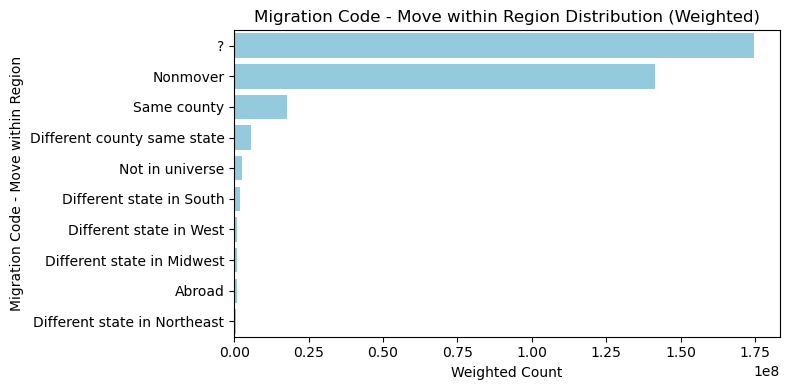

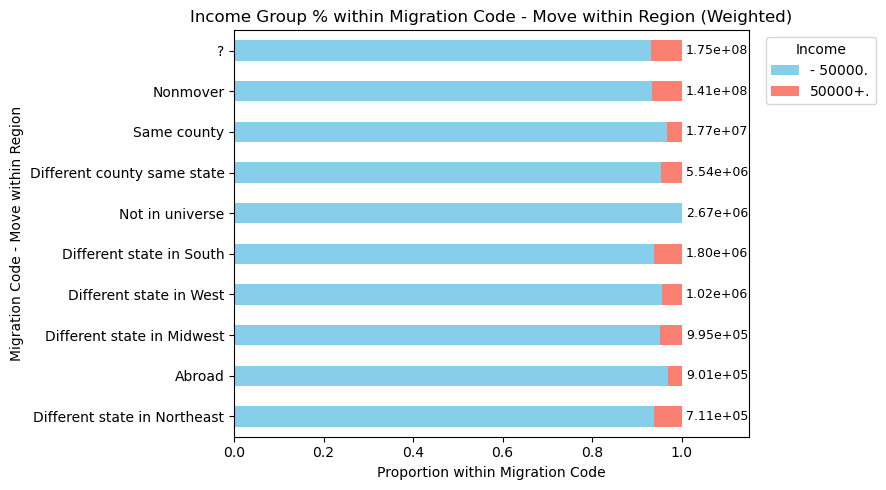

In [372]:
col = "migration code-move within reg"

print("Missing values:", df[col].isna().sum())
print("Unique values:", df[col].nunique())
print("\nTop weighted counts:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False).head(10))

# Overall weighted distribution
totals = df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(
    y=totals.index,
    x=totals.values,
    color="skyblue"
)
plt.title("Migration Code - Move within Region Distribution (Weighted)")
plt.xlabel("Weighted Count")
plt.ylabel("Migration Code - Move within Region")
plt.tight_layout()
plt.show()

# Weighted normalized % distribution with counts
counts = df.groupby([col, "label"])[WEIGHT_COL].sum().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)

cols_order = ["- 50000.", "50000+."]
props = props.reindex(columns=cols_order, fill_value=0)

order = totals.index
colors = ["skyblue", "salmon"]

plt.figure(figsize=(9,5))
ax = props.loc[order].plot(
    kind="barh", stacked=True, color=colors, figsize=(9,5), ax=plt.gca()
)

for i, cat in enumerate(order):
    ax.text(1.01, i, f"{totals.loc[cat]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.15)
ax.set_xlabel("Proportion within Migration Code")
ax.set_ylabel("Migration Code - Move within Region")
ax.set_title("Income Group % within Migration Code - Move within Region (Weighted)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")
ax.invert_yaxis()

plt.tight_layout()
plt.show()


**Observations**  
- Most individuals are **nonmovers or same-county movers**, with higher-income groups slightly more represented among movers.  


---

### Live in This House 1 Year Ago

Missing values: 0
Unique values: 3

Top weighted counts:
live in this house 1 year ago
Not in universe under 1 year old    1.773460e+08
Yes                                 1.412779e+08
No                                  2.862201e+07
Name: weight, dtype: float64


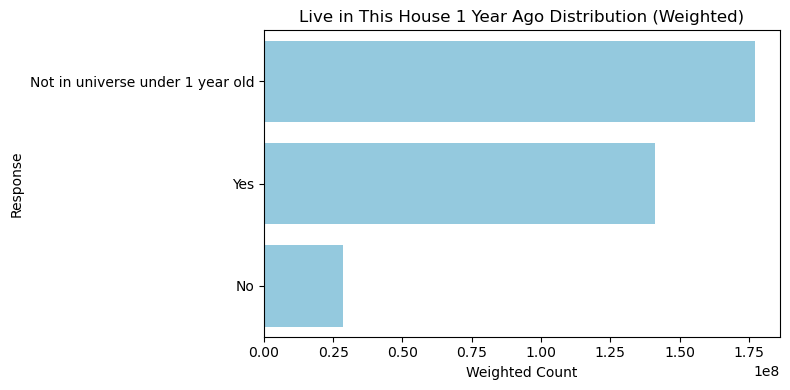

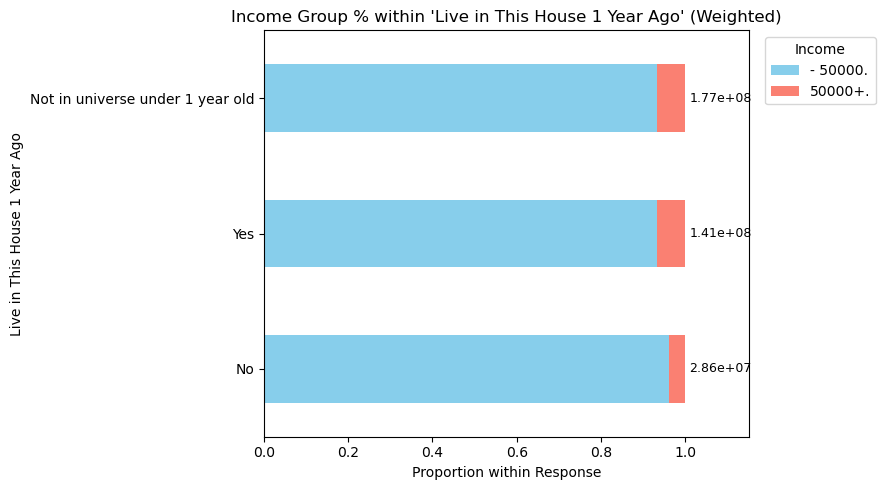

In [378]:
col = "live in this house 1 year ago"

print("Missing values:", df[col].isna().sum())
print("Unique values:", df[col].nunique())
print("\nTop weighted counts:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False).head(10))

# Overall weighted distribution
totals = df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(
    y=totals.index,
    x=totals.values,
    color="skyblue"
)
plt.title("Live in This House 1 Year Ago Distribution (Weighted)")
plt.xlabel("Weighted Count")
plt.ylabel("Response")
plt.tight_layout()
plt.show()

# Weighted normalized % distribution with counts
counts = df.groupby([col, "label"])[WEIGHT_COL].sum().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)

cols_order = ["- 50000.", "50000+."]
props = props.reindex(columns=cols_order, fill_value=0)

order = totals.index
colors = ["skyblue", "salmon"]

plt.figure(figsize=(9,5))
ax = props.loc[order].plot(
    kind="barh", stacked=True, color=colors, figsize=(9,5), ax=plt.gca()
)

for i, cat in enumerate(order):
    ax.text(1.01, i, f"{totals.loc[cat]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.15)
ax.set_xlabel("Proportion within Response")
ax.set_ylabel("Live in This House 1 Year Ago")
ax.set_title("Income Group % within 'Live in This House 1 Year Ago' (Weighted)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")
ax.invert_yaxis()

plt.tight_layout()
plt.show()



**Observations**  
- Most individuals lived in the **same house a year ago**, with movers showing a slightly higher share of 50k+ earners.  

---

### Migration Previous Residence in Sunbelt

Missing values: 0
Unique values: 4

Top weighted counts:
migration prev res in sunbelt
?                  1.746753e+08
Not in universe    1.439486e+08
No                 1.685655e+07
Yes                1.176546e+07
Name: weight, dtype: float64


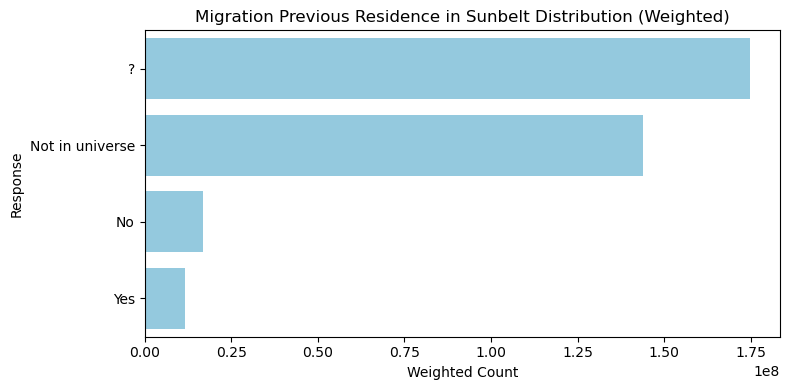

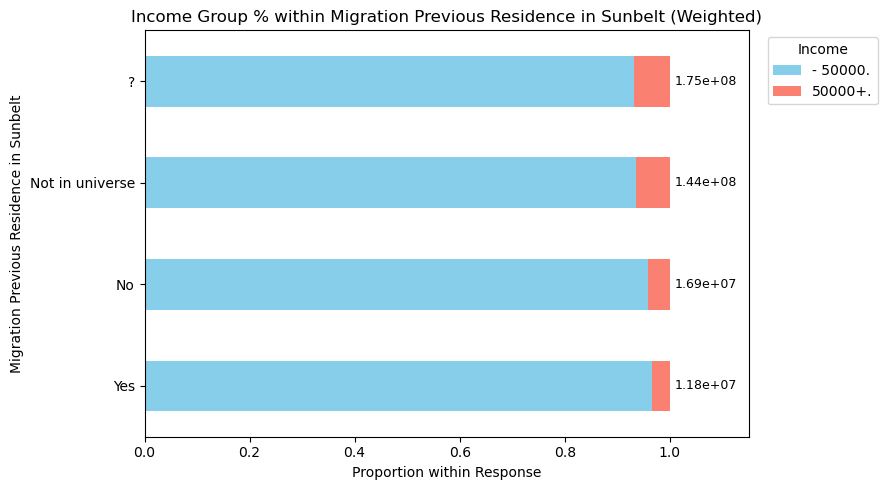

In [384]:
col = "migration prev res in sunbelt"

print("Missing values:", df[col].isna().sum())
print("Unique values:", df[col].nunique())
print("\nTop weighted counts:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False).head(10))

# Overall weighted distribution
totals = df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(
    y=totals.index,
    x=totals.values,
    color="skyblue"
)
plt.title("Migration Previous Residence in Sunbelt Distribution (Weighted)")
plt.xlabel("Weighted Count")
plt.ylabel("Response")
plt.tight_layout()
plt.show()

# Weighted normalized % distribution with counts
counts = df.groupby([col, "label"])[WEIGHT_COL].sum().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)

cols_order = ["- 50000.", "50000+."]
props = props.reindex(columns=cols_order, fill_value=0)

order = totals.index
colors = ["skyblue", "salmon"]

plt.figure(figsize=(9,5))
ax = props.loc[order].plot(
    kind="barh", stacked=True, color=colors, figsize=(9,5), ax=plt.gca()
)

for i, cat in enumerate(order):
    ax.text(1.01, i, f"{totals.loc[cat]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.15)
ax.set_xlabel("Proportion within Response")
ax.set_ylabel("Migration Previous Residence in Sunbelt")
ax.set_title("Income Group % within Migration Previous Residence in Sunbelt (Weighted)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")
ax.invert_yaxis()

plt.tight_layout()
plt.show()


**Observations**  
- Movers from the **Sunbelt** are a small group, and their income distribution is similar to non-Sunbelt movers.  

---

### Num Persons Worked for Employer

Missing values: 0
Unique values: 7

Summary stats:
num persons worked for employer
0    1.636911e+08
6    6.620914e+07
1    3.979130e+07
4    2.550886e+07
3    2.355500e+07
2    1.762084e+07
5    1.086965e+07
Name: weight, dtype: float64


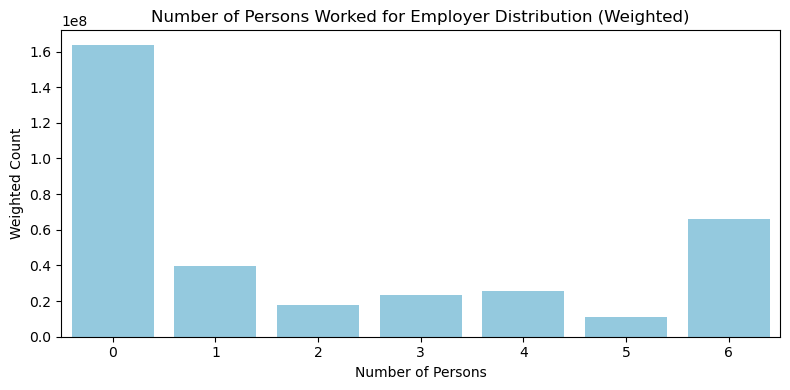

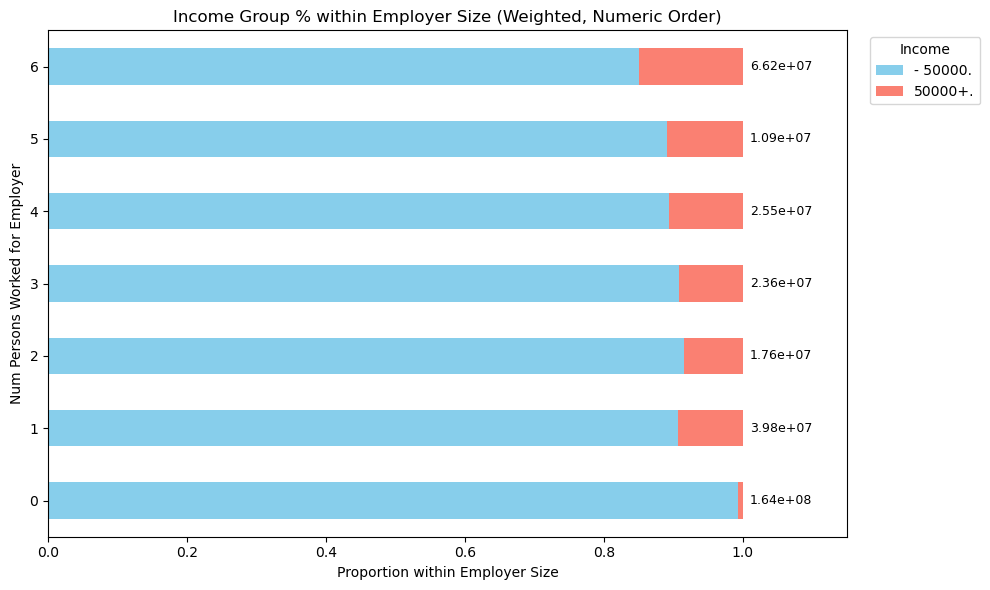

In [427]:
col = "num persons worked for employer"

# convert to numeric
df[col] = pd.to_numeric(df[col], errors="coerce")

print("Missing values:", df[col].isna().sum())
print("Unique values:", df[col].nunique())
print("\nSummary stats:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False))

# Overall weighted distribution
totals = df.groupby(col)[WEIGHT_COL].sum().sort_index()

plt.figure(figsize=(8,4))
sns.barplot(
    x=totals.index,
    y=totals.values,
    color="skyblue"
)
plt.title("Number of Persons Worked for Employer Distribution (Weighted)")
plt.xlabel("Number of Persons")
plt.ylabel("Weighted Count")
plt.tight_layout()
plt.show()

# Weighted normalized % distribution with counts
counts = df.groupby([col, "label"])[WEIGHT_COL].sum().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)

cols_order = ["- 50000.", "50000+."]
props = props.reindex(columns=cols_order, fill_value=0)

order = sorted(props.index)
colors = ["skyblue", "salmon"]

plt.figure(figsize=(10,6))
ax = props.loc[order].plot(
    kind="barh", stacked=True, color=colors, figsize=(10,6), ax=plt.gca()
)

totals = counts.sum(axis=1).reindex(order)
for i, val in enumerate(order):
    ax.text(1.01, i, f"{totals.loc[val]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.15)
ax.set_xlabel("Proportion within Employer Size")
ax.set_ylabel("Num Persons Worked for Employer")
ax.set_title("Income Group % within Employer Size (Weighted, Numeric Order)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()


**Observations**  
- Workers in **larger firms (codes 5–6)** show a slightly higher share of higher-income individuals compared to smaller firms.  

---

### Family Members Under 18

Missing values: 0

Unique values: 5

Value counts:
family members under 18
Not in universe           2.547291e+08
Both parents present      6.432913e+07
Mother only present       2.202763e+07
Father only present       3.151753e+06
Neither parent present    3.008288e+06
Name: weight, dtype: float64


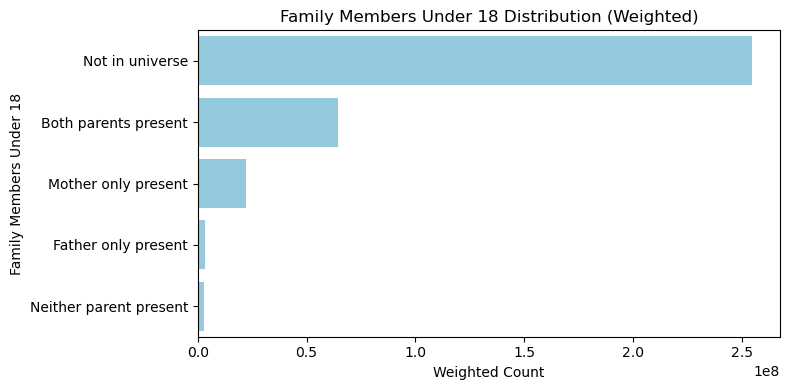

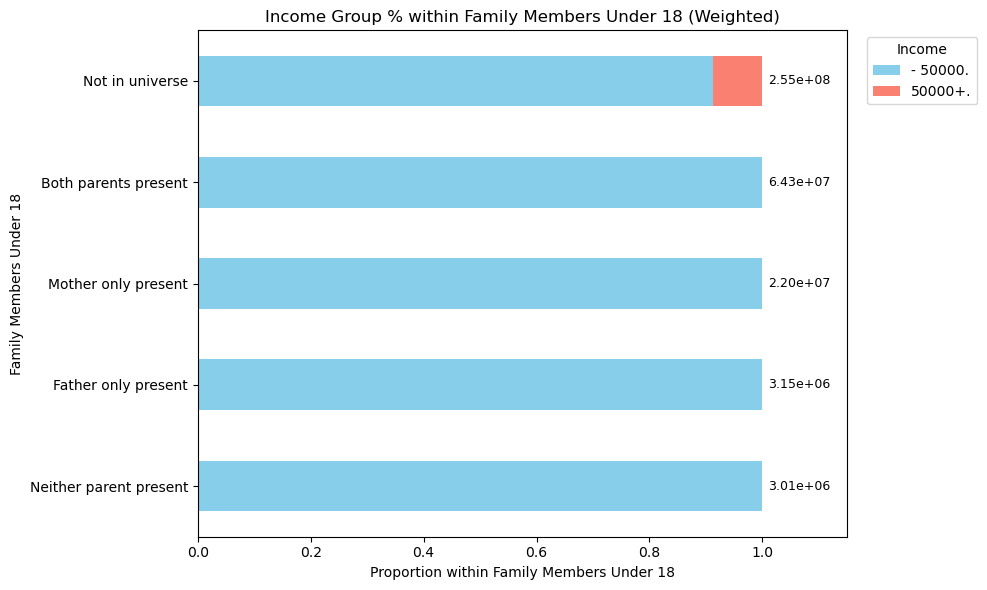

In [425]:
col = "family members under 18"

print("Missing values:", df[col].isna().sum())
print("\nUnique values:", df[col].nunique())
print("\nValue counts:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False))

# Overall weighted distribution
totals = df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(
    y=totals.index,
    x=totals.values,
    color="skyblue"
)
plt.title("Family Members Under 18 Distribution (Weighted)")
plt.xlabel("Weighted Count")
plt.ylabel("Family Members Under 18")
plt.tight_layout()
plt.show()

# Weighted normalized % distribution with counts
counts = df.groupby([col, "label"])[WEIGHT_COL].sum().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)

cols_order = ["- 50000.", "50000+."]
props = props.reindex(columns=cols_order, fill_value=0)

order = counts.sum(axis=1).sort_values(ascending=False).index
colors = ["skyblue", "salmon"]

plt.figure(figsize=(10,6))
ax = props.loc[order].plot(
    kind="barh", stacked=True, color=colors, figsize=(10,6), ax=plt.gca()
)

totals = counts.sum(axis=1).reindex(order)
for i, fam in enumerate(order):
    ax.text(1.01, i, f"{totals.loc[fam]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.15)
ax.set_xlabel("Proportion within Family Members Under 18")
ax.set_ylabel("Family Members Under 18")
ax.set_title("Income Group % within Family Members Under 18 (Weighted)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")
ax.invert_yaxis()

plt.tight_layout()
plt.show()


**Observations**  
- Somehow all the datapoints which were recorded in this are <50k income. Possibly this analysis was performed on a younger population. 

---

### country of birth father

Missing values: 0

Unique values: 43

Weighted totals:
country of birth father
United-States                   2.850877e+08
Mexico                          1.523234e+07
?                               1.118145e+07
Italy                           3.760459e+06
Puerto-Rico                     3.024703e+06
Germany                         2.323453e+06
Poland                          2.142548e+06
Canada                          2.106980e+06
Philippines                     1.844092e+06
Cuba                            1.493422e+06
El-Salvador                     1.487697e+06
Dominican-Republic              1.447217e+06
England                         1.393016e+06
China                           1.362980e+06
Jamaica                         9.002590e+05
India                           8.635359e+05
South Korea                     8.358517e+05
Ireland                         8.036559e+05
Vietnam                         7.532606e+05
Columbia                        7.003743e+05
Haiti                

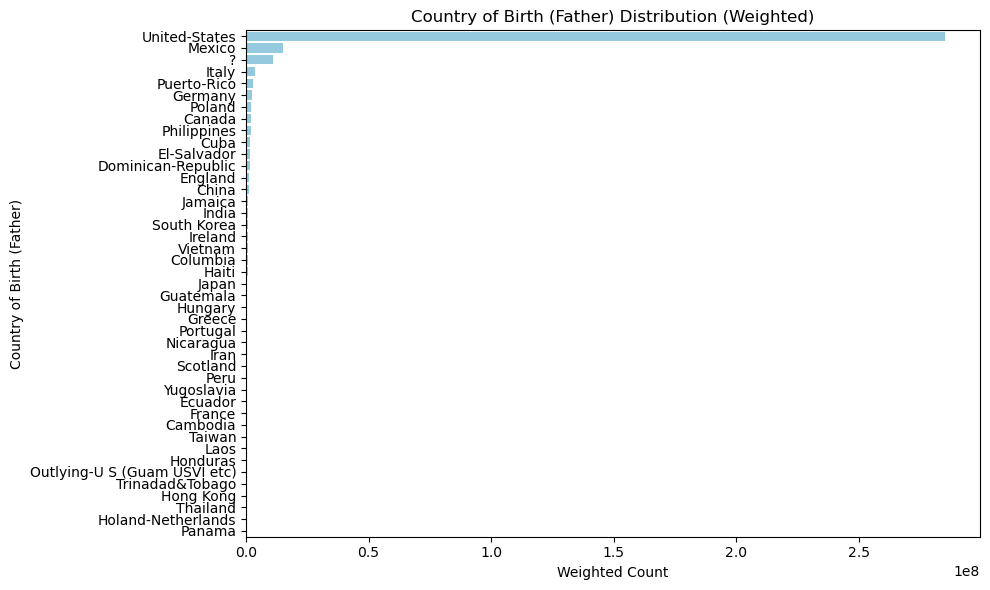

In [423]:
col = "country of birth father"

print("Missing values:", df[col].isna().sum())
print("\nUnique values:", df[col].nunique())
print("\nWeighted totals:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False))



# Overall weighted distribution
totals = df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    y=totals.index,
    x=totals.values,
    color="skyblue"
)
plt.title("Country of Birth (Father) Distribution (Weighted)")
plt.xlabel("Weighted Count")
plt.ylabel("Country of Birth (Father)")
plt.tight_layout()
plt.show()





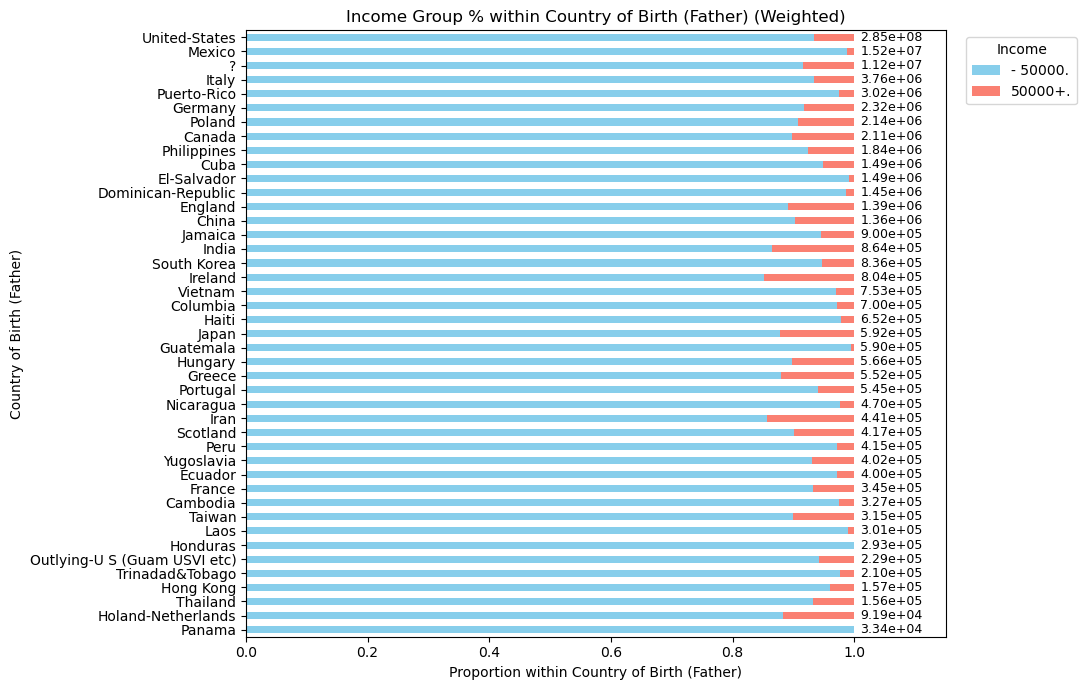

In [403]:
# Weighted normalized % distribution with counts
counts = df.groupby([col, "label"])[WEIGHT_COL].sum().unstack(fill_value=0)
props  = counts.div(counts.sum(axis=1), axis=0)

cols_order = ["- 50000.", "50000+."]
props      = props.reindex(columns=cols_order, fill_value=0)

order = totals.index
colors = ["skyblue", "salmon"]

plt.figure(figsize=(11,7))
ax = props.loc[order].plot(
    kind="barh", stacked=True, color=colors, figsize=(11,7), ax=plt.gca()
)

# annotate weighted totals
for i, ctry in enumerate(order):
    ax.text(1.01, i, f"{totals.loc[ctry]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.15)
ax.set_xlabel("Proportion within Country of Birth (Father)")
ax.set_ylabel("Country of Birth (Father)")
ax.set_title("Income Group % within Country of Birth (Father) (Weighted)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")
ax.invert_yaxis()

plt.tight_layout()
plt.show()

**Observations**  
- The vast majority of fathers were born in the **United States**, followed by a much smaller share from **Mexico** and other countries.  

---

### Country of Birth Mother

Missing values: 0

Unique values: 43

Weighted totals:
country of birth mother
United-States                   2.870212e+08
Mexico                          1.488412e+07
?                               1.020107e+07
Italy                           3.084000e+06
Puerto-Rico                     2.776873e+06
Germany                         2.455026e+06
Canada                          2.268896e+06
Philippines                     2.016761e+06
Poland                          1.937589e+06
El-Salvador                     1.667132e+06
England                         1.577164e+06
Cuba                            1.461858e+06
China                           1.193858e+06
Dominican-Republic              1.183182e+06
South Korea                     9.706064e+05
Ireland                         9.451282e+05
India                           8.857579e+05
Jamaica                         8.709806e+05
Vietnam                         7.830828e+05
Japan                           7.449591e+05
Columbia             

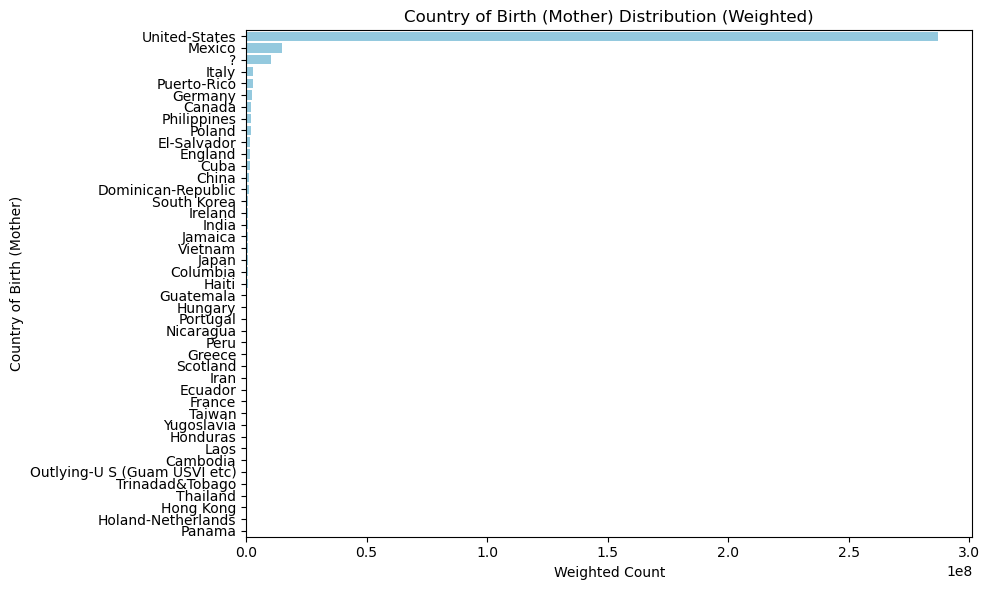

In [421]:
col = "country of birth mother"

print("Missing values:", df[col].isna().sum())
print("\nUnique values:", df[col].nunique())
print("\nWeighted totals:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False))


# Overall weighted distribution
totals = df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    y=totals.index,
    x=totals.values,
    color="skyblue"
)
plt.title("Country of Birth (Mother) Distribution (Weighted)")
plt.xlabel("Weighted Count")
plt.ylabel("Country of Birth (Mother)")
plt.tight_layout()
plt.show()




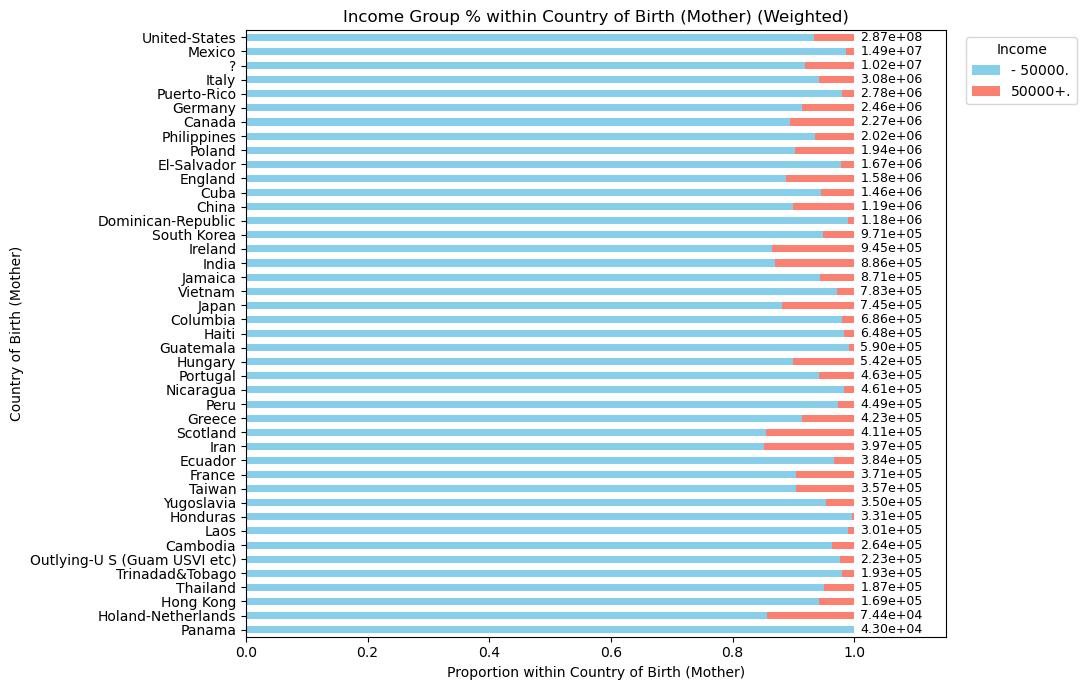

In [413]:
# Weighted normalized % distribution with counts
counts = df.groupby([col, "label"])[WEIGHT_COL].sum().unstack(fill_value=0)
props  = counts.div(counts.sum(axis=1), axis=0)

cols_order = ["- 50000.", "50000+."]
props      = props.reindex(columns=cols_order, fill_value=0)

order = totals.index
colors = ["skyblue", "salmon"]

plt.figure(figsize=(11,7))
ax = props.loc[order].plot(
    kind="barh", stacked=True, color=colors, figsize=(11,7), ax=plt.gca()
)

# annotate weighted totals
for i, ctry in enumerate(order):
    ax.text(1.01, i, f"{totals.loc[ctry]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.15)
ax.set_xlabel("Proportion within Country of Birth (Mother)")
ax.set_ylabel("Country of Birth (Mother)")
ax.set_title("Income Group % within Country of Birth (Mother) (Weighted)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")
ax.invert_yaxis()

plt.tight_layout()
plt.show()


**Observations**  
- The vast majority of mothers were born in the **United States**, followed by a much smaller share from **Mexico** and other countries.  

---

### country of birth self

Missing values: 0

Unique values: 43

Weighted totals:
country of birth self
United-States                   3.123882e+08
Mexico                          8.880586e+06
?                               5.727526e+06
Puerto-Rico                     1.561996e+06
Germany                         1.542549e+06
Philippines                     1.384611e+06
Canada                          1.182619e+06
Cuba                            1.093367e+06
El-Salvador                     1.043763e+06
England                         7.971816e+05
South Korea                     7.553359e+05
Dominican-Republic              7.203271e+05
China                           7.188203e+05
Italy                           6.957548e+05
Poland                          6.910901e+05
Vietnam                         6.693309e+05
Jamaica                         6.101138e+05
India                           6.045620e+05
Japan                           5.516902e+05
Columbia                        4.814114e+05
Guatemala              

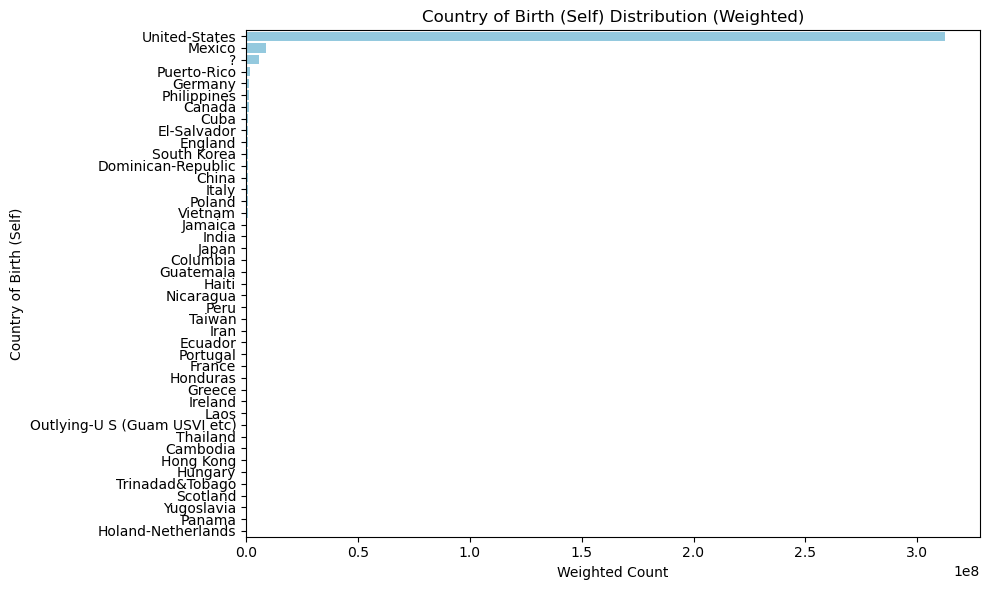

In [419]:
col = "country of birth self"

print("Missing values:", df[col].isna().sum())
print("\nUnique values:", df[col].nunique())
print("\nWeighted totals:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False))


# Overall weighted distribution
totals = df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    y=totals.index,
    x=totals.values,
    color="skyblue"
)
plt.title("Country of Birth (Self) Distribution (Weighted)")
plt.xlabel("Weighted Count")
plt.ylabel("Country of Birth (Self)")
plt.tight_layout()
plt.show()

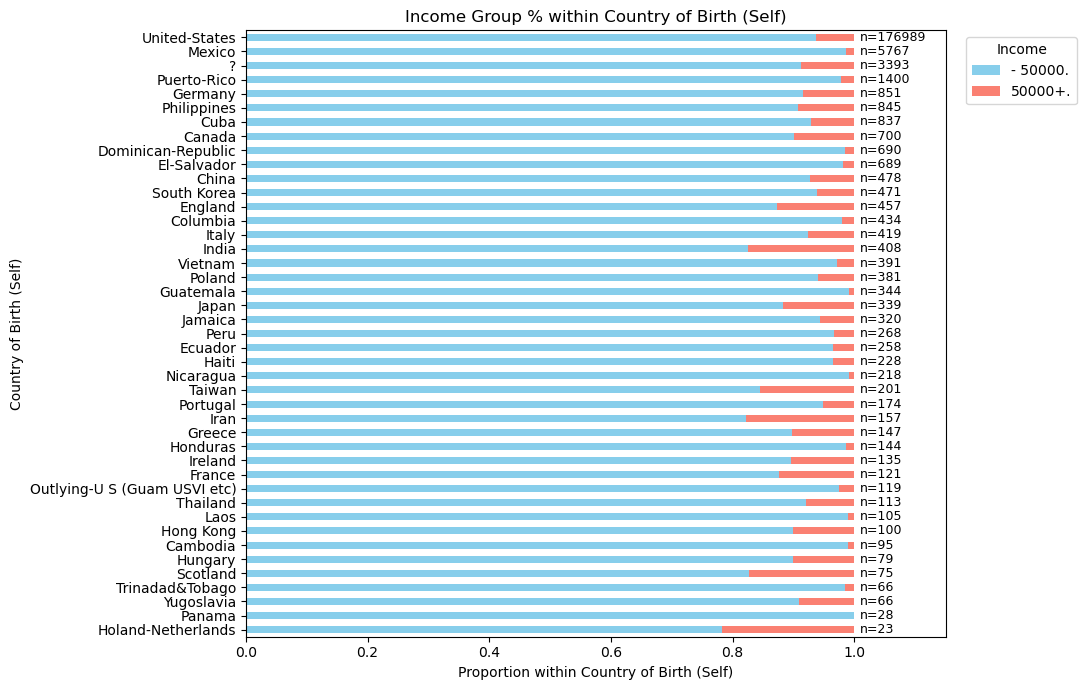

In [300]:
# Weighted normalized % distribution with counts
counts = df.groupby([col, "label"])[WEIGHT_COL].sum().unstack(fill_value=0)
props  = counts.div(counts.sum(axis=1), axis=0)

cols_order = ["- 50000.", "50000+."]
props      = props.reindex(columns=cols_order, fill_value=0)

order = totals.index
colors = ["skyblue", "salmon"]

plt.figure(figsize=(11,7))
ax = props.loc[order].plot(
    kind="barh", stacked=True, color=colors, figsize=(11,7), ax=plt.gca()
)

# annotate weighted totals
for i, ctry in enumerate(order):
    ax.text(1.01, i, f"{totals.loc[ctry]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.15)
ax.set_xlabel("Proportion within Country of Birth (Self)")
ax.set_ylabel("Country of Birth (Self)")
ax.set_title("Income Group % within Country of Birth (Self) (Weighted)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")
ax.invert_yaxis()

plt.tight_layout()
plt.show()

**Observations**  
- The vast majority of people were born in the **United States**, followed by a much smaller share from **Mexico** and other countries.  

---

### citizenship

Missing values: 0

Unique values: 5

Weighted totals:
citizenship
Native- Born in the United States              3.123912e+08
Foreign born- Not a citizen of U S             2.094453e+07
Foreign born- U S citizen by naturalization    9.195009e+06
Native- Born abroad of American Parent(s)      2.954360e+06
Native- Born in Puerto Rico or U S Outlying    1.760837e+06
Name: weight, dtype: float64


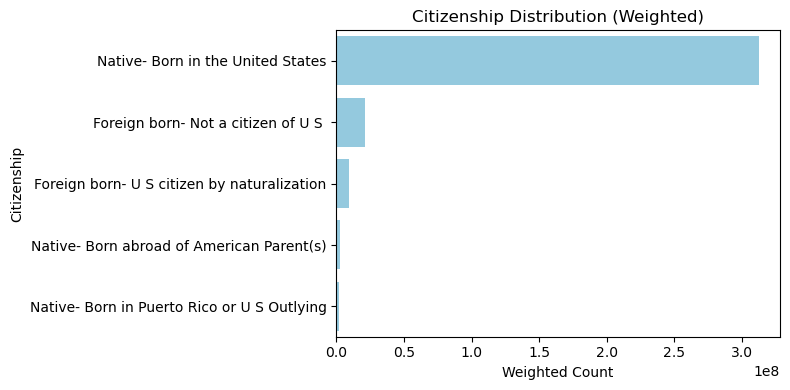

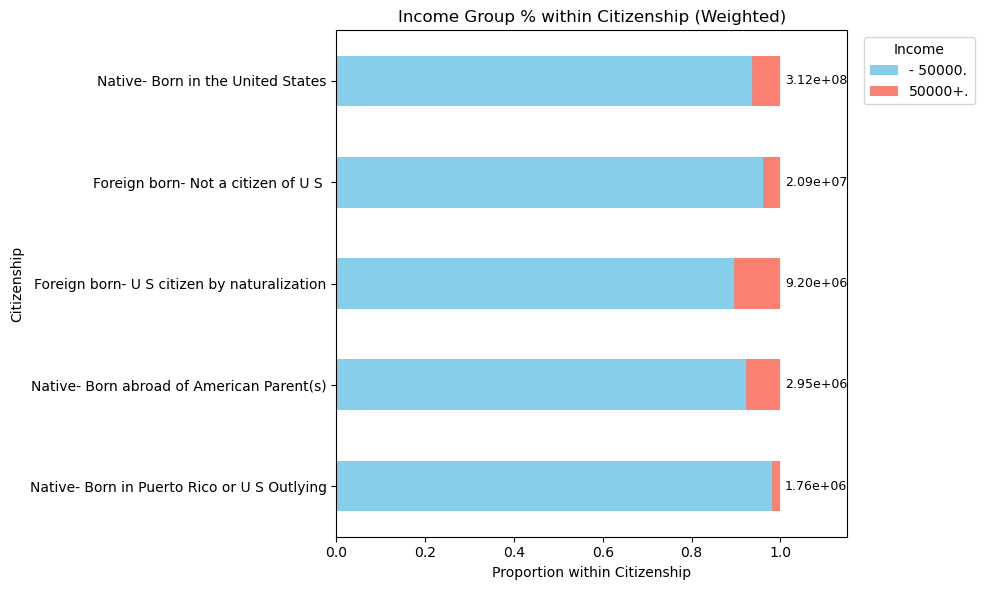

In [435]:
col = "citizenship"

print("Missing values:", df[col].isna().sum())
print("\nUnique values:", df[col].nunique())
print("\nWeighted totals:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False))


# Overall weighted distribution
counts_overall = df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(
    x=counts_overall.values,
    y=counts_overall.index,
    color="skyblue"
)
plt.title("Citizenship Distribution (Weighted)")
plt.xlabel("Weighted Count")
plt.ylabel("Citizenship")
plt.tight_layout()
plt.show()


# Weighted normalized % distribution with counts
counts = df.groupby([col, "label"])[WEIGHT_COL].sum().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)

cols_order = ["- 50000.", "50000+."]
props = props.reindex(columns=cols_order, fill_value=0)

order = counts.sum(axis=1).sort_values(ascending=False).index
colors = ["skyblue", "salmon"]

plt.figure(figsize=(10,6))
ax = props.loc[order].plot(
    kind="barh", stacked=True, color=colors, figsize=(10,6), ax=plt.gca()
)

# annotate weighted totals
totals = counts.sum(axis=1).reindex(order)
for i, c in enumerate(order):
    ax.text(1.01, i, f"{totals.loc[c]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.15)
ax.set_xlabel("Proportion within Citizenship")
ax.set_ylabel("Citizenship")
ax.set_title("Income Group % within Citizenship (Weighted)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")
ax.invert_yaxis()

plt.tight_layout()
plt.show()


**Observations**  
- Most respondents are **native-born in the U.S.**, with small shares of foreign-born groups.  
- Income above $50k is slightly more common among **U.S. citizens by naturalization** compared to other non-native categories.

---


### own business or self employed

Missing values: 0

Unique values: 3

Weighted totals:
own business or self employed
0    3.137138e+08
2    2.874170e+07
1    4.790356e+06
Name: weight, dtype: float64


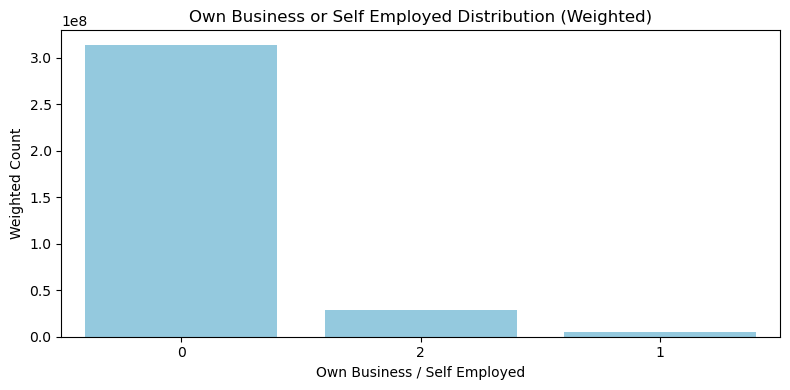

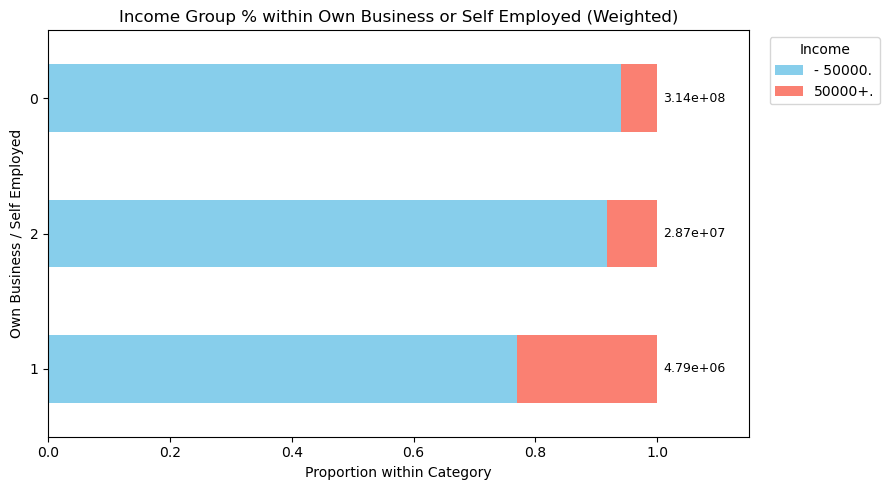

In [442]:
col = "own business or self employed"

print("Missing values:", df[col].isna().sum())
print("\nUnique values:", df[col].nunique())
print("\nWeighted totals:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False))


# Overall weighted distribution
counts_overall = df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(
    data=counts_overall.reset_index(name="weighted"),
    x=col,
    y="weighted",
    order=counts_overall.index,
    color="skyblue"
)
plt.title("Own Business or Self Employed Distribution (Weighted)")
plt.xlabel("Own Business / Self Employed")
plt.ylabel("Weighted Count")
plt.tight_layout()
plt.show()


# Weighted normalized % distribution with counts
counts = df.groupby([col, "label"])[WEIGHT_COL].sum().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)

cols_order = ["- 50000.", "50000+."]
props = props.reindex(columns=cols_order, fill_value=0)

order = counts.sum(axis=1).sort_values(ascending=False).index

colors = ["skyblue", "salmon"]

plt.figure(figsize=(9,5))
ax = props.loc[order].plot(
    kind="barh", stacked=True, color=colors, figsize=(9,5), ax=plt.gca()
)

# annotate weighted totals
totals = counts.sum(axis=1).reindex(order)
for i, cat in enumerate(order):
    ax.text(1.01, i, f"{totals.loc[cat]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.15)
ax.set_xlabel("Proportion within Category")
ax.set_ylabel("Own Business / Self Employed")
ax.set_title("Income Group % within Own Business or Self Employed (Weighted)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")
ax.invert_yaxis()

plt.tight_layout()
plt.show()


---
### fill inc questionnaire for veteran's admin

Missing values: 0

Unique values: 3

Weighted totals:
fill inc questionnaire for veteran's admin
Not in universe    3.437681e+08
No                 2.782540e+06
Yes                6.952914e+05
Name: weight, dtype: float64


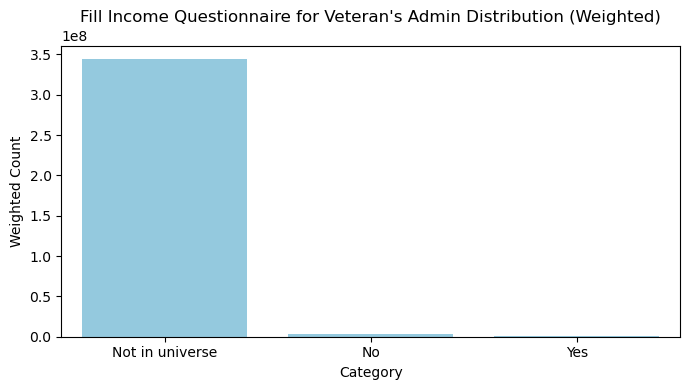

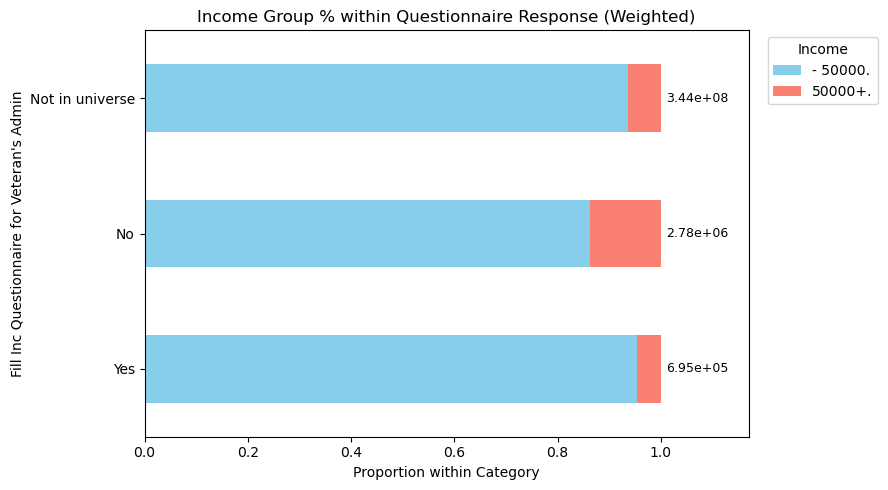

In [451]:
col = "fill inc questionnaire for veteran's admin"

print("Missing values:", df[col].isna().sum())
print("\nUnique values:", df[col].nunique())
print("\nWeighted totals:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False))

# Overall weighted distribution
counts_overall = df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(
    data=counts_overall.reset_index(name="weighted"),
    x=col,
    y="weighted",
    order=counts_overall.index,
    color="skyblue"
)
plt.title("Fill Income Questionnaire for Veteran's Admin Distribution (Weighted)")
plt.xlabel("Category")
plt.ylabel("Weighted Count")
plt.tight_layout()
plt.show()

# Weighted normalized % distribution with counts
counts = df.groupby([col, "label"])[WEIGHT_COL].sum().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)

cols_order = ["- 50000.", "50000+."]
props = props.reindex(columns=cols_order, fill_value=0)

order = counts.sum(axis=1).sort_values(ascending=False).index
colors = ["skyblue", "salmon"]

plt.figure(figsize=(9,5))
ax = props.loc[order].plot(
    kind="barh", stacked=True, color=colors, figsize=(9,5), ax=plt.gca()
)

# annotate weighted totals
totals = counts.sum(axis=1).reindex(order)
for i, cat in enumerate(order):
    ax.text(1.01, i, f"{totals.loc[cat]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.17)
ax.set_xlabel("Proportion within Category")
ax.set_ylabel("Fill Inc Questionnaire for Veteran's Admin")
ax.set_title("Income Group % within Questionnaire Response (Weighted)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")
ax.invert_yaxis()

plt.tight_layout()
plt.show()


**Observations**  
- Almost all are **“Not in universe”**, meaning not applicable for the Veterans Admin questionnaire.  
- Among eligible respondents, both **Yes** and **No** groups show similar income splits, with slightly higher $50k+ share than the overall population.
---

### veterans benefits

Missing values: 0

Unique values: 3

Weighted value counts:
veterans benefits
2    2.646902e+08
0    7.907788e+07
1    3.477832e+06
Name: weight, dtype: float64


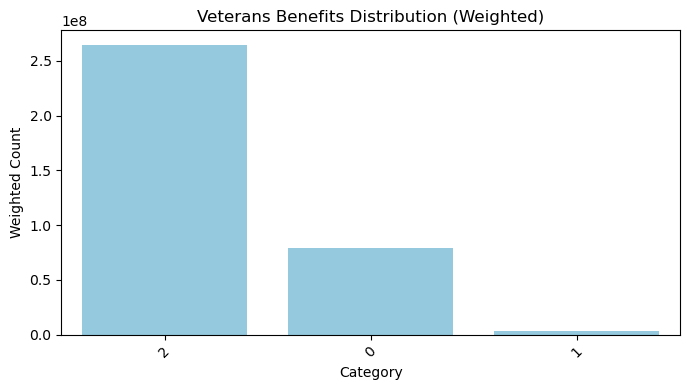

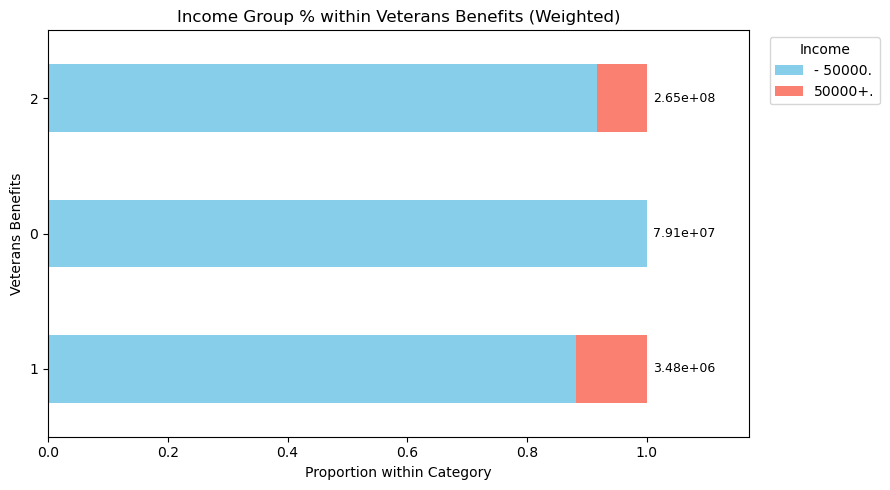

In [463]:
col = "veterans benefits"

print("Missing values:", df[col].isna().sum())
print("\nUnique values:", df[col].nunique())
print("\nWeighted value counts:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False))

# Overall weighted distribution
counts_overall = df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(
    data=counts_overall.reset_index(name="weighted"),
    x=col,        
    y="weighted",  
    order=counts_overall.index, 
    color="skyblue"
)
plt.title("Veterans Benefits Distribution (Weighted)")
plt.ylabel("Weighted Count")
plt.xlabel("Category")
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()




# Weighted normalized % distribution with counts
counts = df.groupby([col, "label"])[WEIGHT_COL].sum().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)

cols_order = ["- 50000.", "50000+."]
props = props.reindex(columns=cols_order, fill_value=0)

order = counts_overall.index
colors = ["skyblue", "salmon"]

plt.figure(figsize=(9,5))
ax = props.loc[order].plot(
    kind="barh", stacked=True, color=colors, figsize=(9,5), ax=plt.gca()
)

totals = counts.sum(axis=1).reindex(order)
for i, cat in enumerate(order):
    ax.text(1.01, i, f"{totals.loc[cat]:.2e}", va="center", ha="left", fontsize=9)

ax.set_xlim(0, 1.17)
ax.set_xlabel("Proportion within Category")
ax.set_ylabel("Veterans Benefits")
ax.set_title("Income Group % within Veterans Benefits (Weighted)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")
ax.invert_yaxis()

plt.tight_layout()
plt.show()


---
### weeks worked in year

Missing values: 0
Unique values: 53

Summary stats:
weeks worked in year
0     1.636911e+08
52    1.244437e+08
40    4.857168e+06
26    4.207944e+06
50    4.022006e+06
Name: weight, dtype: float64


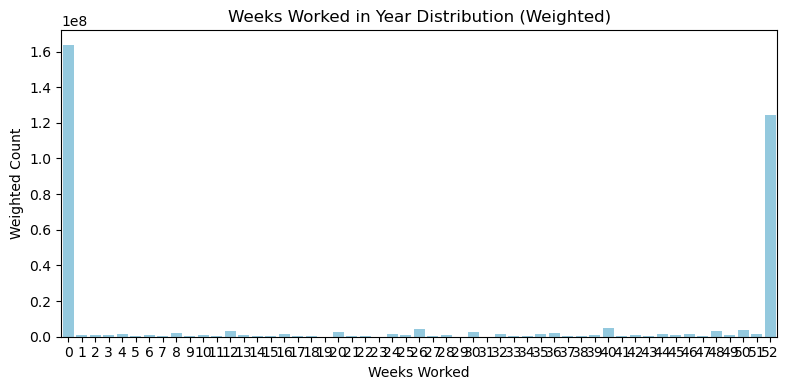

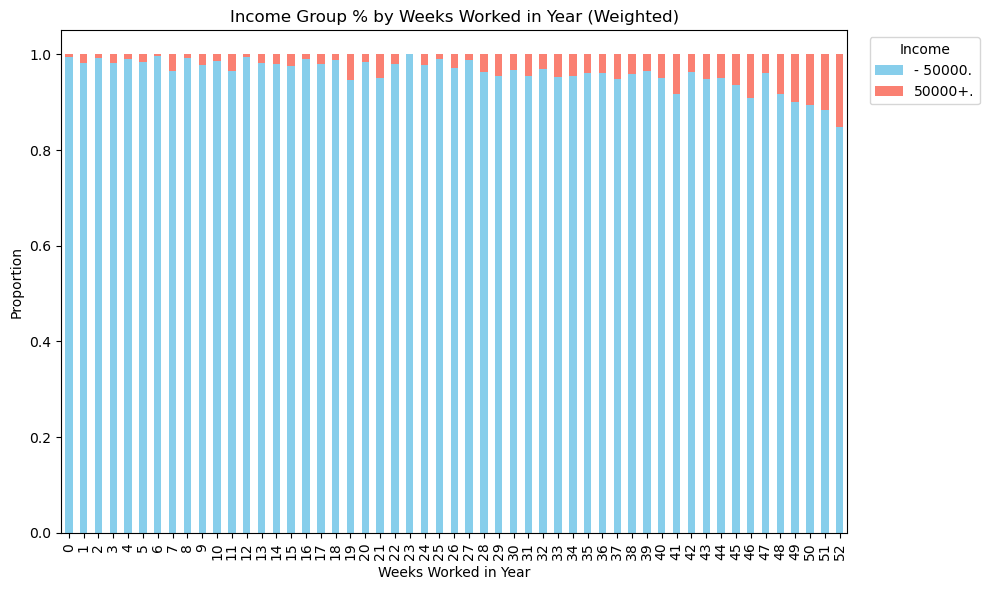

In [472]:
col = "weeks worked in year"

# convert to numeric
df[col] = pd.to_numeric(df[col], errors="coerce")

print("Missing values:", df[col].isna().sum())
print("Unique values:", df[col].nunique())
print("\nSummary stats:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_values(ascending=False).head())


# Overall weighted distribution
counts_overall = df.groupby(col)[WEIGHT_COL].sum().sort_index()

plt.figure(figsize=(8,4))
sns.barplot(
    data=counts_overall.reset_index(name="weighted"),
    x=col,
    y="weighted",
    color="skyblue"
)
plt.title("Weeks Worked in Year Distribution (Weighted)")
plt.xlabel("Weeks Worked")
plt.ylabel("Weighted Count")
plt.tight_layout()
plt.show()



# Weighted normalized % distribution
props = counts_income.div(counts_income.sum(axis=1), axis=0)

order = sorted(props.index)
colors = ["skyblue", "salmon"]

plt.figure(figsize=(10,6))
ax = props.loc[order].plot(
    kind="bar", stacked=True, color=colors, figsize=(10,6), ax=plt.gca()
)

ax.set_xlabel("Weeks Worked in Year")
ax.set_ylabel("Proportion")
ax.set_title("Income Group % by Weeks Worked in Year (Weighted)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()


**Observations**

- Most individuals either did not work at all or worked full-year (52 weeks), with full-year workers showing a higher share of $50K+ earners.

---

### year

Missing values: 0
Unique values: 2

Weighted value counts:
year
94    1.725706e+08
95    1.746753e+08
Name: weight, dtype: float64


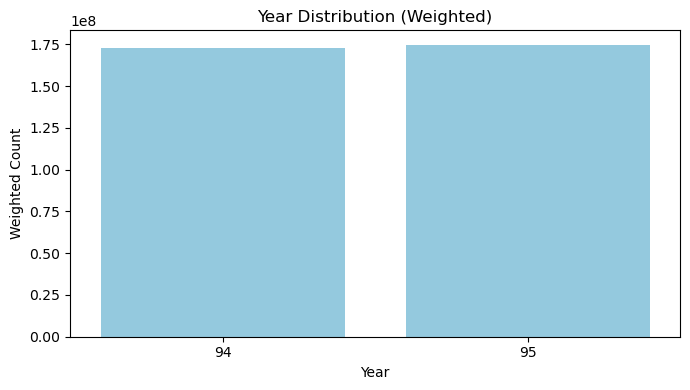

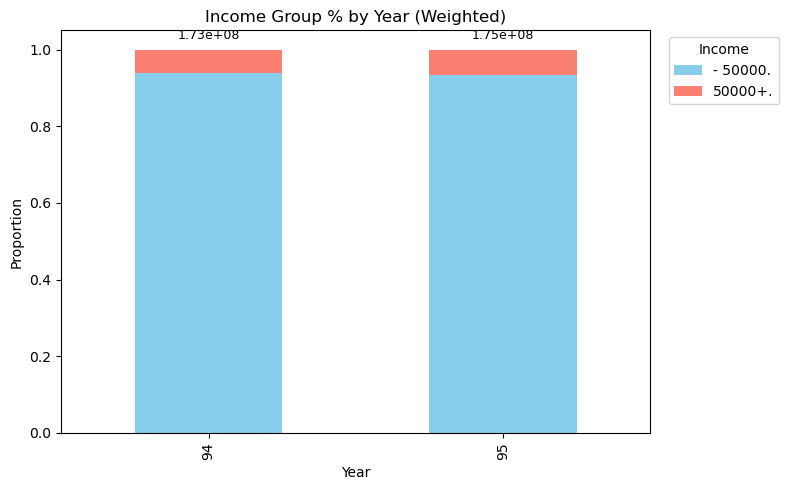

In [479]:
col = "year"

# convert to numeric
df[col] = pd.to_numeric(df[col], errors="coerce")

print("Missing values:", df[col].isna().sum())
print("Unique values:", df[col].nunique())
print("\nWeighted value counts:")
print(df.groupby(col)[WEIGHT_COL].sum().sort_index())


# Weighted overall distribution
counts_overall = df.groupby(col)[WEIGHT_COL].sum().sort_index()

plt.figure(figsize=(7,4))
sns.barplot(
    data=counts_overall.reset_index(name="weighted"),
    x=col,
    y="weighted",
    color="skyblue"
)
plt.title("Year Distribution (Weighted)")
plt.xlabel("Year")
plt.ylabel("Weighted Count")
plt.tight_layout()
plt.show()


# Weighted normalized % distribution by income group
counts = df.groupby([col, "label"])[WEIGHT_COL].sum().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)

cols_order = ["- 50000.", "50000+."]
props = props.reindex(columns=cols_order, fill_value=0)

order = sorted(counts.index)
colors = ["skyblue", "salmon"]

plt.figure(figsize=(8,5))
ax = props.loc[order].plot(
    kind="bar", stacked=True, color=colors, figsize=(8,5), ax=plt.gca()
)

# annotate weighted totals
totals = counts.sum(axis=1).reindex(order)
for i, yr in enumerate(order):
    ax.text(i, 1.02, f"{totals.loc[yr]:.2e}", ha="center", va="bottom", fontsize=9)

ax.set_xlabel("Year")
ax.set_ylabel("Proportion")
ax.set_title("Income Group % by Year (Weighted)")
ax.legend(title="Income", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()


**Observations:**
- The data is from 94, 95. Equal count from each yeah.

---

### label (y)

Missing values: 0

Unique values: ['- 50000.' '50000+.']

Weighted value counts:
label
- 50000.    3.250046e+08
50000+.     2.224125e+07
Name: weight, dtype: float64

Weighted proportions:
label
- 50000.    0.93595
50000+.     0.06405
Name: weight, dtype: float64


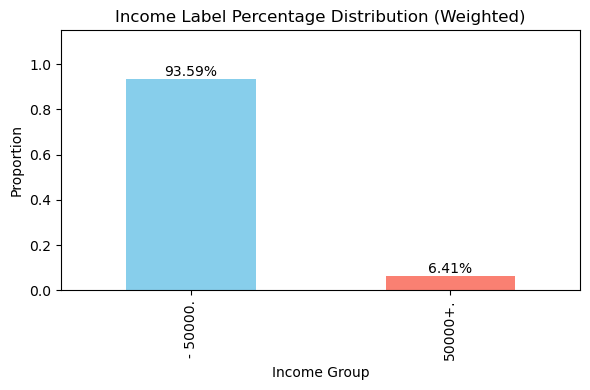

In [485]:
col = "label"

print("Missing values:", df[col].isna().sum())
print("\nUnique values:", df[col].unique())

# Weighted counts and proportions
counts = df.groupby(col)[WEIGHT_COL].sum()
props = counts / counts.sum()

print("\nWeighted value counts:")
print(counts)
print("\nWeighted proportions:")
print(props)

# === Weighted Percentage Distribution ===
plt.figure(figsize=(6,4))
props.plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Income Label Percentage Distribution (Weighted)")
plt.ylabel("Proportion")
plt.xlabel("Income Group")

# annotate values
for i, val in enumerate(props):
    plt.text(i, val + 0.01, f"{val:.2%}", ha="center", fontsize=10)

plt.ylim(0, 1.15)
plt.tight_layout()
plt.show()


The Classes are highly imbalanced, should be taken care during the modeling